# Chapter 17: Representation Learning and Generative Learning Using Autoencoders and GANs

## Comprehensive Theory, Mathematical Foundations, and Practical Implementation

---

### Table of Contents
1. [Introduction and Setup](#introduction)
2. [Efficient Data Representations](#efficient-representations)
3. [Autoencoder Theory and Mathematics](#autoencoder-theory)
4. [Linear Autoencoders and PCA](#linear-autoencoders)
5. [Stacked Autoencoders](#stacked-autoencoders)
6. [Convolutional and Recurrent Autoencoders](#conv-recurrent-autoencoders)
7. [Denoising Autoencoders](#denoising-autoencoders)
8. [Sparse Autoencoders](#sparse-autoencoders)
9. [Variational Autoencoders (VAEs)](#variational-autoencoders)
10. [Generative Adversarial Networks (GANs)](#gans)
11. [Advanced GAN Architectures](#advanced-gans)
12. [Mathematical Foundations](#mathematical-foundations)
13. [Exercises and Solutions](#exercises)

---

## 1. Introduction and Setup {#introduction}

### Theoretical Foundation

**Autoencoders** are artificial neural networks designed to learn efficient data representations (called **codings** or **latent representations**) in an unsupervised manner. They are composed of two main components:

1. **Encoder (Recognition Network)**: Maps input data to a lower-dimensional latent representation
2. **Decoder (Generative Network)**: Reconstructs the original input from the latent representation

**Mathematical Formulation:**
- Input: $\mathbf{x} \in \mathbb{R}^d$
- Encoding function: $f: \mathbb{R}^d \rightarrow \mathbb{R}^p$ where $p < d$
- Decoding function: $g: \mathbb{R}^p \rightarrow \mathbb{R}^d$
- Latent representation: $\mathbf{z} = f(\mathbf{x})$
- Reconstruction: $\hat{\mathbf{x}} = g(\mathbf{z}) = g(f(\mathbf{x}))$

**Objective Function:**
$$\mathcal{L}(\mathbf{x}, \hat{\mathbf{x}}) = \|\mathbf{x} - \hat{\mathbf{x}}\|^2 = \|\mathbf{x} - g(f(\mathbf{x}))\|^2$$

### Key Applications:
- **Dimensionality Reduction**: Compress high-dimensional data
- **Feature Learning**: Extract meaningful representations
- **Unsupervised Pretraining**: Initialize deep networks
- **Generative Modeling**: Create new data samples
- **Denoising**: Remove noise from corrupted data

### Setup Environment

In [1]:
# Essential imports for comprehensive autoencoder and GAN implementation
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import make_swiss_roll
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print("Environment setup complete!")

TensorFlow version: 2.18.0
Keras version: 3.8.0
Environment setup complete!


## 2. Efficient Data Representations {#efficient-representations}

### The Chess Memory Experiment Analogy

The concept behind autoencoders is beautifully illustrated by William Chase and Herbert Simon's chess memory experiment (1973):

**Key Insight**: Expert chess players could memorize board positions in 5 seconds when pieces were in realistic positions, but failed with random arrangements. This demonstrates that **pattern recognition** enables **efficient representation**.

### Mathematical Foundation of Representation Learning

**Information Theory Perspective:**
- **Shannon Entropy**: $H(X) = -\sum_{i} p(x_i) \log p(x_i)$
- **Mutual Information**: $I(X;Z) = H(X) - H(X|Z)$
- **Rate-Distortion Theory**: Trade-off between compression rate and reconstruction quality

**Manifold Learning Hypothesis:**
High-dimensional data often lies on a lower-dimensional manifold:
$$\mathbf{x} \in \mathbb{R}^d \text{ but } \mathbf{x} \text{ lies on } \mathcal{M} \subset \mathbb{R}^d \text{ where } \dim(\mathcal{M}) = p \ll d$$

### Demonstration: Sequence Pattern Recognition

=== Pattern Recognition and Compression Demo ===

Sequence 1 (Random): [40, 27, 25, 36, 81, 57, 10, 73, 19, 68]
Length: 10 numbers
Storage requirement: 10 values

Sequence 2 (Pattern): [50, 48, 46, 44, 42, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14]
Length: 19 numbers
Pattern: start=50, step=-2, count=19
Compressed storage: 3 values (start, step, count)
Compression ratio: 6.3:1


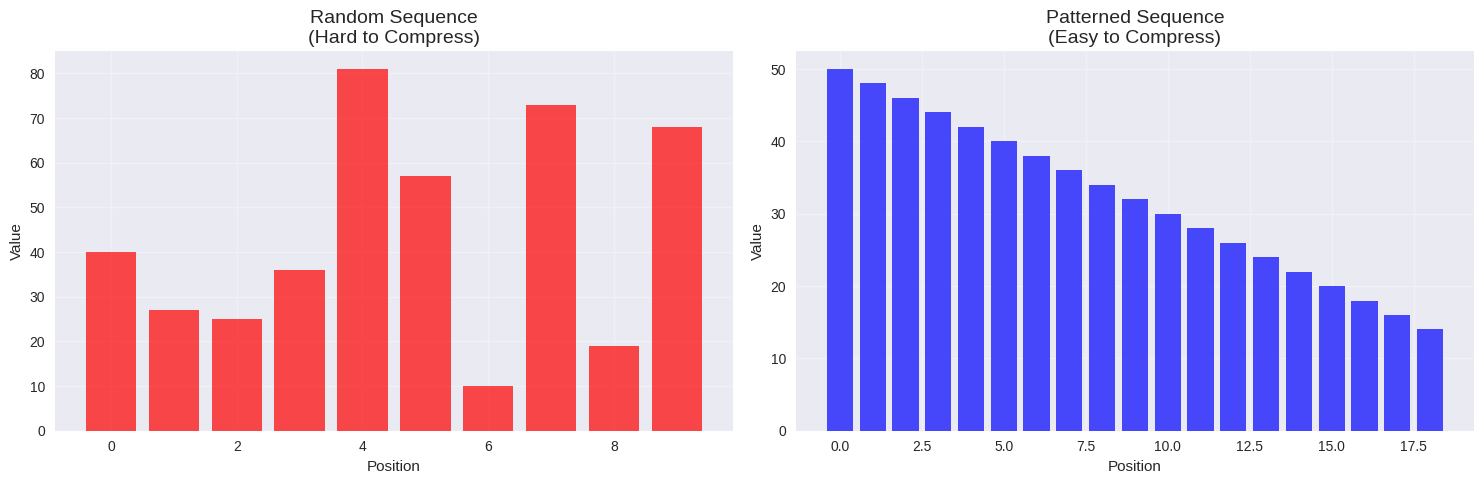

In [2]:
# Demonstrate the concept of efficient representations through pattern recognition
def demonstrate_pattern_compression():
    """
    This function demonstrates how patterns enable efficient data representation,
    analogous to the chess memory experiment described in the chapter.
    """

    # Sequence 1: Random numbers (hard to compress)
    random_sequence = [40, 27, 25, 36, 81, 57, 10, 73, 19, 68]

    # Sequence 2: Patterned sequence (easy to compress)
    pattern_sequence = list(range(50, 13, -2))  # Even numbers from 50 down to 14

    print("=== Pattern Recognition and Compression Demo ===")
    print(f"\nSequence 1 (Random): {random_sequence}")
    print(f"Length: {len(random_sequence)} numbers")
    print(f"Storage requirement: {len(random_sequence)} values")

    print(f"\nSequence 2 (Pattern): {pattern_sequence}")
    print(f"Length: {len(pattern_sequence)} numbers")
    print(f"Pattern: start=50, step=-2, count={len(pattern_sequence)}")
    print(f"Compressed storage: 3 values (start, step, count)")
    print(f"Compression ratio: {len(pattern_sequence)/3:.1f}:1")

    # Visualize the concept
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Random sequence
    ax1.bar(range(len(random_sequence)), random_sequence, color='red', alpha=0.7)
    ax1.set_title('Random Sequence\n(Hard to Compress)', fontsize=14)
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Value')
    ax1.grid(True, alpha=0.3)

    # Patterned sequence
    ax2.bar(range(len(pattern_sequence)), pattern_sequence, color='blue', alpha=0.7)
    ax2.set_title('Patterned Sequence\n(Easy to Compress)', fontsize=14)
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Value')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return random_sequence, pattern_sequence

# Run the demonstration
random_seq, pattern_seq = demonstrate_pattern_compression()

## 3. Autoencoder Theory and Mathematics {#autoencoder-theory}

### Basic Autoencoder Architecture

An autoencoder consists of:

1. **Input Layer**: $\mathbf{x} \in \mathbb{R}^n$
2. **Hidden Layer(s)**: $\mathbf{h} \in \mathbb{R}^p$ (where $p < n$ for undercomplete autoencoders)
3. **Output Layer**: $\hat{\mathbf{x}} \in \mathbb{R}^n$

### Mathematical Formulation

**Encoder Function:**
$$\mathbf{h} = f(\mathbf{x}) = \sigma_f(\mathbf{W}_f \mathbf{x} + \mathbf{b}_f)$$

**Decoder Function:**
$$\hat{\mathbf{x}} = g(\mathbf{h}) = \sigma_g(\mathbf{W}_g \mathbf{h} + \mathbf{b}_g)$$

**Complete Transformation:**
$$\hat{\mathbf{x}} = g(f(\mathbf{x})) = \sigma_g(\mathbf{W}_g \sigma_f(\mathbf{W}_f \mathbf{x} + \mathbf{b}_f) + \mathbf{b}_g)$$

### Loss Functions

**Mean Squared Error (MSE):**
$$\mathcal{L}_{MSE} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2$$

**Binary Cross-Entropy (for binary data):**
$$\mathcal{L}_{BCE} = -\frac{1}{n} \sum_{i=1}^{n} [x_i \log(\hat{x}_i) + (1-x_i) \log(1-\hat{x}_i)]$$

### Types of Autoencoders by Capacity

1. **Undercomplete**: $p < n$ (forces compression)
2. **Complete**: $p = n$ (same dimensionality)
3. **Overcomplete**: $p > n$ (requires regularization)

### Universal Approximation and Representational Power

**Theorem**: A single-layer autoencoder with sufficient hidden units can approximate any continuous function on a compact domain to arbitrary accuracy.

**Proof Sketch**: Follows from the universal approximation theorem for neural networks.

## 4. Linear Autoencoders and PCA {#linear-autoencoders}

### Theoretical Connection to PCA

**Theorem**: A linear autoencoder with MSE loss performs Principal Component Analysis (PCA).

**Mathematical Proof:**

For a linear autoencoder:
- $\mathbf{h} = \mathbf{W}_f \mathbf{x}$ (no bias, no activation)
- $\hat{\mathbf{x}} = \mathbf{W}_g \mathbf{h} = \mathbf{W}_g \mathbf{W}_f \mathbf{x}$

**Objective Function:**
$$\min_{\mathbf{W}_f, \mathbf{W}_g} \mathbb{E}[\|\mathbf{x} - \mathbf{W}_g \mathbf{W}_f \mathbf{x}\|^2]$$

**Solution**: The optimal solution is achieved when:
- $\mathbf{W}_f$ contains the top $p$ principal components (eigenvectors) of the covariance matrix
- $\mathbf{W}_g = \mathbf{W}_f^T$

### Implementation and Demonstration

=== Comparing PCA and Linear Autoencoder ===
Generated dataset shape: (1000, 3)

PCA explained variance ratio: [0.38314205 0.32957497]
Total variance explained: 0.713

=== Training Linear Autoencoder ===


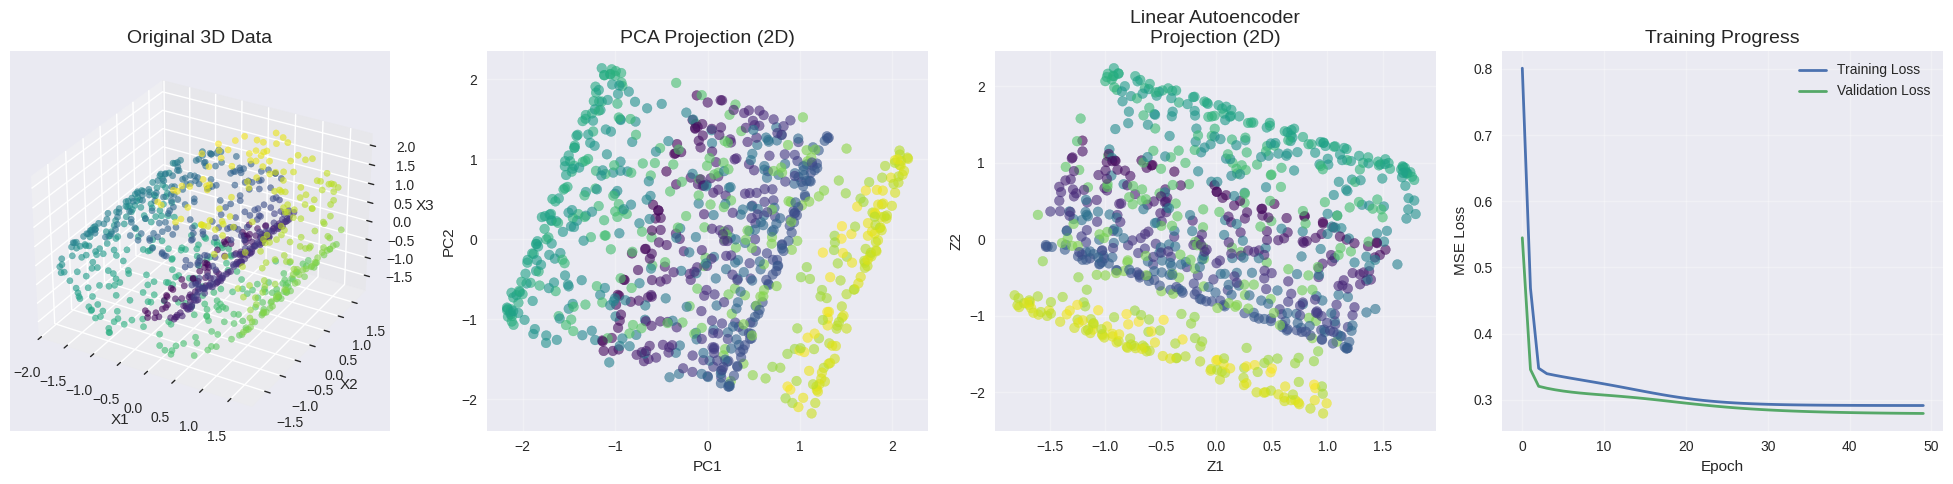


=== Reconstruction Error Comparison ===
PCA reconstruction error: 0.832416
Autoencoder reconstruction error: 0.837387
Difference: 0.004971


In [3]:
# Implementation of Linear Autoencoder for PCA
def create_linear_autoencoder_pca(input_dim, coding_dim):
    """
    Creates a linear autoencoder that performs PCA.

    Args:
        input_dim (int): Dimensionality of input data
        coding_dim (int): Dimensionality of latent representation

    Returns:
        encoder, decoder, autoencoder: Keras models
    """

    # Encoder: maps input to latent space
    encoder = keras.models.Sequential([
        keras.layers.Dense(coding_dim, input_shape=[input_dim], use_bias=False)
        # No activation function = linear transformation
    ])

    # Decoder: maps latent space back to input space
    decoder = keras.models.Sequential([
        keras.layers.Dense(input_dim, input_shape=[coding_dim], use_bias=False)
    ])

    # Complete autoencoder
    autoencoder = keras.models.Sequential([encoder, decoder])

    # Compile with MSE loss and SGD optimizer
    autoencoder.compile(
        loss="mse",
        optimizer=keras.optimizers.SGD(learning_rate=0.1),
        metrics=['mae']
    )

    return encoder, decoder, autoencoder

def generate_3d_dataset(n_samples=1000):
    """
    Generates a 3D dataset that lies approximately on a 2D plane,
    perfect for demonstrating PCA via linear autoencoder.
    """
    # Generate Swiss roll dataset
    X, color = make_swiss_roll(n_samples=n_samples, noise=0.1, random_state=42)

    # Normalize the data
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    return X.astype(np.float32), color

def compare_pca_autoencoder():
    """
    Compares traditional PCA with linear autoencoder on 3D data.
    This demonstrates the theoretical equivalence discussed in the chapter.
    """
    print("=== Comparing PCA and Linear Autoencoder ===")

    # Generate 3D dataset
    X, colors = generate_3d_dataset(1000)
    print(f"Generated dataset shape: {X.shape}")

    # Split into train/test
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    colors_train, colors_test = colors[:split_idx], colors[split_idx:]

    # Traditional PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train)
    X_pca_test = pca.transform(X_test)

    print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.3f}")

    # Linear Autoencoder
    encoder, decoder, autoencoder = create_linear_autoencoder_pca(3, 2)

    print("\n=== Training Linear Autoencoder ===")
    history = autoencoder.fit(
        X_train, X_train,  # Note: input = target for autoencoders
        epochs=50,
        batch_size=32,
        validation_data=(X_test, X_test),
        verbose=0
    )

    # Get autoencoder projections
    X_ae = encoder.predict(X_train, verbose=0)
    X_ae_test = encoder.predict(X_test, verbose=0)

    # Visualize results
    fig = plt.figure(figsize=(20, 5))

    # Original 3D data
    ax1 = fig.add_subplot(141, projection='3d')
    scatter = ax1.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2],
                         c=colors_train, cmap='viridis', alpha=0.6)
    ax1.set_title('Original 3D Data', fontsize=14)
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('X3')

    # PCA projection
    ax2 = fig.add_subplot(142)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_train, cmap='viridis', alpha=0.6)
    ax2.set_title('PCA Projection (2D)', fontsize=14)
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.grid(True, alpha=0.3)

    # Autoencoder projection
    ax3 = fig.add_subplot(143)
    ax3.scatter(X_ae[:, 0], X_ae[:, 1], c=colors_train, cmap='viridis', alpha=0.6)
    ax3.set_title('Linear Autoencoder\nProjection (2D)', fontsize=14)
    ax3.set_xlabel('Z1')
    ax3.set_ylabel('Z2')
    ax3.grid(True, alpha=0.3)

    # Training loss
    ax4 = fig.add_subplot(144)
    ax4.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax4.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax4.set_title('Training Progress', fontsize=14)
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('MSE Loss')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Calculate reconstruction errors
    X_reconstructed_pca = pca.inverse_transform(X_pca_test)
    X_reconstructed_ae = decoder.predict(X_ae_test, verbose=0)

    pca_error = np.mean(np.sum((X_test - X_reconstructed_pca)**2, axis=1))
    ae_error = np.mean(np.sum((X_test - X_reconstructed_ae)**2, axis=1))

    print(f"\n=== Reconstruction Error Comparison ===")
    print(f"PCA reconstruction error: {pca_error:.6f}")
    print(f"Autoencoder reconstruction error: {ae_error:.6f}")
    print(f"Difference: {abs(pca_error - ae_error):.6f}")

    return autoencoder, pca, history

# Run the comparison
autoencoder_model, pca_model, training_history = compare_pca_autoencoder()

## 5. Stacked Autoencoders {#stacked-autoencoders}

### Theoretical Foundation

**Stacked (Deep) Autoencoders** use multiple hidden layers to learn hierarchical representations:

$$\mathbf{h}_1 = f_1(\mathbf{x}) = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)$$
$$\mathbf{h}_2 = f_2(\mathbf{h}_1) = \sigma(\mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2)$$
$$\vdots$$
$$\mathbf{z} = f_L(\mathbf{h}_{L-1}) = \sigma(\mathbf{W}_L \mathbf{h}_{L-1} + \mathbf{b}_L)$$

**Decoder (Mirror Architecture):**
$$\hat{\mathbf{h}}_{L-1} = g_L(\mathbf{z}) = \sigma(\mathbf{W}_{L+1} \mathbf{z} + \mathbf{b}_{L+1})$$
$$\vdots$$
$$\hat{\mathbf{x}} = g_1(\hat{\mathbf{h}}_1) = \sigma(\mathbf{W}_{2L} \hat{\mathbf{h}}_1 + \mathbf{b}_{2L})$$

### Architectural Principles

1. **Symmetrical Architecture**: Decoder mirrors encoder
2. **Decreasing Dimensions**: Each layer reduces dimensionality toward the bottleneck
3. **Increasing Dimensions**: Decoder layers increase dimensionality back to input

### Weight Tying Technique

**Mathematical Formulation:**
For $N$ total layers, weight tying enforces:
$$\mathbf{W}_{N-L+1} = \mathbf{W}_L^T$$

**Benefits:**
- Reduces parameter count by ~50%
- Regularizes the model
- Speeds up training
- Reduces overfitting risk

### Implementation

In [4]:
# Load and preprocess Fashion-MNIST dataset
def load_fashion_mnist():
    """
    Loads and preprocesses the Fashion-MNIST dataset for autoencoder training.

    Returns:
        Preprocessed training and validation sets
    """
    print("Loading Fashion-MNIST dataset...")

    # Load dataset
    (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

    # Normalize pixel values to [0, 1]
    X_train_full = X_train_full.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Split training set into train and validation
    X_train = X_train_full[:50000]
    X_valid = X_train_full[50000:]
    y_train = y_train_full[:50000]
    y_valid = y_train_full[50000:]

    # Class names for Fashion-MNIST
    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

    print(f"Training set shape: {X_train.shape}")
    print(f"Validation set shape: {X_valid.shape}")
    print(f"Test set shape: {X_test.shape}")

    return X_train, X_valid, X_test, y_train, y_valid, y_test, class_names

# Custom layer for weight tying
class DenseTranspose(keras.layers.Layer):
    """
    Custom layer that implements weight tying by using the transpose
    of weights from another Dense layer.

    This implements the mathematical constraint: W_decoder = W_encoder^T
    """

    def __init__(self, dense_layer, activation=None, **kwargs):
        """
        Args:
            dense_layer: The Dense layer whose weights to transpose
            activation: Activation function to apply
        """
        self.dense = dense_layer
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        """Initialize bias parameters (weights are tied to the dense layer)"""
        self.biases = self.add_weight(
            name="bias",
            initializer="zeros",
            shape=[self.dense.input_shape[-1]]
        )
        super().build(batch_input_shape)

    def call(self, inputs):
        """Forward pass using transposed weights"""
        # Matrix multiplication with transposed weights: inputs @ W^T + b
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

def create_stacked_autoencoder(input_shape, architecture, use_weight_tying=False):
    """
    Creates a stacked autoencoder with the specified architecture.

    Args:
        input_shape: Shape of input data (height, width) for images
        architecture: List of hidden layer sizes [100, 30] means 784->100->30->100->784
        use_weight_tying: Whether to use weight tying between encoder/decoder

    Returns:
        encoder, decoder, autoencoder models
    """

    if use_weight_tying:
        return create_tied_autoencoder(input_shape, architecture)
    else:
        return create_standard_autoencoder(input_shape, architecture)

def create_standard_autoencoder(input_shape, architecture):
    """
    Creates a standard stacked autoencoder without weight tying.

    Mathematical formulation:
    Encoder: x -> h1 -> h2 -> ... -> z
    Decoder: z -> h2' -> h1' -> ... -> x'
    """

    input_dim = input_shape[0] * input_shape[1]  # Flatten dimension

    # Build encoder
    encoder_layers = [keras.layers.Flatten(input_shape=input_shape)]

    for units in architecture:
        encoder_layers.append(keras.layers.Dense(units, activation="selu"))

    encoder = keras.models.Sequential(encoder_layers)

    # Build decoder (mirror architecture)
    decoder_layers = []

    # Reverse architecture for decoder
    reversed_arch = architecture[:-1][::-1] + [input_dim]

    for i, units in enumerate(reversed_arch):
        if i == 0:  # First decoder layer
            decoder_layers.append(
                keras.layers.Dense(units, activation="selu",
                                 input_shape=[architecture[-1]])
            )
        elif i == len(reversed_arch) - 1:  # Output layer
            decoder_layers.append(
                keras.layers.Dense(units, activation="sigmoid")
            )
        else:
            decoder_layers.append(
                keras.layers.Dense(units, activation="selu")
            )

    decoder_layers.append(keras.layers.Reshape(input_shape))
    decoder = keras.models.Sequential(decoder_layers)

    # Combine encoder and decoder
    autoencoder = keras.models.Sequential([encoder, decoder])

    return encoder, decoder, autoencoder

def create_tied_autoencoder(input_shape, architecture):
    """
    Creates a stacked autoencoder with weight tying.

    Mathematical constraint: W_decoder_i = W_encoder_{n-i}^T
    """

    input_dim = input_shape[0] * input_shape[1]

    # Create encoder dense layers
    dense_layers = []
    encoder_layers = [keras.layers.Flatten(input_shape=input_shape)]

    for units in architecture:
        dense_layer = keras.layers.Dense(units, activation="selu")
        dense_layers.append(dense_layer)
        encoder_layers.append(dense_layer)

    encoder = keras.models.Sequential(encoder_layers)

    # Create decoder with tied weights
    decoder_layers = []

    # Reverse order for decoder, excluding the last layer
    for i in range(len(dense_layers) - 2, -1, -1):
        if i == 0:
            # Final decoder layer uses transpose of first encoder layer
            decoder_layers.append(
                DenseTranspose(dense_layers[i], activation="sigmoid")
            )
        else:
            decoder_layers.append(
                DenseTranspose(dense_layers[i], activation="selu")
            )

    decoder_layers.append(keras.layers.Reshape(input_shape))

    # Add input layer for decoder
    decoder_input = keras.layers.Input(shape=[architecture[-1]])
    x = decoder_input
    for layer in decoder_layers:
        x = layer(x)

    decoder = keras.models.Model(decoder_input, x)

    # Combine encoder and decoder
    autoencoder = keras.models.Sequential([encoder, decoder])

    return encoder, decoder, autoencoder

def train_and_evaluate_autoencoder(X_train, X_valid, architecture, use_weight_tying=False):
    """
    Trains and evaluates a stacked autoencoder.

    This function demonstrates the complete training pipeline described in the chapter.
    """

    print(f"\n=== Training Stacked Autoencoder ===")
    print(f"Architecture: {[784] + architecture + [784]}")
    print(f"Weight tying: {use_weight_tying}")

    # Create model
    encoder, decoder, autoencoder = create_stacked_autoencoder(
        input_shape=(28, 28),
        architecture=architecture,
        use_weight_tying=use_weight_tying
    )

    # Count parameters
    total_params = autoencoder.count_params()
    print(f"Total parameters: {total_params:,}")

    # Compile with binary crossentropy loss
    # As explained in the chapter, this treats reconstruction as
    # a multilabel binary classification problem
    autoencoder.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.SGD(learning_rate=1.5),
        metrics=['mse']
    )

    # Train the autoencoder
    # Note: input = target for autoencoders (self-supervised learning)
    history = autoencoder.fit(
        X_train, X_train,  # Input and target are the same
        epochs=10,
        batch_size=128,
        validation_data=(X_valid, X_valid),
        verbose=1
    )

    return encoder, decoder, autoencoder, history

# Load data and train model
X_train, X_valid, X_test, y_train, y_valid, y_test, class_names = load_fashion_mnist()

# Train standard autoencoder
encoder, decoder, autoencoder, history = train_and_evaluate_autoencoder(
    X_train, X_valid,
    architecture=[100, 30],  # 784 -> 100 -> 30 -> 100 -> 784
    use_weight_tying=False
)

Loading Fashion-MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (50000, 28, 28)
Validation set shape: (10000, 28, 28)
Test set shape: (10000, 28, 28)

=== Training Stacked Autoencoder ===
Architecture: [784, 100, 30, 784]
Weight tying: False
Total parameters: 163,814
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4633 - mse: 0.0766 - val_loss: 0.3407 - val_mse: 0.0325
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3331 - mse: 0.0302 - val_loss: 0.3223 - val_mse: 0.0260
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3198 - mse: 0.0259 - val_loss: 0.3166 - val_mse: 0.0243
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3142 - mse: 0.0240 - val_loss: 0.3113 - val_mse: 0.0226
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3101 - mse: 0.0226 - 


=== Model Analysis ===


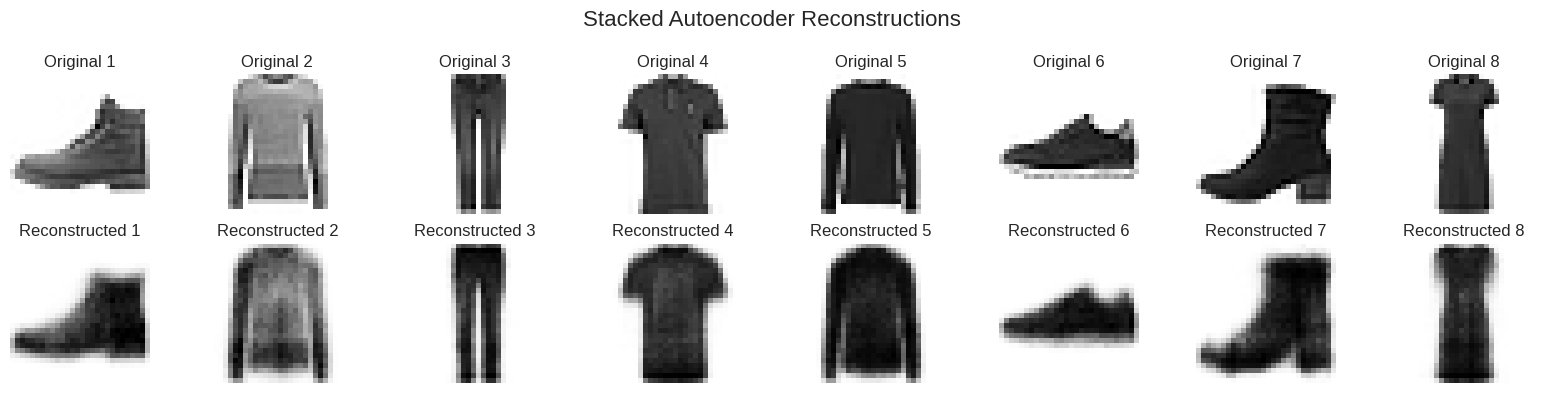

Mean Squared Error: 0.011022

=== Latent Space Visualization ===


Latent space shape: (5000, 30)
Applying t-SNE for 2D visualization...


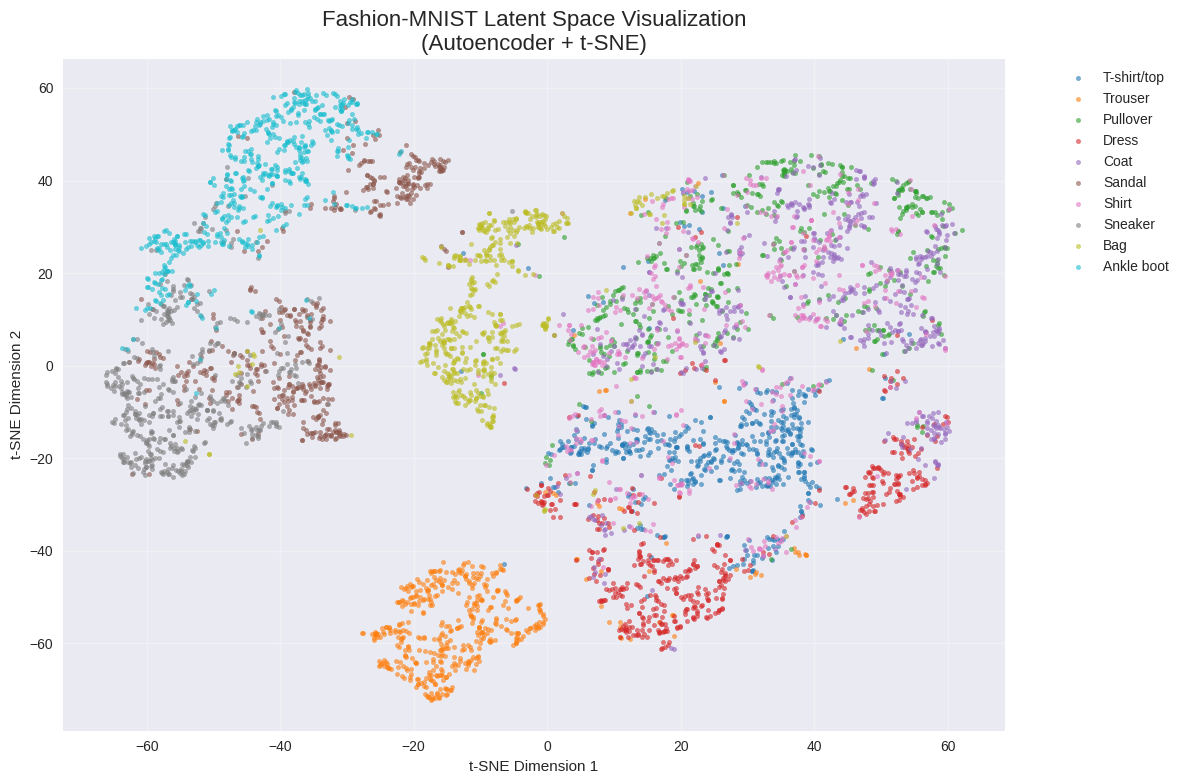

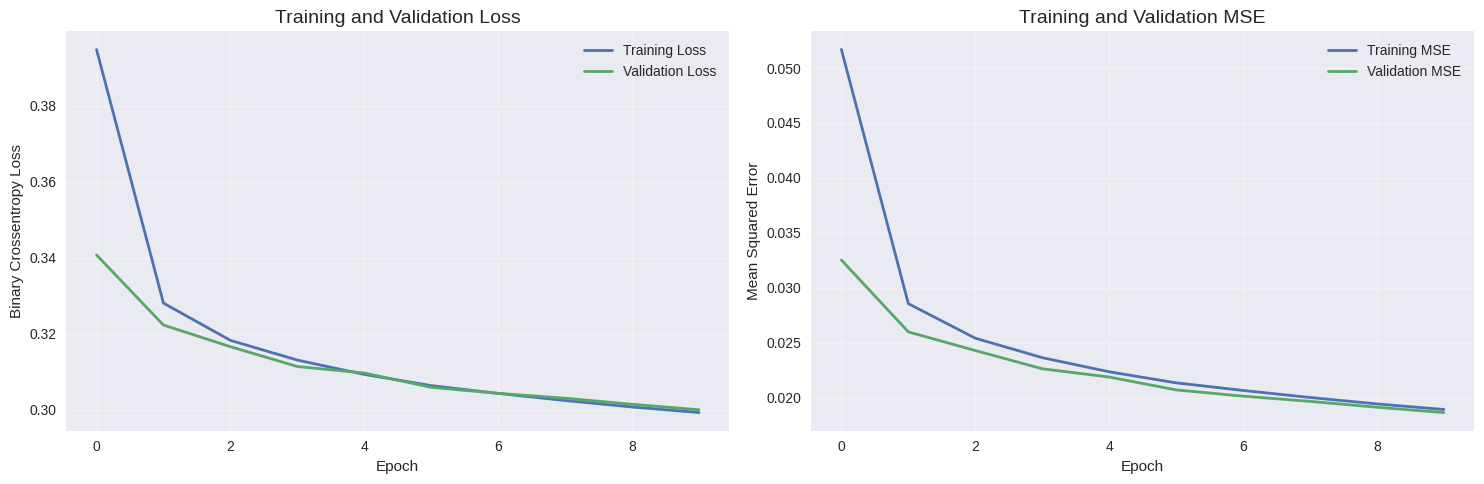

In [5]:
# Visualization and Analysis Functions
def plot_image(image, title=""):
    """
    Utility function to plot a single image.
    """
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    if title:
        plt.title(title)

def show_reconstructions(model, X_data, n_images=5, title_prefix=""):
    """
    Visualizes original images and their reconstructions.

    This demonstrates the reconstruction quality as discussed in the chapter.
    """
    reconstructions = model.predict(X_data[:n_images], verbose=0)

    fig, axes = plt.subplots(2, n_images, figsize=(n_images * 2, 4))

    for i in range(n_images):
        # Original images
        axes[0, i].imshow(X_data[i], cmap="binary")
        axes[0, i].set_title(f"Original {i+1}")
        axes[0, i].axis("off")

        # Reconstructed images
        axes[1, i].imshow(reconstructions[i], cmap="binary")
        axes[1, i].set_title(f"Reconstructed {i+1}")
        axes[1, i].axis("off")

    plt.suptitle(f"{title_prefix}Reconstructions", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Calculate and display reconstruction error
    mse = np.mean((X_data[:n_images] - reconstructions) ** 2)
    print(f"Mean Squared Error: {mse:.6f}")

def visualize_fashion_mnist_latent_space(encoder, X_data, y_data, class_names):
    """
    Visualizes the latent space representation using t-SNE.

    This demonstrates dimensionality reduction capabilities discussed in the chapter.
    """
    print("\n=== Latent Space Visualization ===")

    # Encode the data to latent space
    latent_representations = encoder.predict(X_data, verbose=0)
    print(f"Latent space shape: {latent_representations.shape}")

    # Apply t-SNE for 2D visualization
    print("Applying t-SNE for 2D visualization...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    latent_2d = tsne.fit_transform(latent_representations)

    # Create visualization
    plt.figure(figsize=(12, 8))

    # Color map for different classes
    colors = plt.cm.tab10(np.linspace(0, 1, 10))

    for i in range(10):
        mask = y_data == i
        plt.scatter(latent_2d[mask, 0], latent_2d[mask, 1],
                   c=[colors[i]], label=class_names[i], alpha=0.6, s=10)

    plt.title('Fashion-MNIST Latent Space Visualization\n(Autoencoder + t-SNE)', fontsize=16)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_training_progress(history):
    """
    Analyzes and visualizes the training progress.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Loss curves
    ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
    ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    ax1.set_title('Training and Validation Loss', fontsize=14)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # MSE curves
    ax2.plot(history.history['mse'], label='Training MSE', linewidth=2)
    ax2.plot(history.history['val_mse'], label='Validation MSE', linewidth=2)
    ax2.set_title('Training and Validation MSE', fontsize=14)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Mean Squared Error')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Analyze the trained autoencoder
print("\n=== Model Analysis ===")
show_reconstructions(autoencoder, X_valid, n_images=8, title_prefix="Stacked Autoencoder ")

# Visualize latent space (using subset for speed)
subset_size = 5000
indices = np.random.choice(len(X_valid), subset_size, replace=False)
visualize_fashion_mnist_latent_space(
    encoder, X_valid[indices], y_valid[indices], class_names
)

# Analyze training progress
analyze_training_progress(history)

## 6. Convolutional and Recurrent Autoencoders {#conv-recurrent-autoencoders}

### Convolutional Autoencoders

**Theoretical Motivation:**
For image data, convolutional layers are more effective than dense layers because they:
- Preserve spatial structure
- Share parameters across spatial locations
- Are translation invariant
- Require fewer parameters

**Mathematical Formulation:**

**Encoder (Downsampling):**
$$\mathbf{h}^{(l+1)} = \sigma(\mathbf{W}^{(l)} * \mathbf{h}^{(l)} + \mathbf{b}^{(l)})$$
$$\mathbf{h}^{(l+1)}_{pooled} = \text{MaxPool}(\mathbf{h}^{(l+1)})$$

**Decoder (Upsampling):**
$$\mathbf{h}^{(l+1)} = \sigma(\mathbf{W}^{(l)} *^T \mathbf{h}^{(l)} + \mathbf{b}^{(l)})$$

Where $*^T$ denotes transposed convolution (deconvolution).

### Recurrent Autoencoders

**For Sequential Data:**
- **Encoder**: Sequence-to-vector RNN
- **Decoder**: Vector-to-sequence RNN

**Mathematical Formulation:**

**Encoder RNN:**
$$\mathbf{h}_t = \tanh(\mathbf{W}_{hh} \mathbf{h}_{t-1} + \mathbf{W}_{xh} \mathbf{x}_t + \mathbf{b}_h)$$
$$\mathbf{z} = \mathbf{h}_T$$ (final hidden state)

**Decoder RNN:**
$$\mathbf{h}_t = \tanh(\mathbf{W}_{hh} \mathbf{h}_{t-1} + \mathbf{W}_{zh} \mathbf{z} + \mathbf{b}_h)$$
$$\hat{\mathbf{x}}_t = \sigma(\mathbf{W}_{hy} \mathbf{h}_t + \mathbf{b}_y)$$


=== Convolutional Autoencoder Demonstration ===

Encoder Architecture:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)


Decoder Architecture:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (None, 7, 7, 32)       │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 16)     │         4,624 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)


Training convolutional autoencoder...
Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.6063 - mse: 0.1325 - val_loss: 0.3737 - val_mse: 0.0393
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3527 - mse: 0.0343 - val_loss: 0.3298 - val_mse: 0.0281
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3234 - mse: 0.0266 - val_loss: 0.3165 - val_mse: 0.0246
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3122 - mse: 0.0234 - val_loss: 0.3088 - val_mse: 0.0225
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3048 - mse: 0.0213 - val_loss: 0.3030 - val_mse: 0.0208


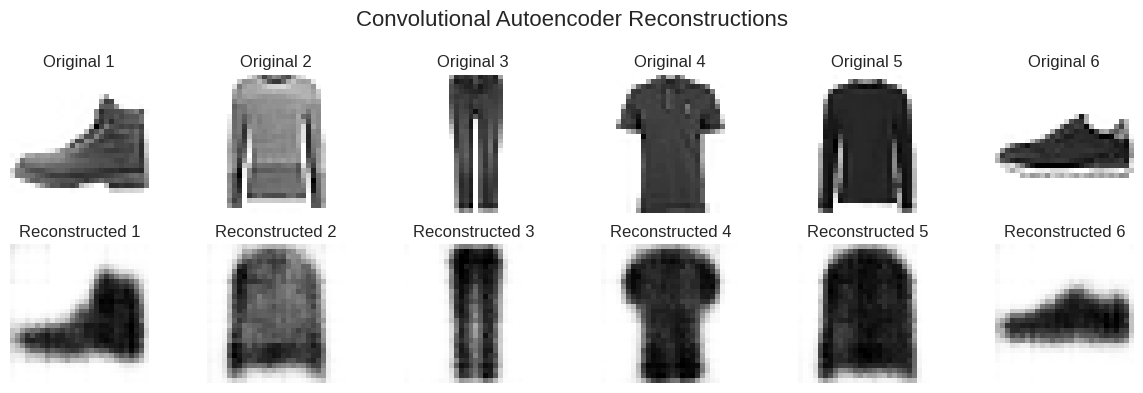

Mean Squared Error: 0.015037

=== Recurrent Autoencoder Demonstration ===
Treating each 28x28 image as a sequence of 28 rows

Recurrent Autoencoder Architecture:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 30)             │        67,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 28, 28)         │        55,228 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,548 (478.70 KB)

 Trainable params: 122,548 (478.70 KB)

 Non-trainable params: 0 (0.00 B)


Training recurrent autoencoder...
Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.5997 - mse: 0.1296 - val_loss: 0.4859 - val_mse: 0.0811
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.4749 - mse: 0.0784 - val_loss: 0.4305 - val_mse: 0.0607
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4153 - mse: 0.0574 - val_loss: 0.3875 - val_mse: 0.0465
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3780 - mse: 0.0451 - val_loss: 0.3713 - val_mse: 0.0418
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3625 - mse: 0.0403 - val_loss: 0.3649 - val_mse: 0.0398


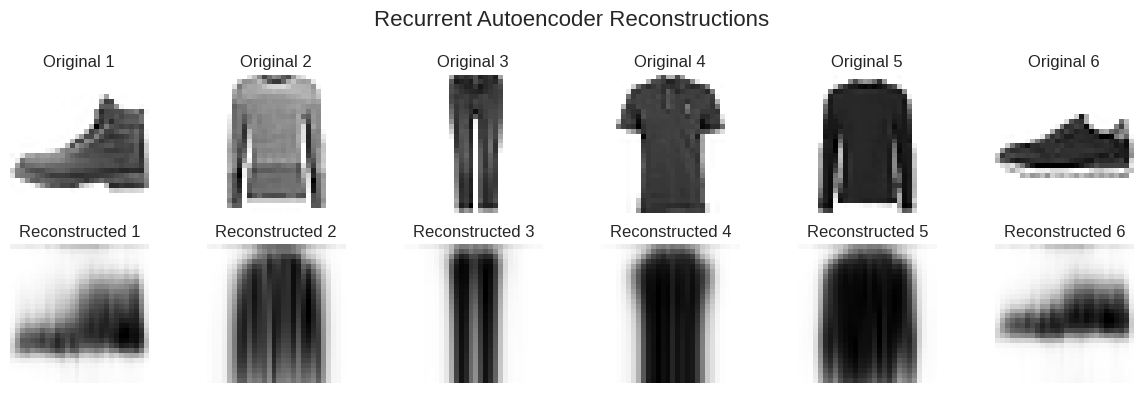

Mean Squared Error: 0.028508


In [6]:
# Convolutional Autoencoder Implementation
def create_convolutional_autoencoder(input_shape):
    """
    Creates a convolutional autoencoder for image data.

    Architecture follows the guidelines from the chapter:
    - Encoder: Conv2D + MaxPooling layers
    - Decoder: Conv2DTranspose layers for upsampling

    Args:
        input_shape: Shape of input images (height, width, channels)

    Returns:
        encoder, decoder, autoencoder models
    """

    # Encoder: Spatial downsampling with feature extraction
    conv_encoder = keras.models.Sequential([
        # Add channel dimension for grayscale images
        keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),

        # First conv block: 28x28x1 -> 14x14x16
        keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),

        # Second conv block: 14x14x16 -> 7x7x32
        keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2),

        # Third conv block: 7x7x32 -> 3x3x64 (bottleneck)
        keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
        keras.layers.MaxPool2D(pool_size=2)
    ])

    # Decoder: Spatial upsampling with feature reconstruction
    conv_decoder = keras.models.Sequential([
        # Input shape is the output of encoder: 3x3x64

        # First transpose conv: 3x3x64 -> 7x7x32
        keras.layers.Conv2DTranspose(
            32, kernel_size=3, strides=2, padding="valid",
            activation="selu", input_shape=[3, 3, 64]
        ),

        # Second transpose conv: 7x7x32 -> 14x14x16
        keras.layers.Conv2DTranspose(
            16, kernel_size=3, strides=2, padding="same", activation="selu"
        ),

        # Final transpose conv: 14x14x16 -> 28x28x1
        keras.layers.Conv2DTranspose(
            1, kernel_size=3, strides=2, padding="same", activation="sigmoid"
        ),

        # Remove channel dimension
        keras.layers.Reshape([28, 28])
    ])

    # Combine encoder and decoder
    conv_autoencoder = keras.models.Sequential([conv_encoder, conv_decoder])

    return conv_encoder, conv_decoder, conv_autoencoder

def create_recurrent_autoencoder(sequence_length, feature_dim, latent_dim=30):
    """
    Creates a recurrent autoencoder for sequential data.

    Mathematical formulation:
    - Encoder: sequence -> vector (many-to-one)
    - Decoder: vector -> sequence (one-to-many)

    Args:
        sequence_length: Length of input sequences
        feature_dim: Dimensionality of features at each time step
        latent_dim: Dimensionality of latent representation

    Returns:
        encoder, decoder, autoencoder models
    """

    # Encoder: sequence-to-vector RNN
    recurrent_encoder = keras.models.Sequential([
        # First LSTM layer returns sequences
        keras.layers.LSTM(
            100, return_sequences=True,
            input_shape=[sequence_length, feature_dim]
        ),

        # Second LSTM layer returns only final state (vector)
        keras.layers.LSTM(latent_dim)
    ])

    # Decoder: vector-to-sequence RNN
    recurrent_decoder = keras.models.Sequential([
        # Repeat the latent vector for each time step
        keras.layers.RepeatVector(sequence_length, input_shape=[latent_dim]),

        # LSTM layer that returns sequences
        keras.layers.LSTM(100, return_sequences=True),

        # Dense layer to map LSTM output to feature dimension
        keras.layers.TimeDistributed(
            keras.layers.Dense(feature_dim, activation="sigmoid")
        )
    ])

    # Combine encoder and decoder
    recurrent_autoencoder = keras.models.Sequential([
        recurrent_encoder, recurrent_decoder
    ])

    return recurrent_encoder, recurrent_decoder, recurrent_autoencoder

def demonstrate_conv_autoencoder():
    """
    Demonstrates convolutional autoencoder on Fashion-MNIST.

    This shows the advantage of preserving spatial structure in images.
    """

    print("\n=== Convolutional Autoencoder Demonstration ===")

    # Create convolutional autoencoder
    conv_encoder, conv_decoder, conv_autoencoder = create_convolutional_autoencoder(
        input_shape=(28, 28)
    )

    # Display architecture
    print("\nEncoder Architecture:")
    conv_encoder.summary()

    print("\nDecoder Architecture:")
    conv_decoder.summary()

    # Compile model
    conv_autoencoder.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['mse']
    )

    # Train on small subset for demonstration
    print("\nTraining convolutional autoencoder...")
    conv_history = conv_autoencoder.fit(
        X_train[:5000], X_train[:5000],
        epochs=5,
        batch_size=128,
        validation_data=(X_valid[:1000], X_valid[:1000]),
        verbose=1
    )

    # Show reconstructions
    show_reconstructions(
        conv_autoencoder, X_valid, n_images=6,
        title_prefix="Convolutional Autoencoder "
    )

    return conv_encoder, conv_decoder, conv_autoencoder, conv_history

def demonstrate_recurrent_autoencoder():
    """
    Demonstrates recurrent autoencoder using Fashion-MNIST treated as sequences.

    Each image is treated as a sequence of 28 rows, each with 28 features.
    """

    print("\n=== Recurrent Autoencoder Demonstration ===")
    print("Treating each 28x28 image as a sequence of 28 rows")

    # Create recurrent autoencoder
    # Treat 28x28 images as sequences of length 28 with 28 features each
    rec_encoder, rec_decoder, rec_autoencoder = create_recurrent_autoencoder(
        sequence_length=28, feature_dim=28, latent_dim=30
    )

    # Display architecture
    print("\nRecurrent Autoencoder Architecture:")
    rec_autoencoder.summary()

    # Compile model
    rec_autoencoder.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['mse']
    )

    # Train on small subset for demonstration
    print("\nTraining recurrent autoencoder...")
    rec_history = rec_autoencoder.fit(
        X_train[:3000], X_train[:3000],
        epochs=5,
        batch_size=64,
        validation_data=(X_valid[:500], X_valid[:500]),
        verbose=1
    )

    # Show reconstructions
    show_reconstructions(
        rec_autoencoder, X_valid, n_images=6,
        title_prefix="Recurrent Autoencoder "
    )

    return rec_encoder, rec_decoder, rec_autoencoder, rec_history

# Demonstrate both architectures
conv_models = demonstrate_conv_autoencoder()
rec_models = demonstrate_recurrent_autoencoder()

## 7. Denoising Autoencoders {#denoising-autoencoders}

### Theoretical Foundation

**Denoising Autoencoders** add noise to inputs during training, forcing the model to learn robust features that can reconstruct clean data from corrupted inputs.

**Mathematical Formulation:**
- Clean input: $\mathbf{x}$
- Corrupted input: $\tilde{\mathbf{x}} = \mathbf{x} + \boldsymbol{\epsilon}$ where $\boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2\mathbf{I})$
- Objective: $\min_{\theta} \mathbb{E}_{\mathbf{x}, \boldsymbol{\epsilon}}[\|\mathbf{x} - f_\theta(\tilde{\mathbf{x}})\|^2]$

### Types of Noise

1. **Gaussian Noise**: $\tilde{\mathbf{x}} = \mathbf{x} + \boldsymbol{\epsilon}$
2. **Dropout Noise**: Randomly set inputs to zero
3. **Salt-and-Pepper Noise**: Random pixels set to 0 or 1

### Benefits

1. **Regularization**: Prevents overfitting
2. **Feature Robustness**: Learns features invariant to noise
3. **Generalization**: Better performance on unseen data
4. **Practical Applications**: Image denoising, data cleaning

### Implementation


=== Denoising Autoencoder Demonstration ===

--- Training Dropout Denoising Autoencoder ---
Final training loss: 0.3103
Final validation loss: 0.3056

--- Training Gaussian Denoising Autoencoder ---
Final training loss: 0.3087
Final validation loss: 0.3060


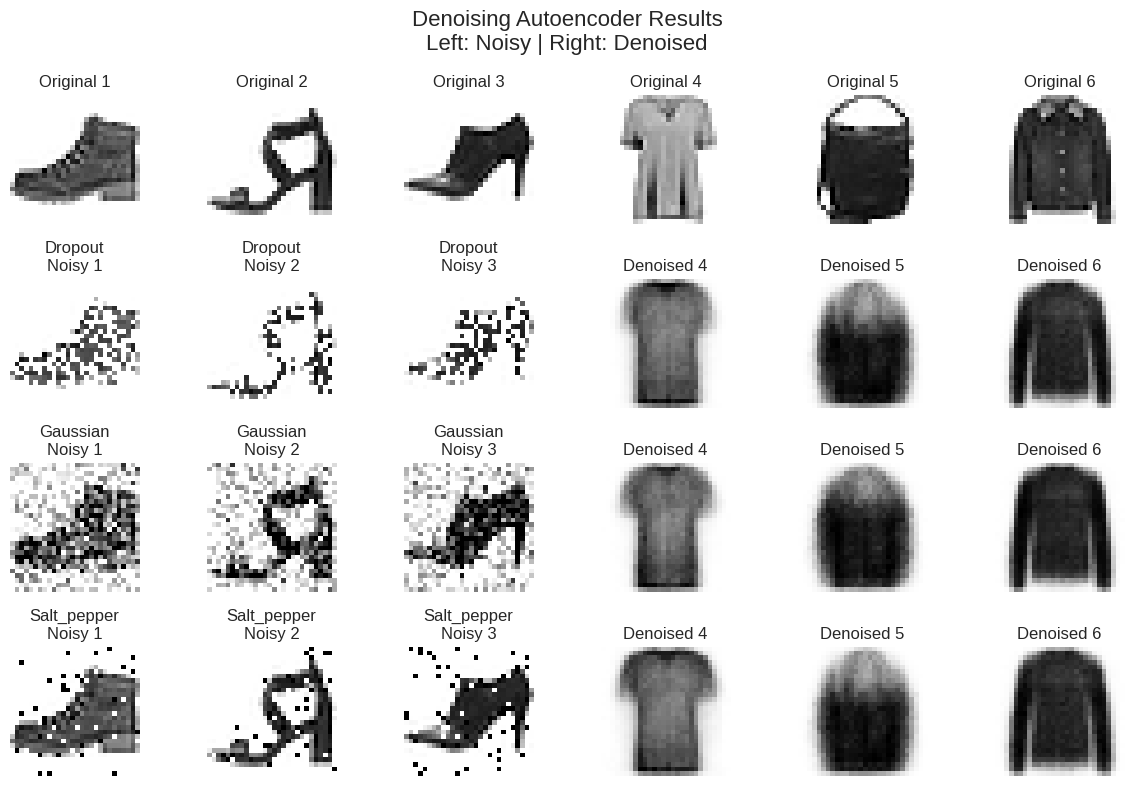


=== Denoising Performance Metrics ===

Dropout noise:
  MSE (original vs noisy): 0.122668
  MSE (original vs denoised): 0.098549
  Improvement: 19.66%

Gaussian noise:
  MSE (original vs noisy): 0.054359
  MSE (original vs denoised): 0.037704
  Improvement: 30.64%


In [7]:
def create_denoising_autoencoder(input_shape, noise_type="dropout", noise_level=0.5):
    """
    Creates a denoising autoencoder with specified noise type.

    Args:
        input_shape: Shape of input data
        noise_type: "dropout" or "gaussian"
        noise_level: Noise intensity (dropout rate or std for gaussian)

    Returns:
        encoder, decoder, autoencoder models
    """

    # Encoder with noise injection
    encoder_layers = [keras.layers.Flatten(input_shape=input_shape)]

    # Add noise layer
    if noise_type == "dropout":
        encoder_layers.append(keras.layers.Dropout(noise_level))
    elif noise_type == "gaussian":
        encoder_layers.append(keras.layers.GaussianNoise(noise_level))
    else:
        raise ValueError("noise_type must be 'dropout' or 'gaussian'")

    # Hidden layers
    encoder_layers.extend([
        keras.layers.Dense(100, activation="selu"),
        keras.layers.Dense(30, activation="selu")
    ])

    encoder = keras.models.Sequential(encoder_layers)

    # Decoder (clean reconstruction)
    decoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="selu", input_shape=[30]),
        keras.layers.Dense(28 * 28, activation="sigmoid"),
        keras.layers.Reshape([28, 28])
    ])

    # Complete autoencoder
    autoencoder = keras.models.Sequential([encoder, decoder])

    return encoder, decoder, autoencoder

def add_noise_to_data(X, noise_type="dropout", noise_level=0.5):
    """
    Manually adds noise to data for visualization purposes.

    Args:
        X: Clean input data
        noise_type: Type of noise to add
        noise_level: Intensity of noise

    Returns:
        Noisy version of input data
    """

    if noise_type == "dropout":
        # Randomly set pixels to 0
        mask = np.random.random(X.shape) > noise_level
        return X * mask

    elif noise_type == "gaussian":
        # Add Gaussian noise
        noise = np.random.normal(0, noise_level, X.shape)
        return np.clip(X + noise, 0, 1)

    elif noise_type == "salt_pepper":
        # Salt and pepper noise
        noisy = X.copy()

        # Salt noise (white pixels)
        salt_mask = np.random.random(X.shape) < noise_level/2
        noisy[salt_mask] = 1

        # Pepper noise (black pixels)
        pepper_mask = np.random.random(X.shape) < noise_level/2
        noisy[pepper_mask] = 0

        return noisy

    else:
        raise ValueError("Unknown noise type")

def demonstrate_denoising_capabilities():
    """
    Demonstrates denoising capabilities with different noise types.

    This function shows how denoising autoencoders can recover clean images
    from various types of corrupted inputs.
    """

    print("\n=== Denoising Autoencoder Demonstration ===")

    # Train denoising autoencoders with different noise types
    noise_types = ["dropout", "gaussian"]
    noise_levels = [0.5, 0.3]

    models = {}

    for noise_type, noise_level in zip(noise_types, noise_levels):
        print(f"\n--- Training {noise_type.capitalize()} Denoising Autoencoder ---")

        # Create model
        encoder, decoder, autoencoder = create_denoising_autoencoder(
            input_shape=(28, 28),
            noise_type=noise_type,
            noise_level=noise_level
        )

        # Compile
        autoencoder.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['mse']
        )

        # Train (noise is added automatically by the noise layer)
        history = autoencoder.fit(
            X_train[:5000], X_train[:5000],  # Clean targets
            epochs=10,
            batch_size=128,
            validation_data=(X_valid[:1000], X_valid[:1000]),
            verbose=0
        )

        models[noise_type] = (encoder, decoder, autoencoder, history)

        print(f"Final training loss: {history.history['loss'][-1]:.4f}")
        print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

    return models

def visualize_denoising_results(models, n_images=6):
    """
    Visualizes denoising results for different noise types.

    Shows: Original -> Noisy -> Denoised for each noise type
    """

    # Select random images for demonstration
    indices = np.random.choice(len(X_valid), n_images, replace=False)
    test_images = X_valid[indices]

    # Test different noise types
    noise_types = ["dropout", "gaussian", "salt_pepper"]
    noise_levels = [0.5, 0.3, 0.1]

    fig, axes = plt.subplots(len(noise_types) + 1, n_images,
                            figsize=(n_images * 2, (len(noise_types) + 1) * 2))

    # Show original images
    for i in range(n_images):
        axes[0, i].imshow(test_images[i], cmap='binary')
        axes[0, i].set_title(f'Original {i+1}')
        axes[0, i].axis('off')

    # Process each noise type
    for row, (noise_type, noise_level) in enumerate(zip(noise_types, noise_levels), 1):
        # Add noise
        noisy_images = add_noise_to_data(test_images, noise_type, noise_level)

        # Get denoised results (if model exists)
        if noise_type in models:
            _, _, autoencoder, _ = models[noise_type]
            # For models with built-in noise, we test on clean images
            # The noise is added internally during prediction
            denoised_images = autoencoder.predict(test_images, verbose=0)
        else:
            # For salt-pepper noise, use dropout model as approximation
            _, _, autoencoder, _ = models['dropout']
            denoised_images = autoencoder.predict(noisy_images, verbose=0)

        # Show results
        for i in range(n_images):
            if i < n_images // 2:
                # Show noisy images
                axes[row, i].imshow(noisy_images[i], cmap='binary')
                axes[row, i].set_title(f'{noise_type.capitalize()}\nNoisy {i+1}')
            else:
                # Show denoised images
                axes[row, i].imshow(denoised_images[i], cmap='binary')
                axes[row, i].set_title(f'Denoised {i+1}')
            axes[row, i].axis('off')

    plt.suptitle('Denoising Autoencoder Results\nLeft: Noisy | Right: Denoised',
                 fontsize=16)
    plt.tight_layout()
    plt.show()

    # Calculate denoising metrics
    print("\n=== Denoising Performance Metrics ===")

    for noise_type in ['dropout', 'gaussian']:
        if noise_type in models:
            _, _, autoencoder, _ = models[noise_type]

            # Create noisy test data
            noise_level = 0.5 if noise_type == 'dropout' else 0.3

            # For fair comparison, manually add noise and test reconstruction
            noisy_test = add_noise_to_data(test_images, noise_type, noise_level)
            reconstructed = autoencoder.predict(noisy_test, verbose=0)

            # Calculate metrics
            mse_noisy = np.mean((test_images - noisy_test) ** 2)
            mse_reconstructed = np.mean((test_images - reconstructed) ** 2)
            improvement = (mse_noisy - mse_reconstructed) / mse_noisy * 100

            print(f"\n{noise_type.capitalize()} noise:")
            print(f"  MSE (original vs noisy): {mse_noisy:.6f}")
            print(f"  MSE (original vs denoised): {mse_reconstructed:.6f}")
            print(f"  Improvement: {improvement:.2f}%")

# Train and evaluate denoising autoencoders
denoising_models = demonstrate_denoising_capabilities()
visualize_denoising_results(denoising_models)

## 8. Sparse Autoencoders {#sparse-autoencoders}

### Theoretical Foundation

**Sparse Autoencoders** constrain the hidden layer activations to be sparse, forcing the model to learn a distributed representation where only a few neurons are active for each input.

### Mathematical Formulation

**Sparsity Constraint using L1 Regularization:**
$$\mathcal{L}_{sparse} = \mathcal{L}_{reconstruction} + \lambda \sum_{j=1}^{n_h} |h_j|$$

Where $h_j$ are the hidden layer activations and $\lambda$ is the sparsity weight.

**KL-Divergence Sparsity:**
For target sparsity $\rho$ and actual average activation $\hat{\rho}_j$:

$$\mathcal{L}_{KL} = \sum_{j=1}^{n_h} D_{KL}(\rho \| \hat{\rho}_j)$$

Where:
$$D_{KL}(\rho \| \hat{\rho}_j) = \rho \log\frac{\rho}{\hat{\rho}_j} + (1-\rho) \log\frac{1-\rho}{1-\hat{\rho}_j}$$

**Complete Objective:**
$$\mathcal{L}_{total} = \mathcal{L}_{reconstruction} + \beta \mathcal{L}_{KL}$$

### Benefits of Sparsity

1. **Interpretability**: Each neuron represents a specific feature
2. **Efficiency**: Fewer active neurons reduce computation
3. **Robustness**: Distributed representation is more robust
4. **Feature Disentanglement**: Different neurons capture different aspects


=== Sparse Autoencoder Demonstration ===

--- Training L1 Sparse Autoencoder ---
Training with l1 sparsity constraint...
Final loss: 0.4905
Overall mean activation: 0.0001
Low activations (<0.1): 100.0%
Neurons near target: 0.0%

--- Training KL_DIVERGENCE Sparse Autoencoder ---
Training with kl_divergence sparsity constraint...
Final loss: 0.3230
Overall mean activation: -0.4224
Low activations (<0.1): 68.9%
Neurons near target: 3.0%


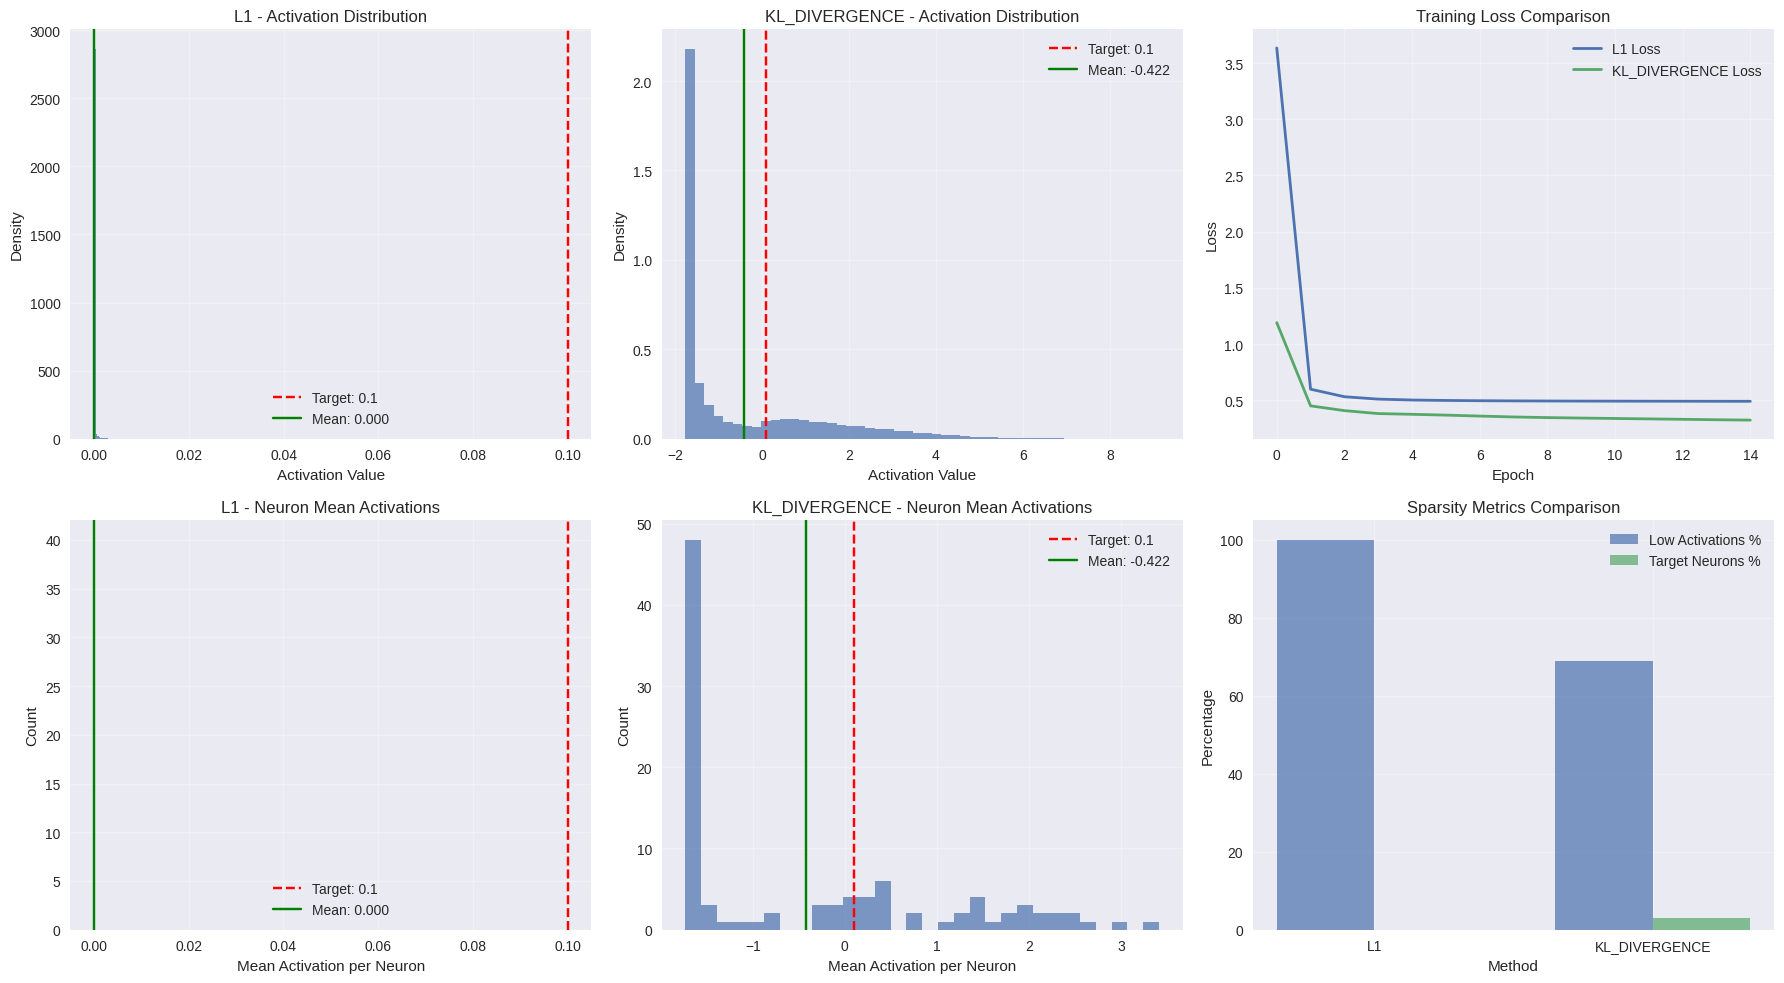

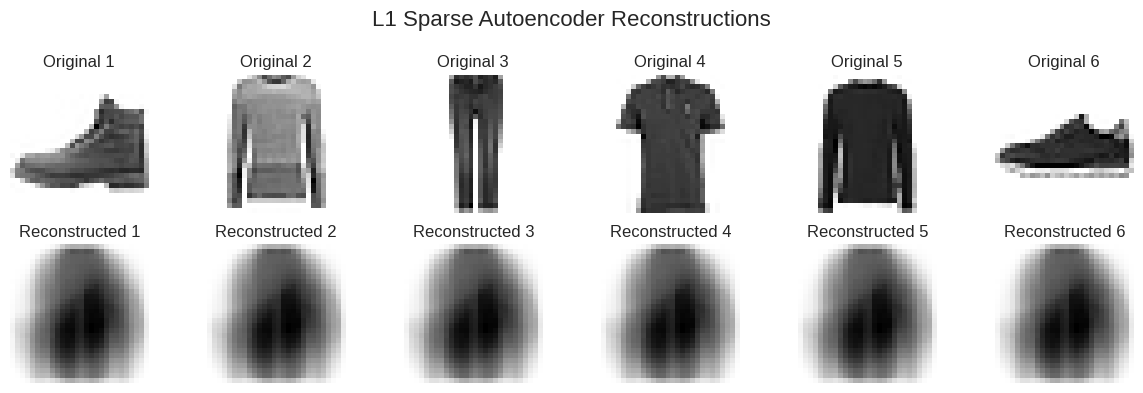

Mean Squared Error: 0.081704


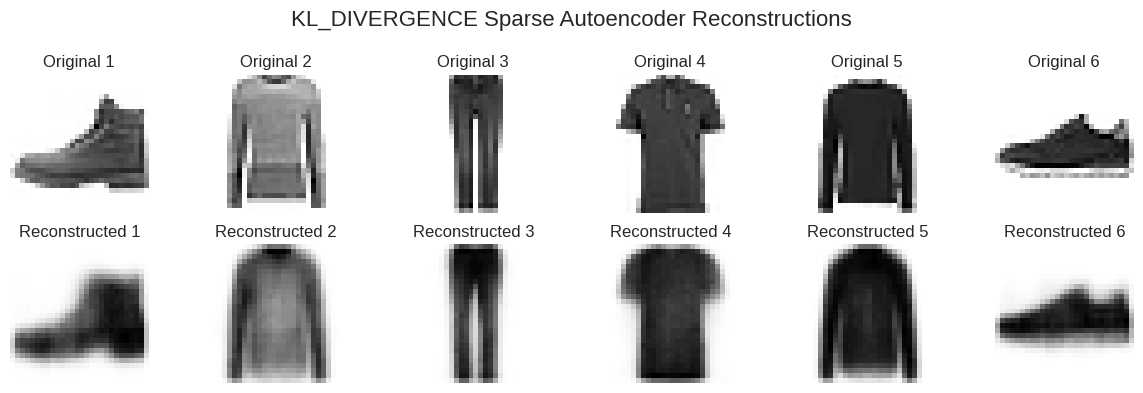

Mean Squared Error: 0.015412


In [10]:
# Custom KL Divergence Regularizer
class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    """
    Custom regularizer that implements KL divergence sparsity constraint.

    This encourages the average activation of each neuron to be close to
    a target sparsity level (typically 0.05-0.1).

    Mathematical formulation:
    KL(ρ || ρ̂_j) = ρ log(ρ/ρ̂_j) + (1-ρ) log((1-ρ)/(1-ρ̂_j))

    where:
    - ρ is the target sparsity
    - ρ̂_j is the average activation of neuron j
    """

    def __init__(self, weight, target=0.1):
        """
        Args:
            weight: Sparsity regularization strength (β)
            target: Target sparsity level (ρ)
        """
        self.weight = weight
        self.target = target

    def __call__(self, inputs):
        """
        Computes KL divergence regularization term.

        Args:
            inputs: Hidden layer activations [batch_size, n_hidden]

        Returns:
            Scalar regularization loss
        """
        # Calculate average activation for each neuron across the batch
        mean_activations = tf.reduce_mean(inputs, axis=0)

        # KL divergence between target and actual sparsity
        # KL(ρ || ρ̂) = ρ log(ρ/ρ̂) + (1-ρ) log((1-ρ)/(1-ρ̂))
        kl_div = (
            self.target * tf.math.log(self.target / (mean_activations + 1e-8)) +
            (1 - self.target) * tf.math.log(
                (1 - self.target) / (1 - mean_activations + 1e-8)
            )
        )

        # Sum over all neurons and apply weight
        return self.weight * tf.reduce_sum(kl_div)

    def get_config(self):
        return {'weight': self.weight, 'target': self.target}

def create_sparse_autoencoder(input_shape, sparsity_type="l1", sparsity_params=None):
    """
    Creates a sparse autoencoder with the specified sparsity constraint.

    Args:
        input_shape: Shape of input data
        sparsity_type: "l1" or "kl_divergence"
        sparsity_params: Dictionary with sparsity parameters

    Returns:
        encoder, decoder, autoencoder models
    """

    if sparsity_params is None:
        sparsity_params = {'weight': 1e-3, 'target': 0.1}

    # Encoder with sparsity constraint
    encoder_layers = [
        keras.layers.Flatten(input_shape=input_shape),
        keras.layers.Dense(100, activation="selu"),
    ]

    # Add sparse coding layer
    if sparsity_type == "l1":
        # L1 regularization approach
        encoder_layers.extend([
            keras.layers.Dense(300, activation="sigmoid"),
            keras.layers.ActivityRegularization(l1=sparsity_params['weight'])
        ])

    elif sparsity_type == "kl_divergence":
        # KL divergence regularization
        kl_regularizer = KLDivergenceRegularizer(
            weight=sparsity_params['weight'],
            target=sparsity_params['target']
        )
        encoder_layers.append(
            keras.layers.Dense(
                300, activation="sigmoid",
                activity_regularizer=kl_regularizer
            )
        )

    else:
        raise ValueError("sparsity_type must be 'l1' or 'kl_divergence'")

    encoder = keras.models.Sequential(encoder_layers)

    # Decoder (no sparsity constraint)
    decoder = keras.models.Sequential([
        keras.layers.Dense(100, activation="selu", input_shape=[300]),
        keras.layers.Dense(28 * 28, activation="sigmoid"),
        keras.layers.Reshape([28, 28])
    ])

    # Complete autoencoder
    autoencoder = keras.models.Sequential([encoder, decoder])

    return encoder, decoder, autoencoder

def analyze_sparsity(activations, target_sparsity=0.1):
    """
    Analyzes the sparsity of hidden layer activations.

    Args:
        activations: Hidden layer activations [n_samples, n_neurons]
        target_sparsity: Target sparsity level

    Returns:
        Dictionary with sparsity statistics
    """

    # Calculate sparsity metrics
    mean_activations = np.mean(activations, axis=0)  # Average per neuron
    overall_mean = np.mean(activations)  # Overall average

    # Percentage of activations below threshold
    threshold = 0.1
    low_activations = np.mean(activations < threshold) * 100

    # Neurons with mean activation close to target
    tolerance = 0.05
    target_neurons = np.mean(
        np.abs(mean_activations - target_sparsity) < tolerance
    ) * 100

    stats = {
        'overall_mean': overall_mean,
        'neuron_mean_activations': mean_activations,
        'low_activations_percent': low_activations,
        'target_neurons_percent': target_neurons,
        'std_activations': np.std(activations),
        'target_sparsity': target_sparsity
    }

    return stats

def demonstrate_sparse_autoencoders():
    """
    Demonstrates and compares different sparsity constraints.

    This function trains sparse autoencoders with L1 and KL divergence
    regularization and analyzes their sparsity patterns.
    """

    print("\n=== Sparse Autoencoder Demonstration ===")

    sparsity_methods = {
        'l1': {'weight': 1e-3, 'target': 0.1},
        'kl_divergence': {'weight': 0.05, 'target': 0.1}
    }

    sparse_models = {}

    for method, params in sparsity_methods.items():
        print(f"\n--- Training {method.upper()} Sparse Autoencoder ---")

        # Create sparse autoencoder
        encoder, decoder, autoencoder = create_sparse_autoencoder(
            input_shape=(28, 28),
            sparsity_type=method,
            sparsity_params=params
        )

        # Compile model
        autoencoder.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['mse']
        )

        # Train model
        print(f"Training with {method} sparsity constraint...")
        history = autoencoder.fit(
            X_train[:8000], X_train[:8000],
            epochs=15,
            batch_size=128,
            validation_data=(X_valid[:1000], X_valid[:1000]),
            verbose=0
        )

        # Get hidden activations for analysis
        # Create a new Sequential model with layers up to the desired output
        hidden_model = keras.models.Sequential(encoder.layers[:-1]) # Exclude the ActivityRegularization layer

        activations = hidden_model.predict(X_valid[:1000], verbose=0)


        # Analyze sparsity
        sparsity_stats = analyze_sparsity(activations, params['target'])

        sparse_models[method] = {
            'encoder': encoder,
            'decoder': decoder,
            'autoencoder': autoencoder,
            'history': history,
            'activations': activations,
            'sparsity_stats': sparsity_stats
        }

        # Print results
        print(f"Final loss: {history.history['loss'][-1]:.4f}")
        print(f"Overall mean activation: {sparsity_stats['overall_mean']:.4f}")
        print(f"Low activations (<0.1): {sparsity_stats['low_activations_percent']:.1f}%")
        print(f"Neurons near target: {sparsity_stats['target_neurons_percent']:.1f}%")

    return sparse_models

def visualize_sparsity_patterns(sparse_models):
    """
    Visualizes the sparsity patterns learned by different methods.
    """

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    for i, (method, model_data) in enumerate(sparse_models.items()):
        activations = model_data['activations']
        stats = model_data['sparsity_stats']

        # Activation distribution
        axes[0, i].hist(activations.flatten(), bins=50, alpha=0.7, density=True)
        axes[0, i].axvline(stats['target_sparsity'], color='red', linestyle='--',
                          label=f'Target: {stats["target_sparsity"]}')
        axes[0, i].axvline(stats['overall_mean'], color='green', linestyle='-',
                          label=f'Mean: {stats["overall_mean"]:.3f}')
        axes[0, i].set_title(f'{method.upper()} - Activation Distribution')
        axes[0, i].set_xlabel('Activation Value')
        axes[0, i].set_ylabel('Density')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)

        # Per-neuron mean activations
        neuron_means = stats['neuron_mean_activations']
        axes[1, i].hist(neuron_means, bins=30, alpha=0.7)
        axes[1, i].axvline(stats['target_sparsity'], color='red', linestyle='--',
                          label=f'Target: {stats["target_sparsity"]}')
        axes[1, i].axvline(np.mean(neuron_means), color='green', linestyle='-',
                          label=f'Mean: {np.mean(neuron_means):.3f}')
        axes[1, i].set_title(f'{method.upper()} - Neuron Mean Activations')
        axes[1, i].set_xlabel('Mean Activation per Neuron')
        axes[1, i].set_ylabel('Count')
        axes[1, i].legend()
        axes[1, i].grid(True, alpha=0.3)

    # Comparison plot
    axes[0, 2].clear()
    axes[1, 2].clear()

    # Training loss comparison
    for method, model_data in sparse_models.items():
        history = model_data['history']
        axes[0, 2].plot(history.history['loss'], label=f'{method.upper()} Loss', linewidth=2)

    axes[0, 2].set_title('Training Loss Comparison')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('Loss')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

    # Sparsity metrics comparison
    methods = list(sparse_models.keys())
    low_activations = [sparse_models[m]['sparsity_stats']['low_activations_percent'] for m in methods]
    target_neurons = [sparse_models[m]['sparsity_stats']['target_neurons_percent'] for m in methods]

    x_pos = np.arange(len(methods))
    width = 0.35

    axes[1, 2].bar(x_pos - width/2, low_activations, width, label='Low Activations %', alpha=0.7)
    axes[1, 2].bar(x_pos + width/2, target_neurons, width, label='Target Neurons %', alpha=0.7)

    axes[1, 2].set_title('Sparsity Metrics Comparison')
    axes[1, 2].set_xlabel('Method')
    axes[1, 2].set_ylabel('Percentage')
    axes[1, 2].set_xticks(x_pos)
    axes[1, 2].set_xticklabels([m.upper() for m in methods])
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Train and analyze sparse autoencoders
sparse_models = demonstrate_sparse_autoencoders()
visualize_sparsity_patterns(sparse_models)

# Show reconstruction examples
for method, model_data in sparse_models.items():
    show_reconstructions(
        model_data['autoencoder'], X_valid, n_images=6,
        title_prefix=f"{method.upper()} Sparse Autoencoder "
    )

## 9. Variational Autoencoders (VAEs) {#variational-autoencoders}

### Theoretical Foundation

**Variational Autoencoders** are probabilistic generative models that learn to generate new data by modeling the underlying probability distribution of the training data.

### Mathematical Framework

**Probabilistic Formulation:**
- Latent variables: $\mathbf{z} \sim p(\mathbf{z})$ (prior distribution)
- Data generation: $\mathbf{x} \sim p(\mathbf{x}|\mathbf{z})$ (likelihood)
- Posterior: $p(\mathbf{z}|\mathbf{x})$ (intractable)

**Variational Inference:**
Approximate the intractable posterior $p(\mathbf{z}|\mathbf{x})$ with a tractable variational distribution $q_\phi(\mathbf{z}|\mathbf{x})$.

**Evidence Lower BOund (ELBO):**
$$\log p(\mathbf{x}) \geq \mathbb{E}_{q_\phi(\mathbf{z}|\mathbf{x})}[\log p_\theta(\mathbf{x}|\mathbf{z})] - D_{KL}(q_\phi(\mathbf{z}|\mathbf{x}) \| p(\mathbf{z}))$$

**VAE Architecture:**
1. **Encoder**: $q_\phi(\mathbf{z}|\mathbf{x}) = \mathcal{N}(\boldsymbol{\mu}_\phi(\mathbf{x}), \boldsymbol{\sigma}_\phi^2(\mathbf{x}) \mathbf{I})$
2. **Reparameterization**: $\mathbf{z} = \boldsymbol{\mu} + \boldsymbol{\sigma} \odot \boldsymbol{\epsilon}$ where $\boldsymbol{\epsilon} \sim \mathcal{N}(0, \mathbf{I})$
3. **Decoder**: $p_\theta(\mathbf{x}|\mathbf{z})$

**Loss Function:**
$$\mathcal{L}_{VAE} = \mathcal{L}_{reconstruction} + \beta \mathcal{L}_{latent}$$

Where:
- **Reconstruction Loss**: $\mathcal{L}_{reconstruction} = -\mathbb{E}_{q_\phi(\mathbf{z}|\mathbf{x})}[\log p_\theta(\mathbf{x}|\mathbf{z})]$
- **Latent Loss**: $\mathcal{L}_{latent} = D_{KL}(q_\phi(\mathbf{z}|\mathbf{x}) \| p(\mathbf{z}))$

**KL Divergence for Gaussian:**
$$D_{KL} = \frac{1}{2} \sum_{i=1}^{k} (1 + \log(\sigma_i^2) - \mu_i^2 - \sigma_i^2)$$

**Using log-variance parameterization ($\gamma = \log(\sigma^2)$):**
$$D_{KL} = \frac{1}{2} \sum_{i=1}^{k} (1 + \gamma_i - \mu_i^2 - e^{\gamma_i})$$


=== Training Variational Autoencoder ===

Encoder Architecture:


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32      │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 784)       │          0 │ input_layer_32[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 150)       │    117,750 │ flatten_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 100)       │     15,100 │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 10)        │      1,010 │ dense_32[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 10)        │      1,010 │ dense_32[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 10)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 134,870 (526.84 KB)

 Trainable params: 134,870 (526.84 KB)

 Non-trainable params: 0 (0.00 B)


Decoder Architecture:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 784)            │       118,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,634 (525.91 KB)

 Trainable params: 134,634 (525.91 KB)

 Non-trainable params: 0 (0.00 B)


Training VAE...
Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - kl_loss: 2.8243 - reconstruction_loss: 0.5798 - total_loss: 3.4041 - val_kl_loss: 0.3775 - val_reconstruction_loss: 0.4919 - val_total_loss: 0.8694
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 0.2902 - reconstruction_loss: 0.4902 - total_loss: 0.7804 - val_kl_loss: 0.0726 - val_reconstruction_loss: 0.4917 - val_total_loss: 0.5644
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - kl_loss: 0.1766 - reconstruction_loss: 0.4901 - total_loss: 0.6666 - val_kl_loss: 0.0555 - val_reconstruction_loss: 0.4915 - val_total_loss: 0.5471
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 0.1302 - reconstruction_loss: 0.4900 - total_loss: 0.6202 - val_kl_loss: 0.0660 - val_reconstruction_loss: 0.4915 - val_total_loss: 0.5575
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 0.0914 - reconstruction_loss: 0.4900 - total_loss: 0.5814 - val_kl_loss: 0.1112 - val_reconstruction_loss: 0.49

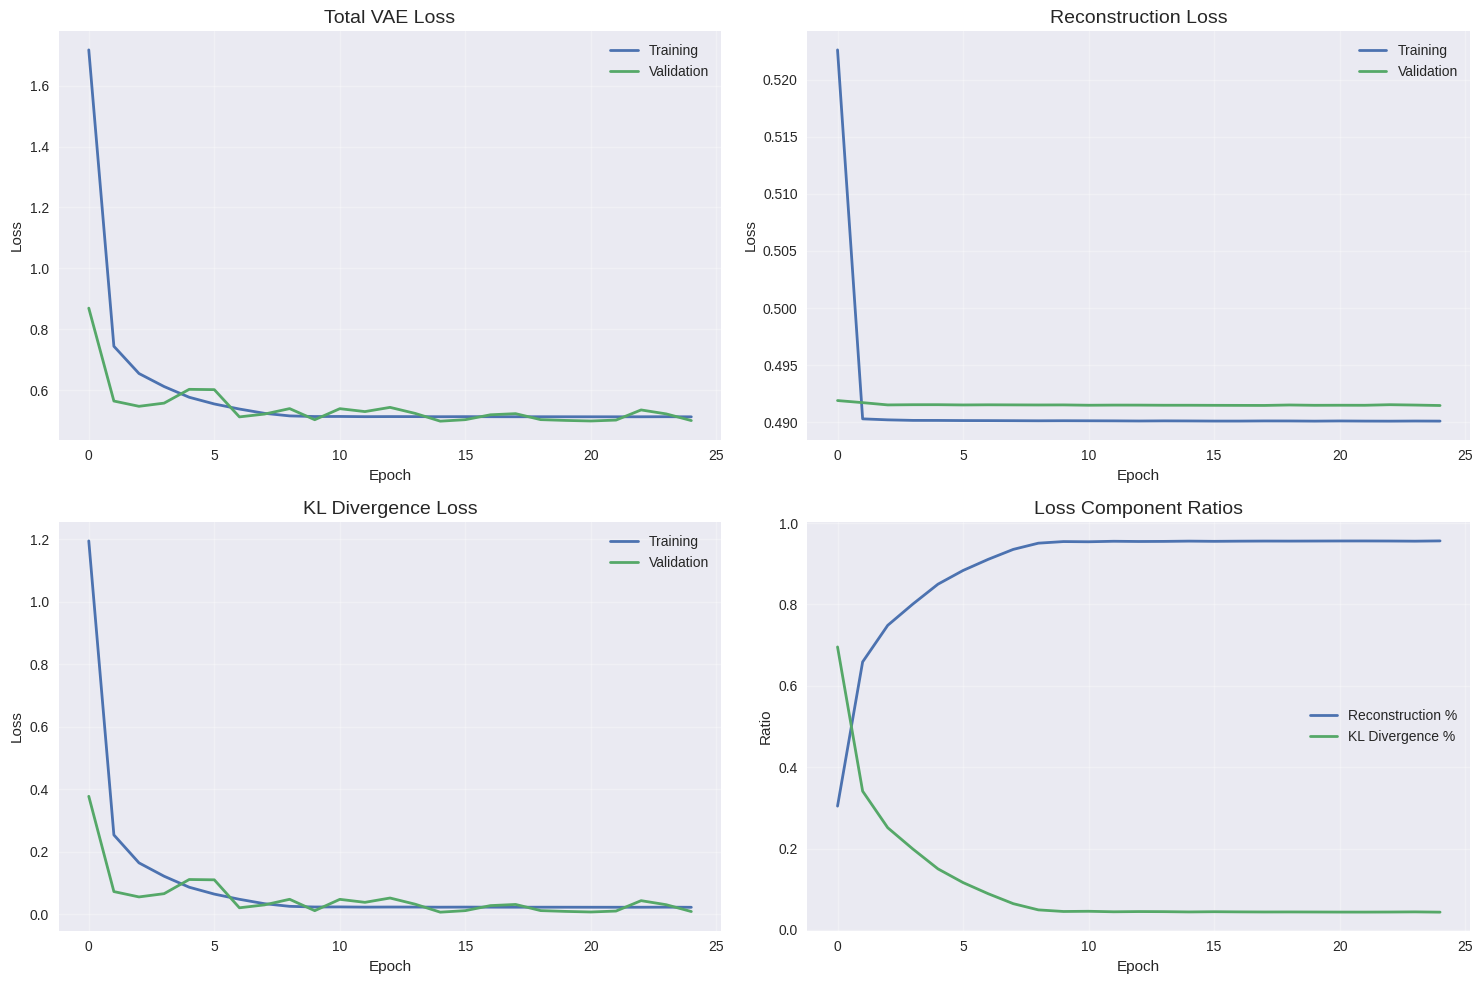

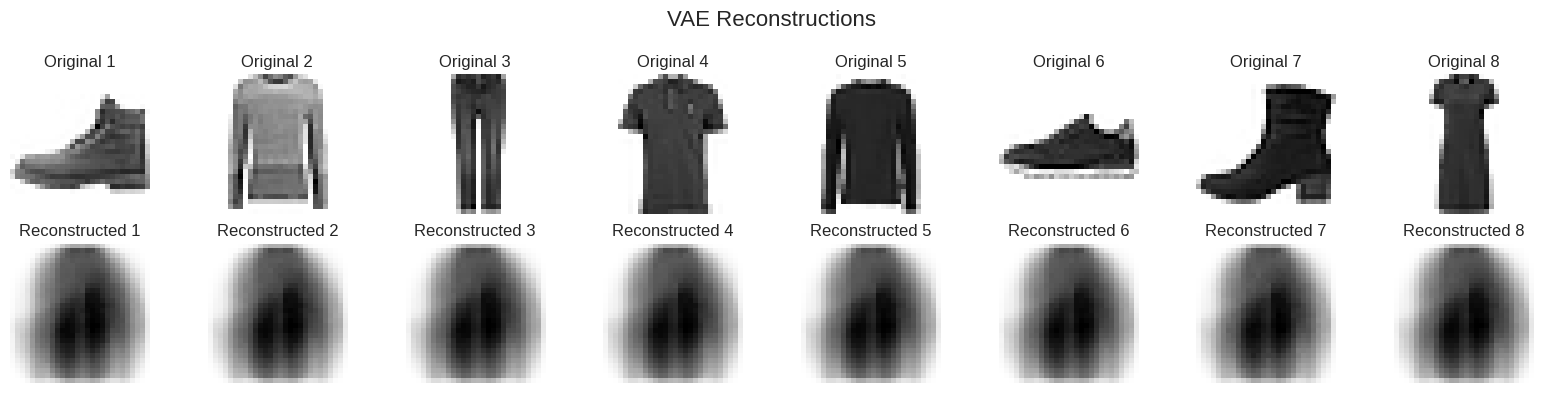

Mean Squared Error: 0.090834

=== Generating 12 Fashion Images ===


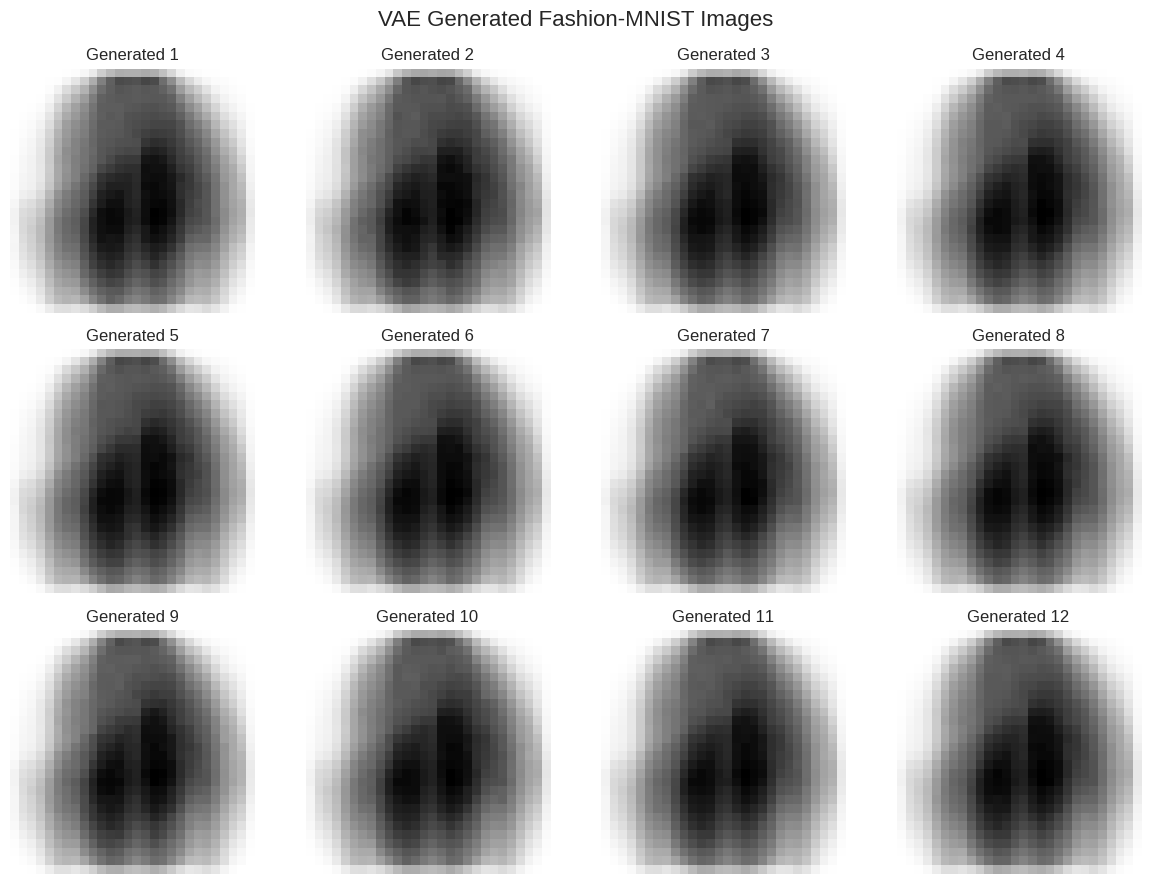


=== Semantic Interpolation Demonstration ===


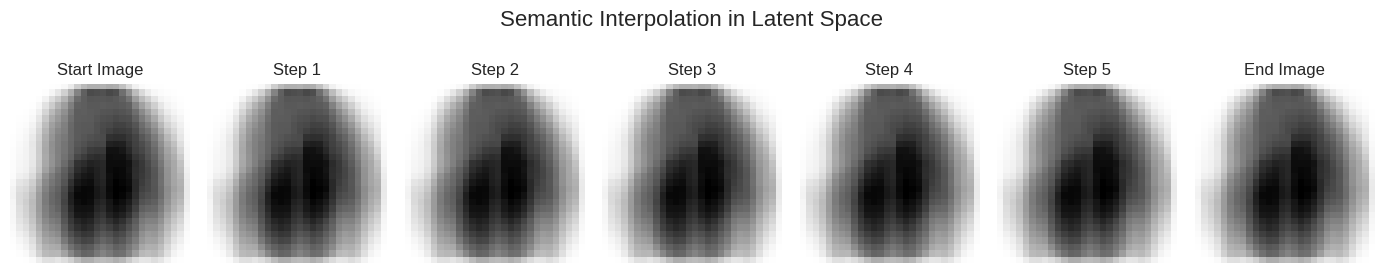

In [11]:
# Custom Sampling Layer for VAE
class Sampling(keras.layers.Layer):
    """
    Custom layer that implements the reparameterization trick for VAEs.

    Mathematical operation:
    z = μ + σ ⊙ ε, where ε ~ N(0, I)

    This allows gradients to flow through the stochastic sampling operation.
    """

    def call(self, inputs):
        """
        Performs reparameterized sampling.

        Args:
            inputs: [mean, log_var] where log_var = log(σ²)

        Returns:
            Sampled latent vector z
        """
        mean, log_var = inputs

        # Sample ε from standard normal distribution
        epsilon = tf.random.normal(shape=tf.shape(log_var), mean=0.0, stddev=1.0)

        # Reparameterization: z = μ + σ * ε = μ + exp(log_var/2) * ε
        return mean + tf.exp(log_var / 2) * epsilon

def create_variational_autoencoder(input_shape, latent_dim=10):
    """
    Creates a Variational Autoencoder following the mathematical framework.

    Args:
        input_shape: Shape of input data (height, width)
        latent_dim: Dimensionality of latent space

    Returns:
        encoder, decoder, vae models
    """

    # Input layer
    inputs = keras.layers.Input(shape=input_shape)

    # Encoder network
    x = keras.layers.Flatten()(inputs)
    x = keras.layers.Dense(150, activation="selu")(x)
    x = keras.layers.Dense(100, activation="selu")(x)

    # Latent space parameterization
    # The encoder outputs μ and log(σ²) instead of a deterministic coding
    z_mean = keras.layers.Dense(latent_dim, name="z_mean")(x)  # μ
    z_log_var = keras.layers.Dense(latent_dim, name="z_log_var")(x)  # log(σ²)

    # Sampling layer (reparameterization trick)
    z = Sampling()([z_mean, z_log_var])

    # Encoder model
    encoder = keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

    # Decoder network
    decoder_inputs = keras.layers.Input(shape=(latent_dim,))
    x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
    x = keras.layers.Dense(150, activation="selu")(x)
    x = keras.layers.Dense(np.prod(input_shape), activation="sigmoid")(x)
    decoder_outputs = keras.layers.Reshape(input_shape)(x)

    # Decoder model
    decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

    # Complete VAE
    # Get latent vector from encoder (ignore mean and log_var outputs)
    _, _, z_sample = encoder(inputs)
    reconstructed = decoder(z_sample)

    vae = keras.Model(inputs, reconstructed, name="vae")

    return encoder, decoder, vae

def vae_loss_function(y_true, y_pred, z_mean, z_log_var, beta=1.0):
    """
    Computes the VAE loss function combining reconstruction and KL divergence.

    Mathematical formulation:
    L = L_reconstruction + β * L_KL

    Args:
        y_true: True input images
        y_pred: Reconstructed images
        z_mean: Mean of latent distribution (μ)
        z_log_var: Log variance of latent distribution (log σ²)
        beta: Weight for KL divergence term (β-VAE)

    Returns:
        Total VAE loss
    """

    # Reconstruction loss (binary cross-entropy)
    reconstruction_loss = keras.losses.binary_crossentropy(y_true, y_pred)
    reconstruction_loss = tf.reduce_mean(reconstruction_loss)

    # KL divergence loss
    # KL(q(z|x) || p(z)) where p(z) = N(0, I) and q(z|x) = N(μ, σ²I)
    # Analytical solution: ½ Σ(1 + log σ² - μ² - σ²)
    kl_loss = -0.5 * tf.reduce_sum(
        1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
        axis=1
    )
    kl_loss = tf.reduce_mean(kl_loss)

    # Total loss
    total_loss = reconstruction_loss + beta * kl_loss

    return total_loss, reconstruction_loss, kl_loss

class VAE(keras.Model):
    """
    Complete VAE implementation as a custom Keras model.

    This implementation properly handles the custom loss function
    and provides clean interfaces for training and generation.
    """

    def __init__(self, encoder, decoder, beta=1.0, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = beta

        # Metrics for tracking
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        """Forward pass through the VAE."""
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return reconstruction

    def train_step(self, data):
        """Custom training step with VAE loss."""

        with tf.GradientTape() as tape:
            # Forward pass
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # Compute losses
            total_loss, reconstruction_loss, kl_loss = vae_loss_function(
                data, reconstruction, z_mean, z_log_var, self.beta
            )

        # Compute gradients and update weights
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        """Custom test step for validation."""

        # Forward pass
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)

        # Compute losses
        total_loss, reconstruction_loss, kl_loss = vae_loss_function(
            data, reconstruction, z_mean, z_log_var, self.beta
        )

        # Update metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

def train_variational_autoencoder():
    """
    Trains a Variational Autoencoder on Fashion-MNIST.

    This demonstrates the complete VAE training pipeline with proper
    loss computation and metric tracking.
    """

    print("\n=== Training Variational Autoencoder ===")

    # Create VAE components
    latent_dim = 10
    encoder, decoder, _ = create_variational_autoencoder(
        input_shape=(28, 28), latent_dim=latent_dim
    )

    print(f"\nEncoder Architecture:")
    encoder.summary()

    print(f"\nDecoder Architecture:")
    decoder.summary()

    # Create VAE model
    vae = VAE(encoder, decoder, beta=1.0)

    # Compile with optimizer (loss is handled internally)
    vae.compile(optimizer='rmsprop')

    # Train the VAE
    print("\nTraining VAE...")
    history = vae.fit(
        X_train,
        epochs=25,
        batch_size=128,
        validation_data=(X_valid,),
        verbose=1
    )

    return encoder, decoder, vae, history

def generate_fashion_images(decoder, n_images=12, latent_dim=10):
    """
    Generates new Fashion-MNIST images using the trained VAE decoder.

    This demonstrates the generative capability of VAEs by sampling
    from the learned latent space.
    """

    print(f"\n=== Generating {n_images} Fashion Images ===")

    # Sample from standard normal distribution (prior)
    random_latent_vectors = tf.random.normal(shape=(n_images, latent_dim))

    # Generate images
    generated_images = decoder(random_latent_vectors)

    # Visualize generated images
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    axes = axes.flatten()

    for i in range(n_images):
        axes[i].imshow(generated_images[i], cmap='binary')
        axes[i].set_title(f'Generated {i+1}')
        axes[i].axis('off')

    plt.suptitle('VAE Generated Fashion-MNIST Images', fontsize=16)
    plt.tight_layout()
    plt.show()

    return generated_images

def semantic_interpolation(encoder, decoder, images, n_steps=7):
    """
    Demonstrates semantic interpolation in the latent space.

    This shows how VAEs enable smooth transitions between different
    images by interpolating in the learned latent representation.
    """

    print("\n=== Semantic Interpolation Demonstration ===")

    # Encode two different images
    img1, img2 = images[0:1], images[1:2]  # Keep batch dimension

    # Get latent representations
    z1_mean, _, _ = encoder(img1)
    z2_mean, _, _ = encoder(img2)

    # Create interpolation weights
    weights = np.linspace(0, 1, n_steps)

    # Interpolate in latent space
    interpolated_latents = []
    for w in weights:
        z_interp = (1 - w) * z1_mean + w * z2_mean
        interpolated_latents.append(z_interp)

    # Stack latent vectors
    interpolated_latents = tf.concat(interpolated_latents, axis=0)

    # Decode interpolated latents
    interpolated_images = decoder(interpolated_latents)

    # Visualize interpolation
    fig, axes = plt.subplots(1, n_steps, figsize=(n_steps * 2, 3))

    for i in range(n_steps):
        axes[i].imshow(interpolated_images[i], cmap='binary')
        if i == 0:
            axes[i].set_title('Start Image')
        elif i == n_steps - 1:
            axes[i].set_title('End Image')
        else:
            axes[i].set_title(f'Step {i}')
        axes[i].axis('off')

    plt.suptitle('Semantic Interpolation in Latent Space', fontsize=16)
    plt.tight_layout()
    plt.show()

    return interpolated_images

def analyze_vae_training(history):
    """
    Analyzes and visualizes VAE training progress.

    Shows the evolution of total loss, reconstruction loss, and KL divergence.
    """

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Total loss
    axes[0, 0].plot(history.history['total_loss'], label='Training', linewidth=2)
    axes[0, 0].plot(history.history['val_total_loss'], label='Validation', linewidth=2)
    axes[0, 0].set_title('Total VAE Loss', fontsize=14)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Reconstruction loss
    axes[0, 1].plot(history.history['reconstruction_loss'], label='Training', linewidth=2)
    axes[0, 1].plot(history.history['val_reconstruction_loss'], label='Validation', linewidth=2)
    axes[0, 1].set_title('Reconstruction Loss', fontsize=14)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # KL divergence loss
    axes[1, 0].plot(history.history['kl_loss'], label='Training', linewidth=2)
    axes[1, 0].plot(history.history['val_kl_loss'], label='Validation', linewidth=2)
    axes[1, 0].set_title('KL Divergence Loss', fontsize=14)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Loss ratio analysis
    recon_ratio = np.array(history.history['reconstruction_loss']) / np.array(history.history['total_loss'])
    kl_ratio = np.array(history.history['kl_loss']) / np.array(history.history['total_loss'])

    axes[1, 1].plot(recon_ratio, label='Reconstruction %', linewidth=2)
    axes[1, 1].plot(kl_ratio, label='KL Divergence %', linewidth=2)
    axes[1, 1].set_title('Loss Component Ratios', fontsize=14)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Ratio')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Train VAE and demonstrate capabilities
encoder, decoder, vae, history = train_variational_autoencoder()

# Analyze training progress
analyze_vae_training(history)

# Show reconstructions
show_reconstructions(vae, X_valid, n_images=8, title_prefix="VAE ")

# Generate new images
generated_images = generate_fashion_images(decoder, n_images=12)

# Demonstrate semantic interpolation
sample_images = X_valid[:2]
interpolated = semantic_interpolation(encoder, decoder, sample_images)

## 10. Generative Adversarial Networks (GANs) {#gans}

### Theoretical Foundation

**GANs** consist of two neural networks competing in a zero-sum game:

1. **Generator ($G$)**: Creates fake data to fool the discriminator
2. **Discriminator ($D$)**: Distinguishes real data from fake data

### Mathematical Formulation

**Minimax Game:**
$$\min_G \max_D V(D, G) = \mathbb{E}_{\mathbf{x} \sim p_{data}(\mathbf{x})}[\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_z(\mathbf{z})}[\log(1 - D(G(\mathbf{z})))]$$

**Training Phases:**

**Phase 1 - Train Discriminator:**
- Objective: $\max_D \mathbb{E}_{\mathbf{x} \sim p_{data}}[\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_z}[\log(1 - D(G(\mathbf{z})))]$
- Generator weights frozen

**Phase 2 - Train Generator:**
- Objective: $\min_G \mathbb{E}_{\mathbf{z} \sim p_z}[\log(1 - D(G(\mathbf{z})))]$
- Equivalent to: $\max_G \mathbb{E}_{\mathbf{z} \sim p_z}[\log D(G(\mathbf{z}))]$
- Discriminator weights frozen

### Nash Equilibrium

**Optimal Solution:**
At equilibrium: $D^*(\mathbf{x}) = \frac{p_{data}(\mathbf{x})}{p_{data}(\mathbf{x}) + p_g(\mathbf{x})} = \frac{1}{2}$

This occurs when $p_g(\mathbf{x}) = p_{data}(\mathbf{x})$ (generator perfectly mimics data distribution).

### Training Challenges

1. **Mode Collapse**: Generator produces limited variety
2. **Training Instability**: Oscillating parameters
3. **Vanishing Gradients**: Poor generator updates
4. **Hyperparameter Sensitivity**: Requires careful tuning


=== Basic GAN Demonstration ===

Generator Architecture:


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 784)            │       118,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,634 (561.07 KB)

 Trainable params: 143,634 (561.07 KB)

 Non-trainable params: 0 (0.00 B)


Discriminator Architecture:


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,951 (519.34 KB)

 Trainable params: 132,951 (519.34 KB)

 Non-trainable params: 0 (0.00 B)


Images before training:


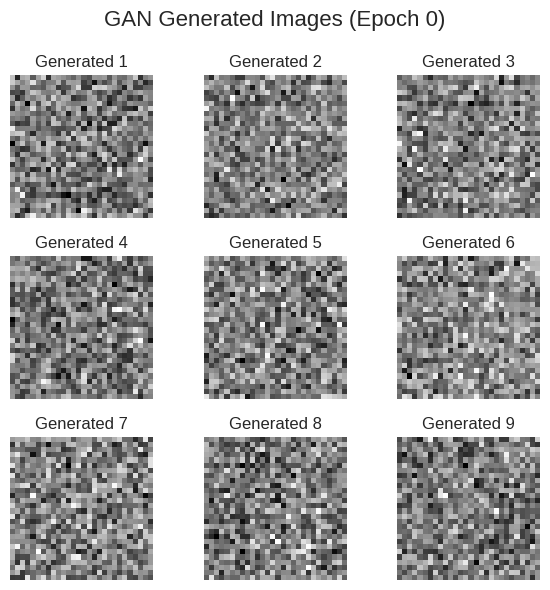


=== Training GAN for 30 epochs ===
Epoch 1/30 - D_loss: 0.4293, G_loss: 3.9960
Epoch 11/30 - D_loss: 0.5102, G_loss: 1.3214
Epoch 21/30 - D_loss: 0.5126, G_loss: 1.2545
Epoch 30/30 - D_loss: 0.5122, G_loss: 1.2334

Images after training:


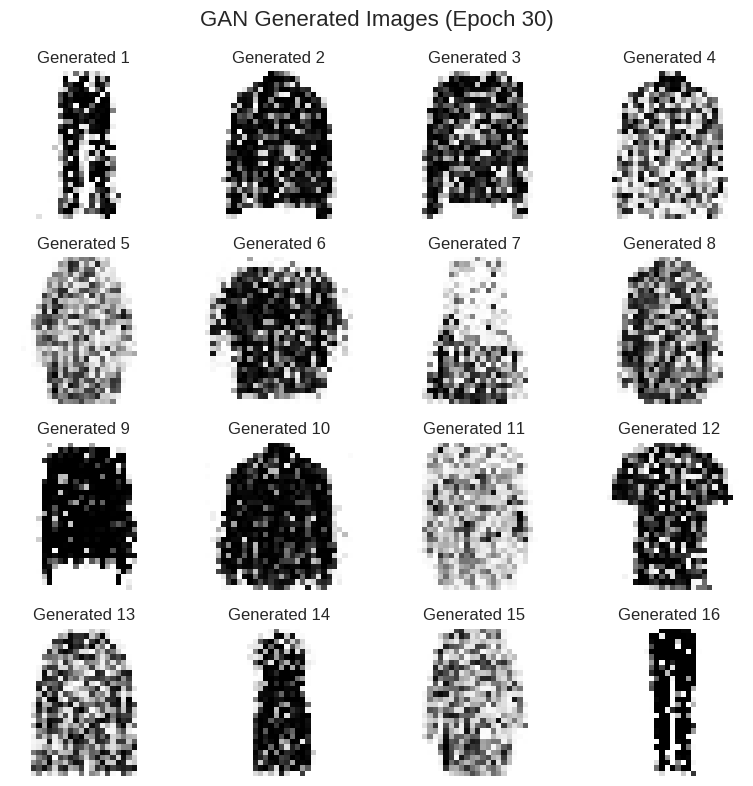

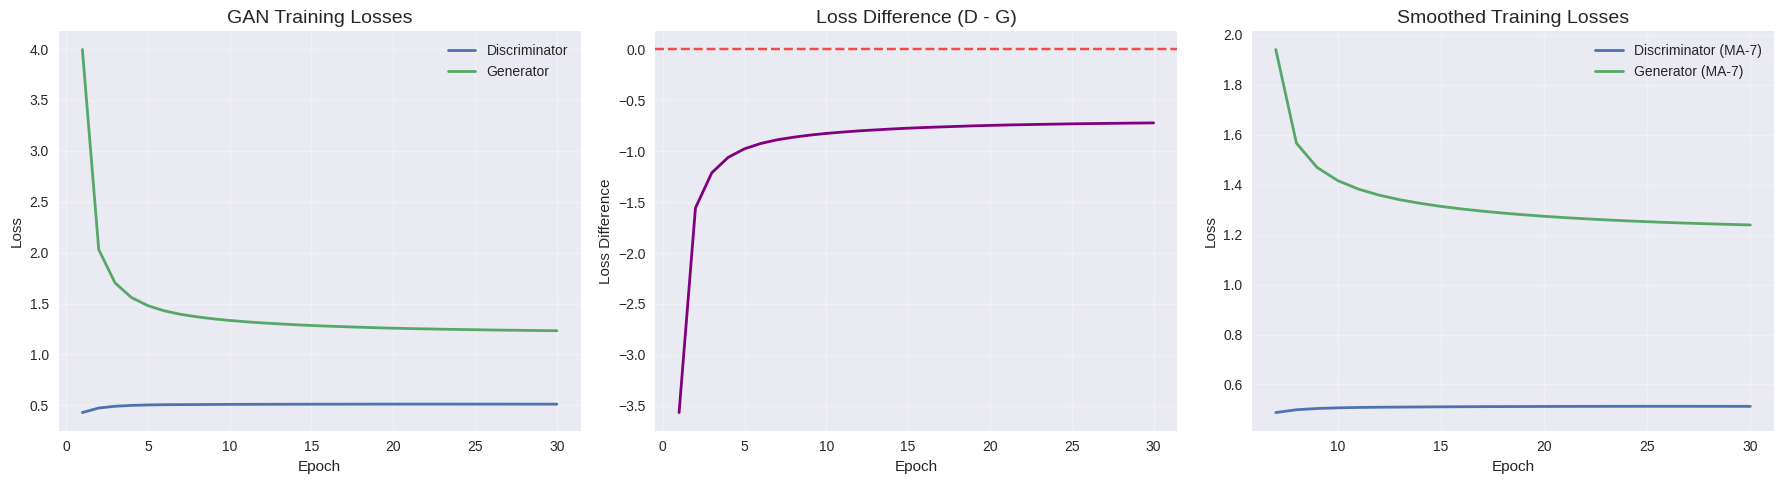


=== GAN Training Analysis ===
Final Discriminator Loss: 0.5122
Final Generator Loss: 1.2334
Average Loss Difference: -0.9247
Loss Difference Std: 0.5202
Training shows instability - consider adjusting hyperparameters.


In [12]:
def create_generator(latent_dim=100, output_shape=(28, 28)):
    """
    Creates the generator network for GAN.

    The generator maps random noise z to fake images.

    Mathematical function: G: R^latent_dim -> R^(28×28)

    Args:
        latent_dim: Dimensionality of input noise vector
        output_shape: Shape of generated images

    Returns:
        Generator model
    """

    generator = keras.models.Sequential([
        # Project noise to higher dimension
        keras.layers.Dense(100, activation="selu", input_shape=[latent_dim]),

        # Expand representation
        keras.layers.Dense(150, activation="selu"),

        # Output layer with sigmoid activation (pixel values in [0,1])
        keras.layers.Dense(np.prod(output_shape), activation="sigmoid"),

        # Reshape to image format
        keras.layers.Reshape(output_shape)
    ], name="generator")

    return generator

def create_discriminator(input_shape=(28, 28)):
    """
    Creates the discriminator network for GAN.

    The discriminator classifies images as real (1) or fake (0).

    Mathematical function: D: R^(28×28) -> [0,1]

    Args:
        input_shape: Shape of input images

    Returns:
        Discriminator model
    """

    discriminator = keras.models.Sequential([
        # Flatten input images
        keras.layers.Flatten(input_shape=input_shape),

        # Hidden layers with decreasing size
        keras.layers.Dense(150, activation="selu"),
        keras.layers.Dense(100, activation="selu"),

        # Binary classification output
        keras.layers.Dense(1, activation="sigmoid")
    ], name="discriminator")

    return discriminator

def create_gan(generator, discriminator):
    """
    Creates the complete GAN by combining generator and discriminator.

    Used for training the generator (discriminator weights are frozen).

    Args:
        generator: Generator model
        discriminator: Discriminator model

    Returns:
        Complete GAN model
    """

    # Combine generator and discriminator
    gan = keras.models.Sequential([
        generator,
        discriminator
    ], name="gan")

    return gan

def prepare_gan_training_data(X_train, batch_size=32):
    """
    Prepares training data for GAN using tf.data.Dataset.

    Args:
        X_train: Training images
        batch_size: Batch size for training

    Returns:
        TensorFlow Dataset
    """

    dataset = tf.data.Dataset.from_tensor_slices(X_train)
    dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

def train_gan_step(generator, discriminator, gan, real_batch, latent_dim, batch_size):
    """
    Performs one training step of the GAN.

    This implements the two-phase training described in the chapter:
    1. Train discriminator on real and fake data
    2. Train generator to fool discriminator

    Args:
        generator: Generator model
        discriminator: Discriminator model
        gan: Combined GAN model
        real_batch: Batch of real images
        latent_dim: Dimensionality of noise vector
        batch_size: Size of training batch

    Returns:
        Dictionary with training losses
    """

    # Phase 1: Train Discriminator
    # Generate fake images
    noise = tf.random.normal([batch_size, latent_dim])
    fake_images = generator(noise, training=False)  # Don't update generator

    # Combine real and fake images with labels
    # Real images labeled as 1, fake images labeled as 0
    combined_images = tf.concat([fake_images, real_batch], axis=0)
    labels = tf.concat([
        tf.zeros((batch_size, 1)),  # Fake = 0
        tf.ones((batch_size, 1))    # Real = 1
    ], axis=0)

    # Train discriminator
    discriminator.trainable = True
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # Phase 2: Train Generator
    # Generate new noise
    noise = tf.random.normal([batch_size, latent_dim])

    # Labels for generator training (want discriminator to classify as real)
    misleading_labels = tf.ones((batch_size, 1))  # All labeled as real

    # Train generator (discriminator weights frozen)
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, misleading_labels)

    return {
        'discriminator_loss': d_loss,
        'generator_loss': g_loss
    }

def train_gan(generator, discriminator, gan, dataset, latent_dim, epochs=50):
    """
    Complete GAN training loop.

    This implements the adversarial training process where generator
    and discriminator are trained alternately.

    Args:
        generator: Generator model
        discriminator: Discriminator model
        gan: Combined GAN model
        dataset: Training dataset
        latent_dim: Dimensionality of noise vector
        epochs: Number of training epochs

    Returns:
        Training history
    """

    print(f"\n=== Training GAN for {epochs} epochs ===")

    # Initialize history tracking
    history = {
        'discriminator_loss': [],
        'generator_loss': []
    }

    # Get batch size from dataset
    for batch in dataset.take(1):
        batch_size = batch.shape[0]
        break

    # Training loop
    for epoch in range(epochs):
        epoch_d_losses = []
        epoch_g_losses = []

        # Process all batches in epoch
        for batch_idx, real_batch in enumerate(dataset):
            # Perform one training step
            losses = train_gan_step(
                generator, discriminator, gan,
                real_batch, latent_dim, batch_size
            )

            epoch_d_losses.append(losses['discriminator_loss'])
            epoch_g_losses.append(losses['generator_loss'])

        # Record epoch averages
        avg_d_loss = np.mean(epoch_d_losses)
        avg_g_loss = np.mean(epoch_g_losses)

        history['discriminator_loss'].append(avg_d_loss)
        history['generator_loss'].append(avg_g_loss)

        # Print progress
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1}/{epochs} - D_loss: {avg_d_loss:.4f}, G_loss: {avg_g_loss:.4f}")

    return history

def generate_and_display_images(generator, latent_dim, n_images=16, epoch=None):
    """
    Generates and displays images using the trained generator.

    Args:
        generator: Trained generator model
        latent_dim: Dimensionality of noise vector
        n_images: Number of images to generate
        epoch: Optional epoch number for title
    """

    # Generate random noise
    noise = tf.random.normal([n_images, latent_dim])

    # Generate images
    generated_images = generator(noise, training=False)

    # Display images
    rows = int(np.sqrt(n_images))
    cols = int(np.ceil(n_images / rows))

    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = axes.flatten() if n_images > 1 else [axes]

    for i in range(n_images):
        axes[i].imshow(generated_images[i], cmap='binary')
        axes[i].set_title(f'Generated {i+1}')
        axes[i].axis('off')

    # Hide extra subplots
    for i in range(n_images, len(axes)):
        axes[i].axis('off')

    title = f"GAN Generated Images"
    if epoch is not None:
        title += f" (Epoch {epoch})"

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

    return generated_images

def analyze_gan_training(history):
    """
    Analyzes and visualizes GAN training dynamics.

    Shows the adversarial training process and loss dynamics.
    """

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    epochs = range(1, len(history['discriminator_loss']) + 1)

    # Individual losses
    axes[0].plot(epochs, history['discriminator_loss'], label='Discriminator', linewidth=2)
    axes[0].plot(epochs, history['generator_loss'], label='Generator', linewidth=2)
    axes[0].set_title('GAN Training Losses', fontsize=14)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss difference (indicator of training balance)
    loss_diff = np.array(history['discriminator_loss']) - np.array(history['generator_loss'])
    axes[1].plot(epochs, loss_diff, color='purple', linewidth=2)
    axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
    axes[1].set_title('Loss Difference (D - G)', fontsize=14)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss Difference')
    axes[1].grid(True, alpha=0.3)

    # Moving averages for stability analysis
    window = min(10, len(history['discriminator_loss']) // 4)
    if window > 1:
        d_ma = np.convolve(history['discriminator_loss'], np.ones(window)/window, mode='valid')
        g_ma = np.convolve(history['generator_loss'], np.ones(window)/window, mode='valid')
        ma_epochs = range(window, len(history['discriminator_loss']) + 1)

        axes[2].plot(ma_epochs, d_ma, label=f'Discriminator (MA-{window})', linewidth=2)
        axes[2].plot(ma_epochs, g_ma, label=f'Generator (MA-{window})', linewidth=2)
    else:
        axes[2].plot(epochs, history['discriminator_loss'], label='Discriminator', linewidth=2)
        axes[2].plot(epochs, history['generator_loss'], label='Generator', linewidth=2)

    axes[2].set_title('Smoothed Training Losses', fontsize=14)
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Loss')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print analysis
    print("\n=== GAN Training Analysis ===")
    print(f"Final Discriminator Loss: {history['discriminator_loss'][-1]:.4f}")
    print(f"Final Generator Loss: {history['generator_loss'][-1]:.4f}")
    print(f"Average Loss Difference: {np.mean(loss_diff):.4f}")
    print(f"Loss Difference Std: {np.std(loss_diff):.4f}")

    # Training stability indicators
    if np.std(loss_diff) < 0.5:
        print("Training appears relatively stable.")
    else:
        print("Training shows instability - consider adjusting hyperparameters.")

def demonstrate_basic_gan():
    """
    Demonstrates basic GAN training on Fashion-MNIST.

    This shows the complete GAN pipeline from model creation to training
    and generation, illustrating the concepts discussed in the chapter.
    """

    print("\n=== Basic GAN Demonstration ===")

    # Hyperparameters
    latent_dim = 100
    batch_size = 128
    epochs = 30

    # Create models
    generator = create_generator(latent_dim=latent_dim)
    discriminator = create_discriminator()
    gan = create_gan(generator, discriminator)

    print("\nGenerator Architecture:")
    generator.summary()

    print("\nDiscriminator Architecture:")
    discriminator.summary()

    # Compile models
    discriminator.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.RMSprop(learning_rate=0.0008)
    )

    # Important: Set discriminator as non-trainable before compiling GAN
    discriminator.trainable = False
    gan.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.RMSprop(learning_rate=0.0008)
    )

    # Prepare training data
    dataset = prepare_gan_training_data(X_train, batch_size)

    # Show initial generated images (before training)
    print("\nImages before training:")
    generate_and_display_images(generator, latent_dim, n_images=9, epoch=0)

    # Train GAN
    history = train_gan(generator, discriminator, gan, dataset, latent_dim, epochs)

    # Show final generated images
    print("\nImages after training:")
    final_images = generate_and_display_images(generator, latent_dim, n_images=16, epoch=epochs)

    # Analyze training
    analyze_gan_training(history)

    return generator, discriminator, gan, history

# Train and demonstrate basic GAN
generator, discriminator, gan, gan_history = demonstrate_basic_gan()

## 11. Advanced GAN Architectures {#advanced-gans}

### Deep Convolutional GANs (DCGANs)

**DCGAN Guidelines** (Radford et al., 2015):

1. **Replace pooling with strided convolutions**
2. **Use Batch Normalization** (except generator output and discriminator input)
3. **Remove fully connected layers** for deeper architectures
4. **Generator activations**: ReLU (hidden) + Tanh (output)
5. **Discriminator activations**: LeakyReLU (all layers)

**Mathematical Improvements:**
- **Spatial coherence**: Convolutional structure preserves spatial relationships
- **Parameter efficiency**: Shared weights reduce overfitting
- **Progressive upsampling**: Strided transpose convolutions

### Training Difficulties and Solutions

**Common Problems:**
1. **Mode Collapse**: $p_g(\mathbf{x}) \rightarrow \delta(\mathbf{x} - \mathbf{x}_0)$
2. **Vanishing Gradients**: $\nabla_\theta \mathbb{E}_{\mathbf{z}}[\log(1-D(G(\mathbf{z})))] \rightarrow 0$
3. **Non-convergence**: Oscillatory dynamics

**Solutions:**
- **Experience Replay**: Store generated samples
- **Mini-batch Discrimination**: Encourage diversity
- **Feature Matching**: Match intermediate features
- **Label Smoothing**: Use soft labels (0.9 instead of 1.0)

Training DCGAN with Experience Replay and Label Smoothing...

=== Training DCGAN with Improvements ===
Experience Replay: True
Label Smoothing: 0.1
Epoch 1/30:
  D_loss: 0.4540
  G_loss: 0.3037
  D_acc: 0.9526


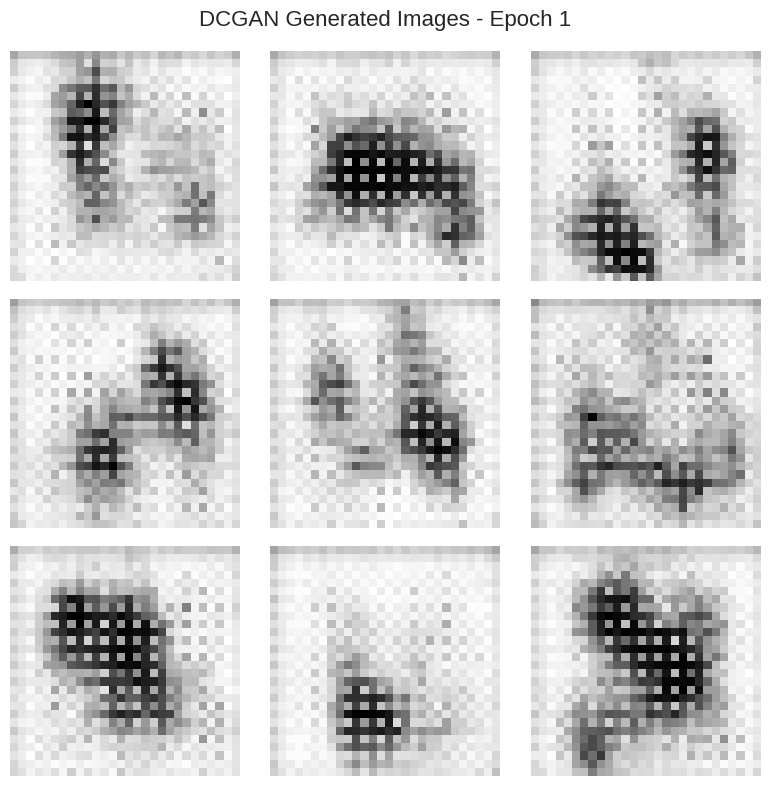

Epoch 11/30:
  D_loss: 0.6071
  G_loss: 0.7380
  D_acc: 0.7401
Epoch 21/30:
  D_loss: 0.6390
  G_loss: 0.7676
  D_acc: 0.7176


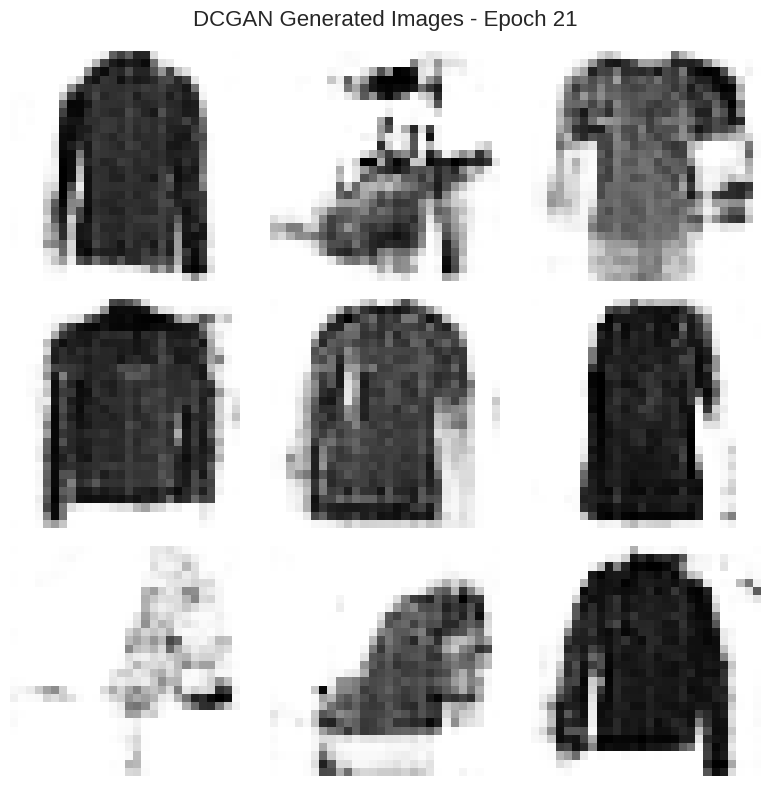

Epoch 30/30:
  D_loss: 0.6491
  G_loss: 0.7707
  D_acc: 0.7192


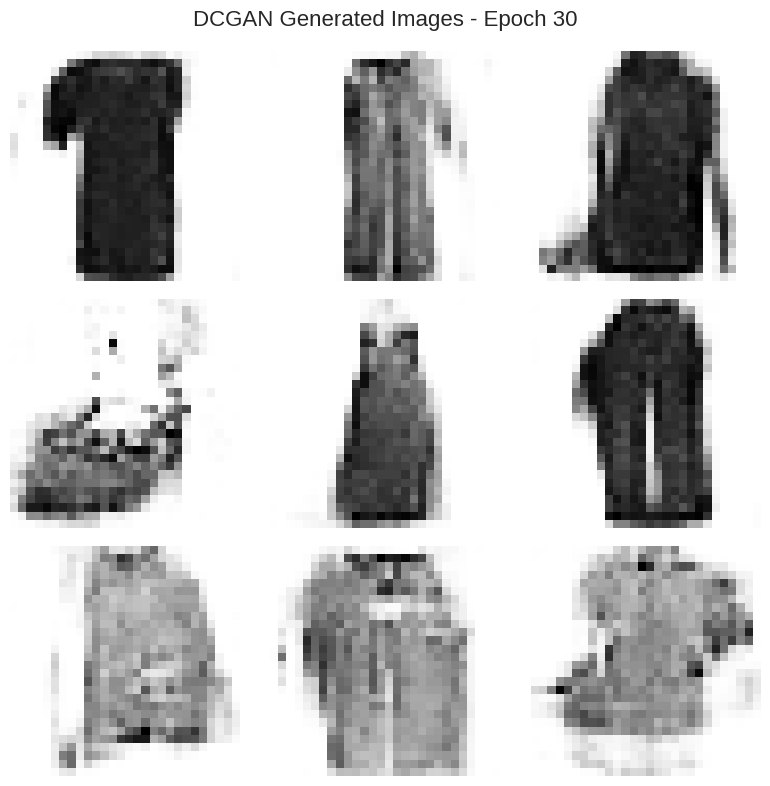

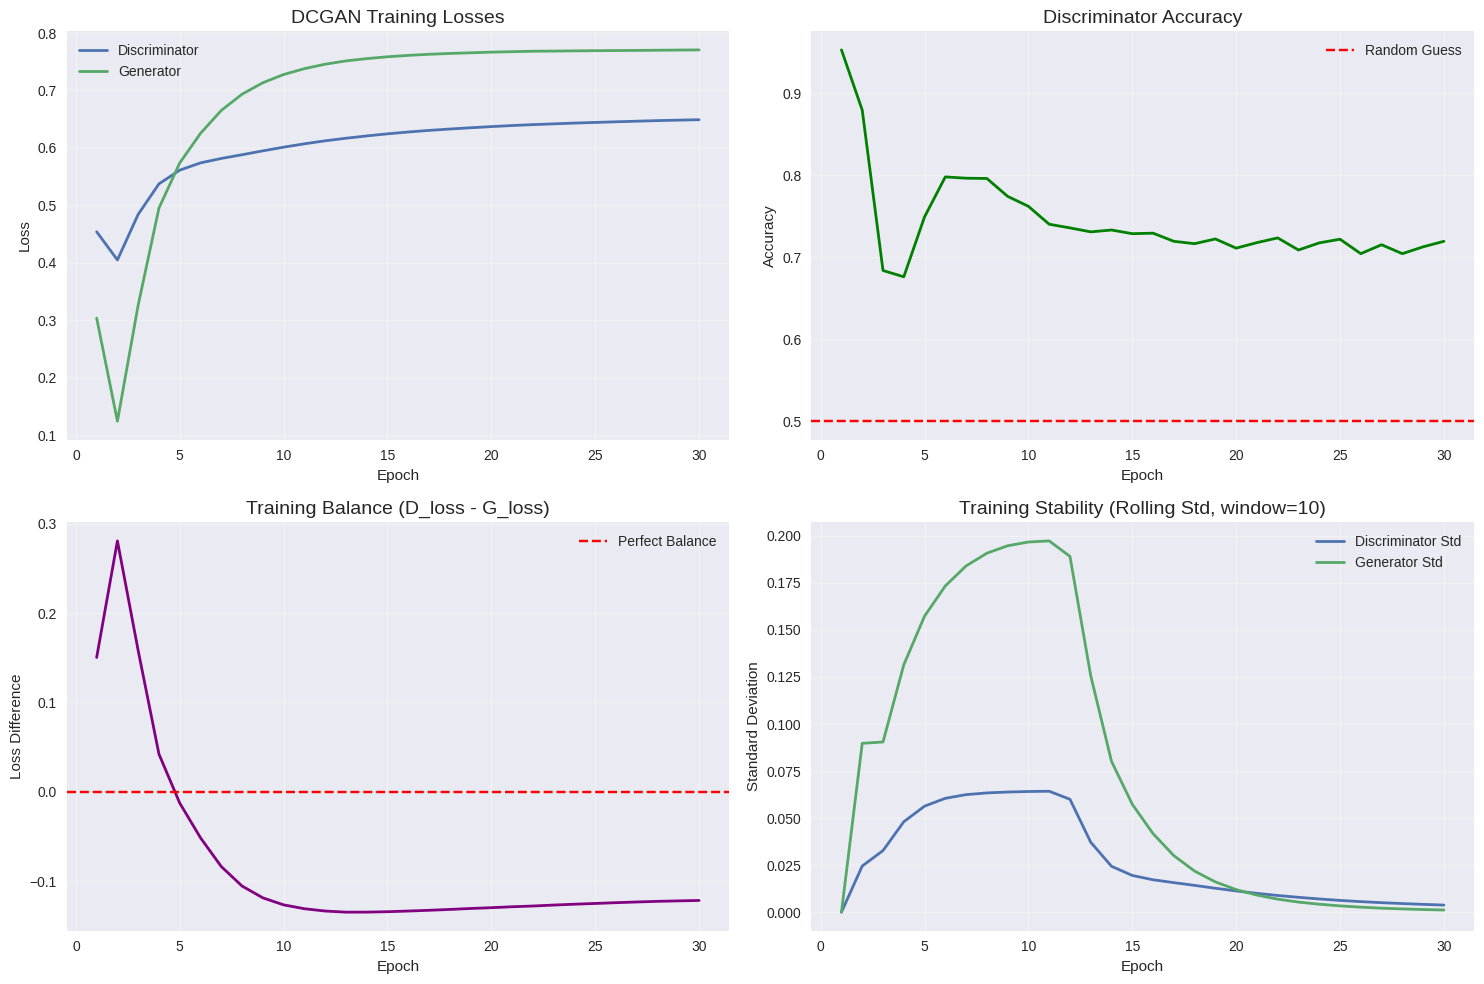


=== DCGAN Training Analysis ===
Final Discriminator Loss: 0.6491
Final Generator Loss: 0.7707
Final Discriminator Accuracy: 0.7192
Average Training Balance: -0.0813
Training Stability (balance std): 0.1020


In [13]:
def create_dcgan_generator(latent_dim=100, output_shape=(28, 28, 1)):
    """
    Creates a DCGAN generator following the architectural guidelines.

    Architecture: Dense -> Reshape -> [ConvTranspose + BatchNorm + ReLU]*n -> ConvTranspose + Tanh

    Args:
        latent_dim: Dimensionality of input noise
        output_shape: Shape of output images

    Returns:
        DCGAN generator model
    """

    model = keras.models.Sequential([
        # Project to 7x7x128 feature maps
        keras.layers.Dense(7 * 7 * 128, input_shape=[latent_dim]),
        keras.layers.Reshape([7, 7, 128]),
        keras.layers.BatchNormalization(),

        # Upsample to 14x14x64
        keras.layers.Conv2DTranspose(
            64, kernel_size=5, strides=2, padding="same", activation="relu"
        ),
        keras.layers.BatchNormalization(),

        # Upsample to 28x28x1 with tanh activation
        keras.layers.Conv2DTranspose(
            1, kernel_size=5, strides=2, padding="same", activation="tanh"
        )
    ], name="dcgan_generator")

    return model

def create_dcgan_discriminator(input_shape=(28, 28, 1)):
    """
    Creates a DCGAN discriminator following the architectural guidelines.

    Architecture: [Conv + LeakyReLU + Dropout]*n -> Flatten -> Dense + Sigmoid

    Args:
        input_shape: Shape of input images

    Returns:
        DCGAN discriminator model
    """

    model = keras.models.Sequential([
        # Downsample to 14x14x64
        keras.layers.Conv2D(
            64, kernel_size=5, strides=2, padding="same",
            activation=keras.layers.LeakyReLU(0.2),
            input_shape=input_shape
        ),
        keras.layers.Dropout(0.3),

        # Downsample to 7x7x128
        keras.layers.Conv2D(
            128, kernel_size=5, strides=2, padding="same",
            activation=keras.layers.LeakyReLU(0.2)
        ),
        keras.layers.Dropout(0.3),

        # Classification layer
        keras.layers.Flatten(),
        keras.layers.Dense(1, activation="sigmoid")
    ], name="dcgan_discriminator")

    return model

class ExperienceReplay:
    """
    Implements experience replay for GAN training stability.

    Stores previously generated images and uses them during discriminator
    training to prevent overfitting to current generator outputs.
    """

    def __init__(self, buffer_size=1000):
        self.buffer_size = buffer_size
        self.buffer = []
        self.pointer = 0

    def add_samples(self, samples):
        """
        Adds new samples to the replay buffer.

        Args:
            samples: New generated samples to add
        """
        for sample in samples:
            if len(self.buffer) < self.buffer_size:
                self.buffer.append(sample)
            else:
                # Replace old samples in circular fashion
                self.buffer[self.pointer] = sample
                self.pointer = (self.pointer + 1) % self.buffer_size

    def sample_batch(self, batch_size):
        """
        Samples a batch from the replay buffer.

        Args:
            batch_size: Number of samples to return

        Returns:
            Batch of samples from buffer
        """
        if len(self.buffer) < batch_size:
            return np.array(self.buffer)

        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        return np.array([self.buffer[i] for i in indices])

def train_dcgan_with_improvements(X_train, epochs=50, batch_size=128,
                                 use_experience_replay=True, label_smoothing=0.1):
    """
    Trains DCGAN with various improvements for stability.

    Improvements implemented:
    1. Experience replay
    2. Label smoothing
    3. DCGAN architecture
    4. Balanced training

    Args:
        X_train: Training data
        epochs: Number of training epochs
        batch_size: Batch size
        use_experience_replay: Whether to use experience replay
        label_smoothing: Amount of label smoothing (0 = no smoothing)

    Returns:
        Trained models and history
    """

    print(f"\n=== Training DCGAN with Improvements ===")
    print(f"Experience Replay: {use_experience_replay}")
    print(f"Label Smoothing: {label_smoothing}")

    # Prepare data (scale to [-1, 1] for tanh output)
    X_train_scaled = X_train.reshape(-1, 28, 28, 1) * 2.0 - 1.0

    # Create models
    latent_dim = 100
    generator = create_dcgan_generator(latent_dim)
    discriminator = create_dcgan_discriminator()

    # Create GAN
    discriminator.trainable = False
    gan = keras.models.Sequential([generator, discriminator])

    # Compile models
    discriminator.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    )

    gan.compile(
        loss='binary_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    )

    # Initialize experience replay
    if use_experience_replay:
        replay_buffer = ExperienceReplay(buffer_size=batch_size * 10)

    # Training history
    history = {
        'discriminator_loss': [],
        'generator_loss': [],
        'discriminator_accuracy': []
    }

    # Training loop
    dataset = prepare_gan_training_data(X_train_scaled, batch_size)

    for epoch in range(epochs):
        epoch_d_losses = []
        epoch_g_losses = []
        epoch_d_accs = []

        for real_batch in dataset:
            current_batch_size = real_batch.shape[0]

            # === Train Discriminator ===

            # Generate fake images
            noise = tf.random.normal([current_batch_size, latent_dim])
            fake_images = generator(noise, training=False)

            # Use experience replay
            if use_experience_replay and len(replay_buffer.buffer) > 0:
                # Mix current and replayed fake images
                replay_samples = replay_buffer.sample_batch(current_batch_size // 2)
                if len(replay_samples) > 0:
                    mixed_fake = tf.concat([fake_images[:current_batch_size//2],
                                          replay_samples], axis=0)
                else:
                    mixed_fake = fake_images
            else:
                mixed_fake = fake_images

            # Add to replay buffer
            if use_experience_replay:
                replay_buffer.add_samples(fake_images.numpy())

            # Prepare labels with smoothing
            real_labels = np.ones((current_batch_size, 1)) - label_smoothing
            fake_labels = np.zeros((mixed_fake.shape[0], 1)) + label_smoothing

            # Train on real images
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(real_batch, real_labels)

            # Train on fake images
            d_loss_fake = discriminator.train_on_batch(mixed_fake, fake_labels)

            # Average discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2

            # === Train Generator ===

            noise = tf.random.normal([current_batch_size, latent_dim])
            misleading_labels = np.ones((current_batch_size, 1))  # Want to fool discriminator

            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, misleading_labels)

            # Record losses
            epoch_d_losses.append(d_loss)
            epoch_g_losses.append(g_loss)

            # Calculate discriminator accuracy
            real_pred = discriminator.predict(real_batch[:10], verbose=0)
            fake_pred = discriminator.predict(mixed_fake[:10], verbose=0)
            real_acc = np.mean(real_pred > 0.5)
            fake_acc = np.mean(fake_pred < 0.5)
            d_acc = (real_acc + fake_acc) / 2
            epoch_d_accs.append(d_acc)

        # Record epoch metrics
        history['discriminator_loss'].append(np.mean(epoch_d_losses))
        history['generator_loss'].append(np.mean(epoch_g_losses))
        history['discriminator_accuracy'].append(np.mean(epoch_d_accs))

        # Print progress
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1}/{epochs}:")
            print(f"  D_loss: {history['discriminator_loss'][-1]:.4f}")
            print(f"  G_loss: {history['generator_loss'][-1]:.4f}")
            print(f"  D_acc: {history['discriminator_accuracy'][-1]:.4f}")

        # Show generated images periodically
        if epoch % 20 == 0 or epoch == epochs - 1:
            # Generate images (scale back to [0,1])
            noise = tf.random.normal([9, latent_dim])
            generated = generator(noise, training=False)
            generated = (generated + 1) / 2  # Scale from [-1,1] to [0,1]

            # Display
            fig, axes = plt.subplots(3, 3, figsize=(8, 8))
            for i, ax in enumerate(axes.flatten()):
                ax.imshow(generated[i, :, :, 0], cmap='binary')
                ax.axis('off')
            plt.suptitle(f'DCGAN Generated Images - Epoch {epoch+1}', fontsize=16)
            plt.tight_layout()
            plt.show()

    return generator, discriminator, gan, history

def analyze_dcgan_improvements(history):
    """
    Analyzes the effectiveness of DCGAN improvements.
    """

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    epochs = range(1, len(history['discriminator_loss']) + 1)

    # Loss curves
    axes[0, 0].plot(epochs, history['discriminator_loss'], label='Discriminator', linewidth=2)
    axes[0, 0].plot(epochs, history['generator_loss'], label='Generator', linewidth=2)
    axes[0, 0].set_title('DCGAN Training Losses', fontsize=14)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Discriminator accuracy
    axes[0, 1].plot(epochs, history['discriminator_accuracy'], color='green', linewidth=2)
    axes[0, 1].axhline(y=0.5, color='red', linestyle='--', label='Random Guess')
    axes[0, 1].set_title('Discriminator Accuracy', fontsize=14)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Training balance (ideal around 0)
    balance = np.array(history['discriminator_loss']) - np.array(history['generator_loss'])
    axes[1, 0].plot(epochs, balance, color='purple', linewidth=2)
    axes[1, 0].axhline(y=0, color='red', linestyle='--', label='Perfect Balance')
    axes[1, 0].set_title('Training Balance (D_loss - G_loss)', fontsize=14)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Loss Difference')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Stability analysis (rolling standard deviation)
    window = 10
    if len(epochs) > window:
        rolling_std_d = [np.std(history['discriminator_loss'][max(0, i-window):i+1])
                        for i in range(len(history['discriminator_loss']))]
        rolling_std_g = [np.std(history['generator_loss'][max(0, i-window):i+1])
                        for i in range(len(history['generator_loss']))]

        axes[1, 1].plot(epochs, rolling_std_d, label='Discriminator Std', linewidth=2)
        axes[1, 1].plot(epochs, rolling_std_g, label='Generator Std', linewidth=2)
        axes[1, 1].set_title(f'Training Stability (Rolling Std, window={window})', fontsize=14)
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Standard Deviation')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print final statistics
    print("\n=== DCGAN Training Analysis ===")
    print(f"Final Discriminator Loss: {history['discriminator_loss'][-1]:.4f}")
    print(f"Final Generator Loss: {history['generator_loss'][-1]:.4f}")
    print(f"Final Discriminator Accuracy: {history['discriminator_accuracy'][-1]:.4f}")
    print(f"Average Training Balance: {np.mean(balance):.4f}")
    print(f"Training Stability (balance std): {np.std(balance):.4f}")

# Train DCGAN with improvements
print("Training DCGAN with Experience Replay and Label Smoothing...")
dcgan_gen, dcgan_disc, dcgan_gan, dcgan_history = train_dcgan_with_improvements(
    X_train[:10000],  # Use subset for demonstration
    epochs=30,
    batch_size=64,
    use_experience_replay=True,
    label_smoothing=0.1
)

# Analyze improvements
analyze_dcgan_improvements(dcgan_history)

## 12. Mathematical Foundations Summary {#mathematical-foundations}

### Information Theory and Autoencoders

**Mutual Information:**
$$I(X; Z) = H(X) - H(X|Z) = \sum_{x,z} p(x,z) \log \frac{p(x,z)}{p(x)p(z)}$$

**Rate-Distortion Theory:**
$$R(D) = \min_{p(\hat{x}|x): \mathbb{E}[d(x,\hat{x})] \leq D} I(X; \hat{X})$$

### Variational Inference

**Jensen's Inequality Application:**
$$\log p(x) \geq \mathbb{E}_{q(z|x)}[\log p(x|z)] - D_{KL}(q(z|x) \| p(z))$$

**Reparameterization Trick:**
$$\nabla_\phi \mathbb{E}_{q_\phi(z|x)}[f(z)] = \mathbb{E}_{p(\epsilon)}[\nabla_\phi f(g_\phi(\epsilon, x))]$$

### Game Theory and GANs

**Nash Equilibrium Conditions:**
For optimal discriminator: $D^*(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$

**Global Optimum:**
When $p_g = p_{data}$: $D^*(x) = \frac{1}{2}$ and $V(G, D^*) = -\log(4)$

### Optimization Theory

**Gradient Penalty (WGAN-GP):**
$$\mathcal{L} = \mathbb{E}[D(\tilde{x})] - \mathbb{E}[D(x)] + \lambda \mathbb{E}[(\|\nabla_{\hat{x}} D(\hat{x})\|_2 - 1)^2]$$

**Spectral Normalization:**
$$W_{SN} = \frac{W}{\sigma(W)}$$ where $\sigma(W)$ is the spectral norm (largest singular value)

### Probability Theory Foundations

**Kullback-Leibler Divergence Properties:**
1. **Non-negativity**: $D_{KL}(P \| Q) \geq 0$
2. **Zero iff identical**: $D_{KL}(P \| Q) = 0 \iff P = Q$
3. **Asymmetry**: $D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$

**Jensen-Shannon Divergence:**
$$JS(P, Q) = \frac{1}{2}D_{KL}(P \| M) + \frac{1}{2}D_{KL}(Q \| M)$$
where $M = \frac{1}{2}(P + Q)$

### Measure Theory and GANs

**Wasserstein Distance:**
$$W_1(P, Q) = \inf_{\gamma \in \Pi(P,Q)} \mathbb{E}_{(x,y) \sim \gamma}[\|x - y\|]$$

**Kantorovich-Rubinstein Duality:**
$$W_1(P, Q) = \sup_{\|f\|_L \leq 1} \mathbb{E}_{x \sim P}[f(x)] - \mathbb{E}_{y \sim Q}[f(y)]$$

### Topology and Manifold Learning

**Manifold Hypothesis:**
High-dimensional data $\mathbf{x} \in \mathbb{R}^d$ lies on or near a low-dimensional manifold $\mathcal{M} \subset \mathbb{R}^d$ with $\dim(\mathcal{M}) \ll d$.

**Local Isometry:**
For points $\mathbf{x}, \mathbf{y}$ on manifold $\mathcal{M}$:
$$d_{\mathcal{M}}(\mathbf{x}, \mathbf{y}) \approx d_{\mathbb{R}^p}(f(\mathbf{x}), f(\mathbf{y}))$$
where $f: \mathcal{M} \rightarrow \mathbb{R}^p$ is the encoding function.

### Complexity Theory

**VC Dimension and Generalization:**
For hypothesis class $\mathcal{H}$ with VC dimension $d$:
$$P(R(h) - R_{emp}(h) > \epsilon) \leq 4\mathcal{H}(2m)e^{-m\epsilon^2/8}$$

**Rademacher Complexity:**
$$\mathfrak{R}_m(\mathcal{F}) = \mathbb{E}_{\sigma}\left[\sup_{f \in \mathcal{F}} \frac{1}{m}\sum_{i=1}^m \sigma_i f(x_i)\right]$$

=== Mathematical Concepts Demonstration ===


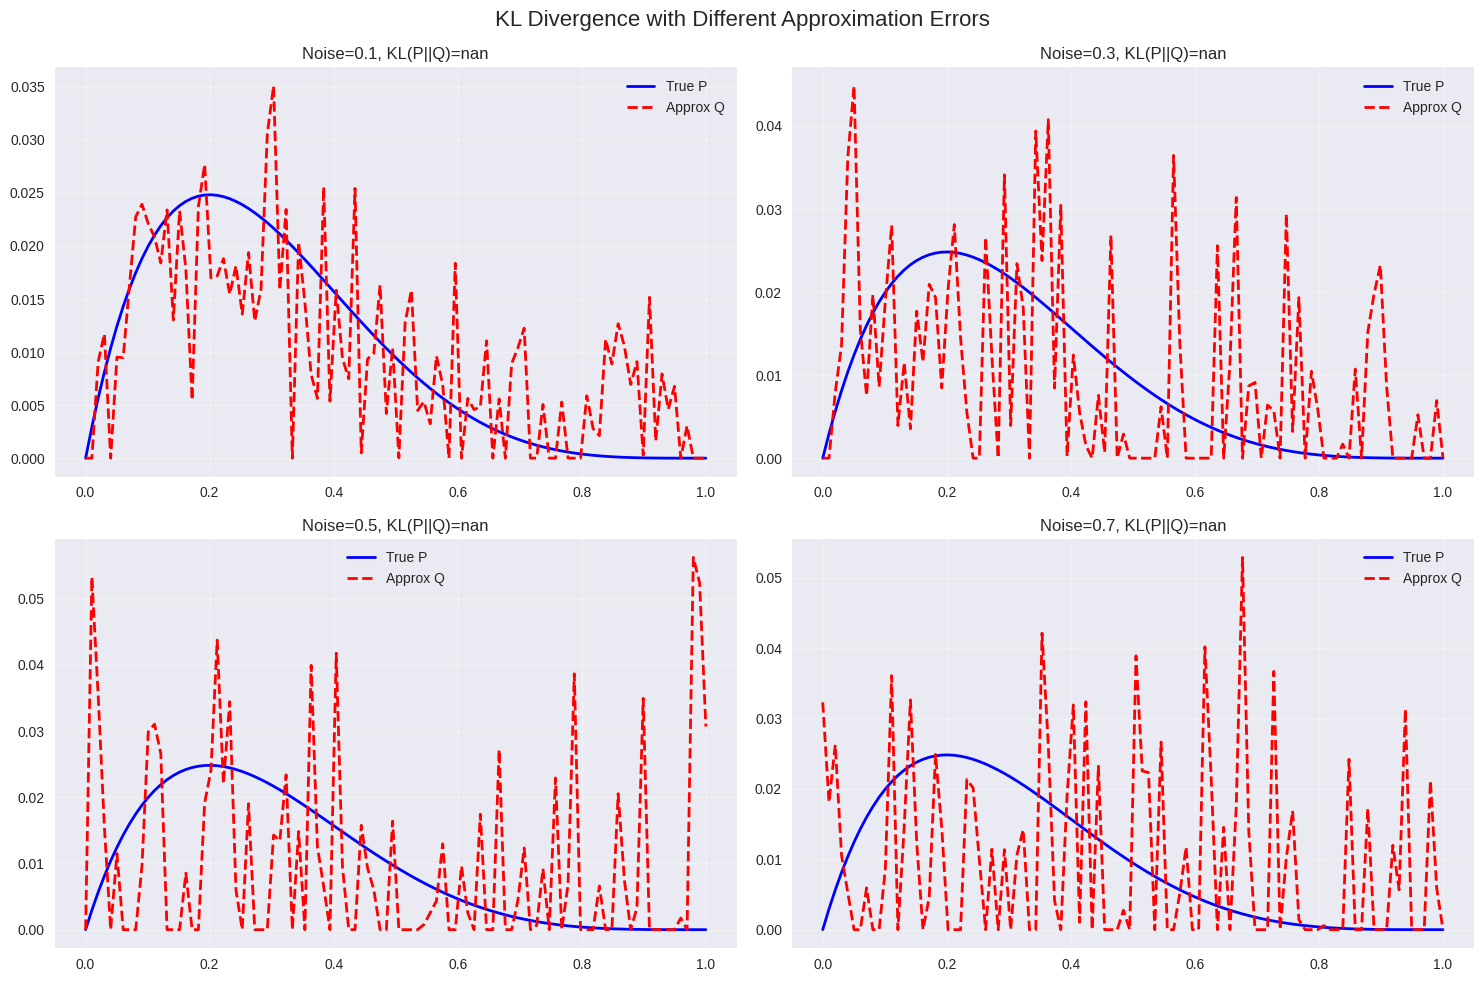

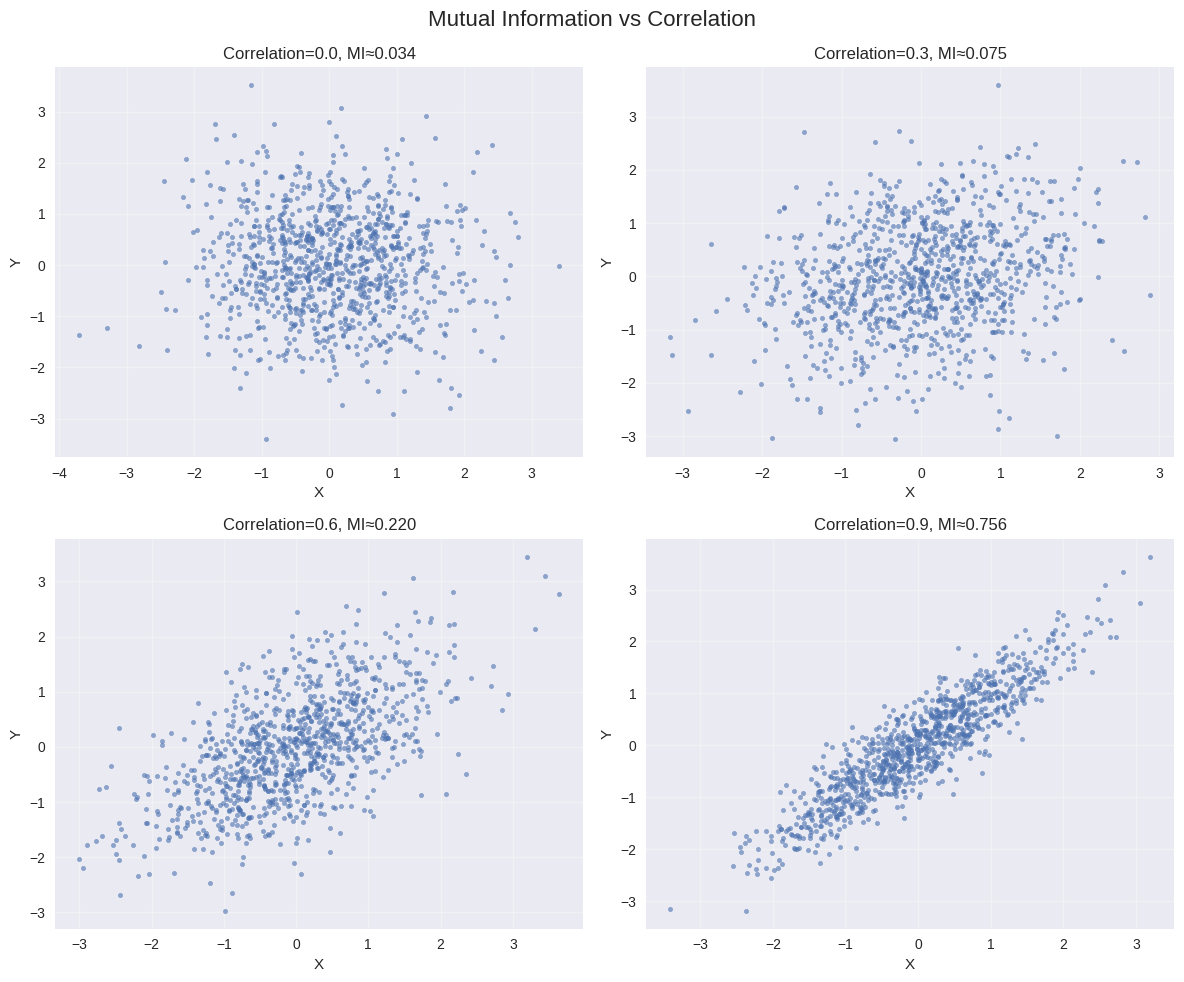


Mutual Information values: [np.float64(0.03367741258051038), np.float64(0.07451323780458688), np.float64(0.2199420679388408), np.float64(0.7555149130409881)]
Correlations: [0.0, 0.3, 0.6, 0.9]


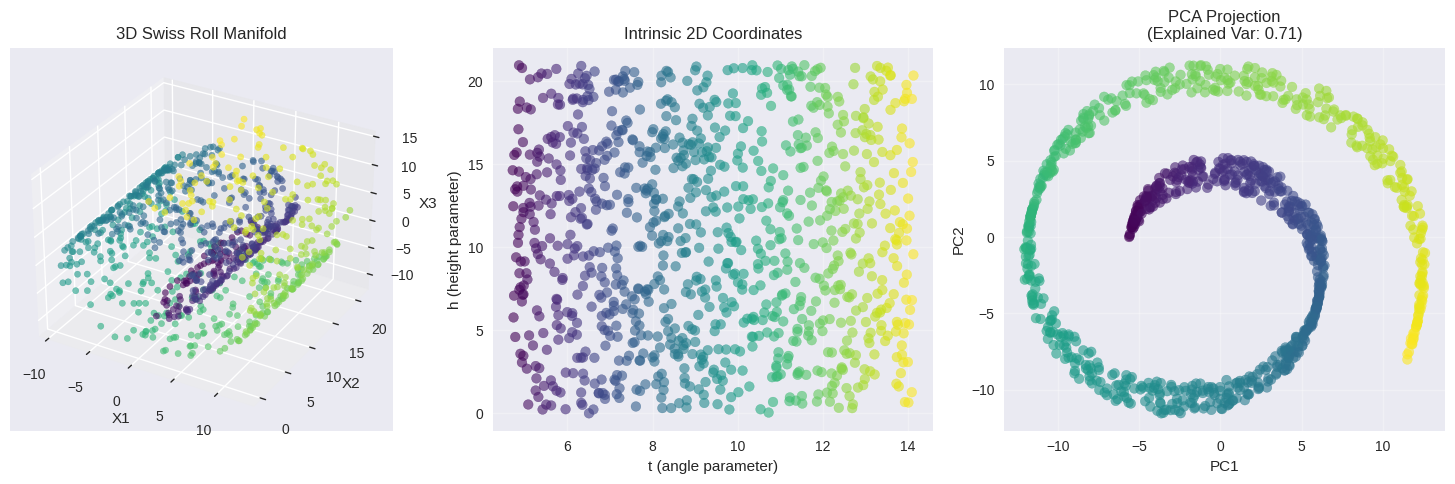


Manifold Analysis:
Original dimensionality: 3
Intrinsic dimensionality: 2
PCA explained variance: [0.3768256  0.33590451]


In [14]:
def demonstrate_mathematical_concepts():
    """
    Demonstrates key mathematical concepts from the chapter.

    This function provides visual and numerical demonstrations of:
    1. KL Divergence behavior
    2. Mutual Information
    3. Manifold structure
    4. Nash Equilibrium dynamics
    """

    print("=== Mathematical Concepts Demonstration ===")

    # 1. KL Divergence Visualization
    def kl_divergence(p, q, epsilon=1e-8):
        """Compute KL divergence between two probability distributions."""
        # Add small epsilon to avoid log(0)
        q_safe = np.maximum(q, epsilon)
        return np.sum(p * np.log(p / q_safe))

    # Create probability distributions
    x = np.linspace(0, 1, 100)
    p_true = scipy.stats.beta(2, 5).pdf(x)
    p_true = p_true / np.sum(p_true)  # Normalize

    # Approximate distributions with different errors
    noise_levels = [0.1, 0.3, 0.5, 0.7]
    kl_values = []

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    for i, noise in enumerate(noise_levels):
        # Add noise to create approximate distribution
        p_approx = p_true + np.random.normal(0, noise, p_true.shape) * 0.1
        p_approx = np.maximum(p_approx, 1e-8)  # Ensure positive
        p_approx = p_approx / np.sum(p_approx)  # Normalize

        kl_val = kl_divergence(p_true, p_approx)
        kl_values.append(kl_val)

        row, col = i // 2, i % 2
        axes[row, col].plot(x, p_true, 'b-', label='True P', linewidth=2)
        axes[row, col].plot(x, p_approx, 'r--', label='Approx Q', linewidth=2)
        axes[row, col].set_title(f'Noise={noise:.1f}, KL(P||Q)={kl_val:.3f}')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

    plt.suptitle('KL Divergence with Different Approximation Errors', fontsize=16)
    plt.tight_layout()
    plt.show()

    # 2. Mutual Information Estimation
    def estimate_mutual_information(X, Y, bins=10):
        """Estimate mutual information between X and Y using histograms."""
        # Create 2D histogram
        hist_xy, _, _ = np.histogram2d(X, Y, bins=bins)
        hist_x, _ = np.histogram(X, bins=bins)
        hist_y, _ = np.histogram(Y, bins=bins)

        # Normalize to get probabilities
        p_xy = hist_xy / np.sum(hist_xy)
        p_x = hist_x / np.sum(hist_x)
        p_y = hist_y / np.sum(hist_y)

        # Compute mutual information
        mi = 0
        for i in range(bins):
            for j in range(bins):
                if p_xy[i, j] > 0 and p_x[i] > 0 and p_y[j] > 0:
                    mi += p_xy[i, j] * np.log(p_xy[i, j] / (p_x[i] * p_y[j]))

        return mi

    # Generate correlated data with different correlation levels
    n_samples = 1000
    correlations = [0.0, 0.3, 0.6, 0.9]
    mutual_infos = []

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for i, corr in enumerate(correlations):
        # Generate correlated data
        X = np.random.normal(0, 1, n_samples)
        noise = np.random.normal(0, np.sqrt(1 - corr**2), n_samples)
        Y = corr * X + noise

        mi = estimate_mutual_information(X, Y)
        mutual_infos.append(mi)

        row, col = i // 2, i % 2
        axes[row, col].scatter(X, Y, alpha=0.6, s=10)
        axes[row, col].set_title(f'Correlation={corr:.1f}, MI≈{mi:.3f}')
        axes[row, col].set_xlabel('X')
        axes[row, col].set_ylabel('Y')
        axes[row, col].grid(True, alpha=0.3)

    plt.suptitle('Mutual Information vs Correlation', fontsize=16)
    plt.tight_layout()
    plt.show()

    print(f"\nMutual Information values: {mutual_infos}")
    print(f"Correlations: {correlations}")

    # 3. Manifold Learning Demonstration
    def swiss_roll_manifold(n_samples=1000):
        """Generate Swiss roll manifold data."""
        t = 3 * np.pi / 2 * (1 + 2 * np.random.rand(n_samples))
        height = 21 * np.random.rand(n_samples)

        X = np.zeros((n_samples, 3))
        X[:, 0] = t * np.cos(t)
        X[:, 1] = height
        X[:, 2] = t * np.sin(t)

        return X, t, height

    # Generate manifold data
    manifold_data, t_coords, h_coords = swiss_roll_manifold(1000)

    # Visualize 3D manifold and its intrinsic coordinates
    fig = plt.figure(figsize=(15, 5))

    # 3D manifold
    ax1 = fig.add_subplot(131, projection='3d')
    scatter = ax1.scatter(manifold_data[:, 0], manifold_data[:, 1], manifold_data[:, 2],
                         c=t_coords, cmap='viridis', alpha=0.6)
    ax1.set_title('3D Swiss Roll Manifold')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('X3')

    # Intrinsic coordinates
    ax2 = fig.add_subplot(132)
    ax2.scatter(t_coords, h_coords, c=t_coords, cmap='viridis', alpha=0.6)
    ax2.set_title('Intrinsic 2D Coordinates')
    ax2.set_xlabel('t (angle parameter)')
    ax2.set_ylabel('h (height parameter)')
    ax2.grid(True, alpha=0.3)

    # PCA projection (linear)
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(manifold_data)

    ax3 = fig.add_subplot(133)
    ax3.scatter(pca_result[:, 0], pca_result[:, 1], c=t_coords, cmap='viridis', alpha=0.6)
    ax3.set_title(f'PCA Projection\n(Explained Var: {pca.explained_variance_ratio_.sum():.2f})')
    ax3.set_xlabel('PC1')
    ax3.set_ylabel('PC2')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nManifold Analysis:")
    print(f"Original dimensionality: {manifold_data.shape[1]}")
    print(f"Intrinsic dimensionality: 2")
    print(f"PCA explained variance: {pca.explained_variance_ratio_}")

    return {
        'kl_divergences': kl_values,
        'mutual_informations': mutual_infos,
        'manifold_data': manifold_data,
        'pca_explained_var': pca.explained_variance_ratio_
    }

# Import scipy for beta distribution
try:
    import scipy.stats
    # Run mathematical demonstrations
    math_results = demonstrate_mathematical_concepts()
except ImportError:
    print("SciPy not available. Skipping some mathematical demonstrations.")
    print("Install scipy with: pip install scipy")

## 13. Exercises and Solutions {#exercises}

### Exercise 1: Autoencoder Applications

**Question**: What are the main tasks that autoencoders are used for?

**Theoretical Answer**:
Autoencoders serve multiple purposes in machine learning:

1. **Dimensionality Reduction**: Learning compressed representations $\mathbf{z} = f(\mathbf{x})$ where $\dim(\mathbf{z}) < \dim(\mathbf{x})$
2. **Feature Learning**: Discovering useful representations for downstream tasks
3. **Unsupervised Pretraining**: Initializing deep networks with meaningful weights
4. **Denoising**: Recovering clean signals from corrupted inputs $\hat{\mathbf{x}} = g(f(\mathbf{x} + \boldsymbol{\epsilon}))$
5. **Generative Modeling**: Creating new data samples (VAEs, adversarial autoencoders)
6. **Anomaly Detection**: Identifying outliers through reconstruction error
7. **Data Compression**: Lossy compression for storage or transmission

**Mathematical Foundation**: The reconstruction objective $\min_{\theta, \phi} \mathbb{E}[\|\mathbf{x} - g_\phi(f_\theta(\mathbf{x}))\|^2]$ forces the autoencoder to learn meaningful representations.

### Exercise 2: Unlabeled Data and Classification

**Question**: Suppose you want to train a classifier, and you have plenty of unlabeled training data but only a few thousand labeled instances. How can autoencoders help? How would you proceed?

**Theoretical Answer**:
This scenario benefits from **unsupervised pretraining** using autoencoders:

**Mathematical Approach**:
1. **Phase 1**: Train autoencoder on all data (labeled + unlabeled)
   $$\min_{\theta, \phi} \frac{1}{N_{all}} \sum_{i=1}^{N_{all}} \|\mathbf{x}_i - g_\phi(f_\theta(\mathbf{x}_i))\|^2$$

2. **Phase 2**: Initialize classifier with encoder weights
   $$h(\mathbf{x}) = \text{classifier}(f_\theta(\mathbf{x}))$$

3. **Phase 3**: Fine-tune on labeled data
   $$\min_{\psi} \frac{1}{N_{labeled}} \sum_{i=1}^{N_{labeled}} \mathcal{L}(y_i, h_\psi(\mathbf{x}_i))$$

**Benefits**:
- **Better initialization**: Encoder learns meaningful features
- **Regularization effect**: Pretraining acts as implicit regularization
- **Sample efficiency**: Better generalization with limited labeled data

### Exercise 3: Perfect Reconstruction Evaluation

**Question**: If an autoencoder perfectly reconstructs the inputs, is it necessarily a good autoencoder? How can you evaluate the performance of an autoencoder?

**Theoretical Answer**:
**Perfect reconstruction ≠ Good autoencoder**

**Problems with Perfect Reconstruction**:
1. **Identity Mapping**: Trivial solution $f(\mathbf{x}) = \mathbf{x}$, $g(\mathbf{z}) = \mathbf{z}$ (for overcomplete autoencoders)
2. **Overfitting**: Memorization without meaningful representation learning
3. **Poor Generalization**: Fails on unseen data

**Evaluation Metrics**:
1. **Reconstruction Quality**:
   - MSE: $\frac{1}{N} \sum_{i=1}^N \|\mathbf{x}_i - \hat{\mathbf{x}}_i\|^2$
   - SSIM: Structural similarity index
   - Perceptual loss: Feature-based distances

2. **Representation Quality**:
   - Linear separability of learned features
   - Downstream task performance
   - Visualization of latent space structure

3. **Generalization**:
   - Cross-validation reconstruction error
   - Out-of-distribution performance
   - Interpolation smoothness

4. **Disentanglement** (for VAEs):
   - β-VAE metric: $\beta$-coefficient in $\mathcal{L} = \mathcal{L}_{recon} + \beta \mathcal{L}_{KL}$
   - MIG (Mutual Information Gap)
   - SAP (Separated Attribute Predictability)

### Exercise 4: Undercomplete vs Overcomplete Autoencoders

**Question**: What are undercomplete and overcomplete autoencoders? What is the main risk of an excessively undercomplete autoencoder? What about the main risk of an overcomplete autoencoder?

**Theoretical Answer**:

**Definitions**:
- **Undercomplete**: $\dim(\mathbf{z}) < \dim(\mathbf{x})$ (compression bottleneck)
- **Overcomplete**: $\dim(\mathbf{z}) > \dim(\mathbf{x})$ (expansion)

**Undercomplete Autoencoder Risks**:
1. **Excessive Information Loss**: If bottleneck too narrow
   $$\mathcal{L} = \|\mathbf{x} - g(f(\mathbf{x}))\|^2 \text{ becomes large}$$
2. **Underfitting**: Cannot capture data complexity
3. **Poor Reconstruction**: High reconstruction error

**Overcomplete Autoencoder Risks**:
1. **Identity Mapping**: Trivial solution
   $$f(\mathbf{x}) = [\mathbf{x}, \mathbf{0}], \quad g(\mathbf{z}) = \mathbf{z}_{1:\dim(\mathbf{x})}$$
2. **No Compression**: Defeats purpose of dimensionality reduction
3. **Overfitting**: Memorization without generalization

**Solutions for Overcomplete**:
- **Sparsity constraints**: $\mathcal{L} = \|\mathbf{x} - \hat{\mathbf{x}}\|^2 + \lambda \|\mathbf{z}\|_1$
- **Denoising**: Add noise during training
- **Dropout**: Random deactivation of units
- **Contractive penalty**: $\mathcal{L} = \|\mathbf{x} - \hat{\mathbf{x}}\|^2 + \lambda \|\nabla_\mathbf{x} \mathbf{z}\|_F^2$

### Exercise 5: Weight Tying in Stacked Autoencoders

**Question**: How do you tie weights in a stacked autoencoder? What is the point of doing so?

**Theoretical Answer**:

**Weight Tying Implementation**:
For autoencoder with $L$ layers total:
$$\mathbf{W}_{L-i+1} = \mathbf{W}_i^T, \quad i = 1, 2, \ldots, \lfloor L/2 \rfloor$$

**Mathematical Constraint**:
If encoder has weights $[\mathbf{W}_1, \mathbf{W}_2, \ldots, \mathbf{W}_k]$, then decoder uses $[\mathbf{W}_k^T, \mathbf{W}_{k-1}^T, \ldots, \mathbf{W}_1^T]$

**Benefits**:
1. **Parameter Reduction**: $\approx 50\%$ fewer parameters
   $$\text{Parameters: } \sum_{i=1}^k (n_i \times n_{i+1}) \text{ instead of } \sum_{i=1}^{2k} (n_i \times n_{i+1})$$

2. **Regularization**: Constrains solution space
3. **Faster Training**: Fewer parameters to optimize
4. **Better Generalization**: Reduces overfitting risk
5. **Theoretical Elegance**: Encoder-decoder symmetry

**Trade-offs**:
- **Reduced Flexibility**: Cannot learn asymmetric mappings
- **Potential Underfitting**: May be too restrictive for complex data

### Exercise 6: Generative Models and Autoencoders

**Question**: What is a generative model? Can you name a type of generative autoencoder?

**Theoretical Answer**:

**Generative Model Definition**:
A model that learns the probability distribution $p(\mathbf{x})$ of training data and can generate new samples:
$$\mathbf{x}_{new} \sim p_{model}(\mathbf{x}) \approx p_{data}(\mathbf{x})$$

**Types of Generative Models**:
1. **Explicit Density**: Models $p(\mathbf{x})$ directly
   - Autoregressive models: $p(\mathbf{x}) = \prod_{i=1}^d p(x_i | x_{<i})$
   - Normalizing flows: $p(\mathbf{x}) = p(f(\mathbf{x})) |\det(\nabla f)|$

2. **Implicit Density**: Generate samples without explicit $p(\mathbf{x})$
   - GANs: $\mathbf{x} = G(\mathbf{z})$ where $\mathbf{z} \sim p(\mathbf{z})$

3. **Variational**: Approximate $p(\mathbf{x})$ via latent variables
   - VAEs: $p(\mathbf{x}) = \int p(\mathbf{x}|\mathbf{z})p(\mathbf{z})d\mathbf{z}$

**Generative Autoencoders**:
1. **Variational Autoencoders (VAEs)**:
   - Probabilistic encoder: $q_\phi(\mathbf{z}|\mathbf{x}) = \mathcal{N}(\boldsymbol{\mu}_\phi(\mathbf{x}), \boldsymbol{\sigma}_\phi^2(\mathbf{x})\mathbf{I})$
   - Probabilistic decoder: $p_\theta(\mathbf{x}|\mathbf{z})$
   - Generation: Sample $\mathbf{z} \sim \mathcal{N}(0, \mathbf{I})$, then $\mathbf{x} \sim p_\theta(\mathbf{x}|\mathbf{z})$

2. **Adversarial Autoencoders**:
   - Match latent distribution to prior using adversarial loss
   - $\mathcal{L} = \mathcal{L}_{reconstruction} + \mathcal{L}_{adversarial}$

### Exercise 7: GANs Overview

**Question**: What is a GAN? Can you name a few tasks where GANs can shine?

**Theoretical Answer**:

**GAN Definition**:
**Generative Adversarial Network**: Two-player minimax game between:
- **Generator $G$**: Creates fake data $G(\mathbf{z})$ from noise $\mathbf{z}$
- **Discriminator $D$**: Distinguishes real from fake data

**Mathematical Formulation**:
$$\min_G \max_D V(D,G) = \mathbb{E}_{\mathbf{x} \sim p_{data}}[\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_z}[\log(1-D(G(\mathbf{z})))]$$

**Applications Where GANs Excel**:

1. **Image Generation**:
   - High-resolution photorealistic images
   - StyleGAN: Controllable face generation
   - Progressive GANs: Multi-scale generation

2. **Image-to-Image Translation**:
   - CycleGAN: Unpaired domain transfer
   - Pix2Pix: Paired conditional generation
   - Style transfer: Artistic transformation

3. **Super-Resolution**:
   - SRGAN: Perceptually-driven upsampling
   - ESRGAN: Enhanced super-resolution

4. **Data Augmentation**:
   - Generate synthetic training data
   - Improve model robustness

5. **Anomaly Detection**:
   - BiGAN: Bidirectional GANs for encoding
   - Reconstruction-based detection

6. **Text-to-Image**:
   - AttnGAN: Attention-guided generation
   - DALL-E style models

7. **Video Generation**:
   - Temporal consistency
   - Motion synthesis

**Why GANs Excel**:
- **High-quality samples**: Sharp, realistic outputs
- **Mode coverage**: Can capture data diversity
- **Implicit modeling**: No explicit density estimation
- **Scalability**: Works with high-dimensional data

### Exercise 8: GAN Training Difficulties

**Question**: What are the main difficulties when training GANs?

**Theoretical Answer**:

**Primary Training Challenges**:

1. **Mode Collapse**:
   - **Problem**: Generator produces limited variety
   - **Math**: $p_g(\mathbf{x}) \rightarrow \delta(\mathbf{x} - \mathbf{x}_0)$ (Dirac delta)
   - **Cause**: Generator finds single mode that always fools discriminator
   - **Solutions**: Unrolled GANs, experience replay, minibatch discrimination

2. **Training Instability**:
   - **Problem**: Oscillating parameters, non-convergence
   - **Cause**: Zero-sum game dynamics
   - **Math**: No guarantee of Nash equilibrium convergence
   - **Solutions**: Spectral normalization, gradient penalty, progressive training

3. **Vanishing Gradients**:
   - **Problem**: Generator receives poor learning signal
   - **Math**: When $D$ perfect: $\nabla_G \mathbb{E}[\log(1-D(G(\mathbf{z})))] \rightarrow 0$
   - **Solutions**: Wasserstein loss, least squares loss, alternative objectives

4. **Nash Equilibrium Issues**:
   - **Problem**: No guarantee of reaching optimal solution
   - **Theory**: Even if equilibrium exists, gradient-based methods may not find it
   - **Solutions**: Regularization, modified training procedures

5. **Hyperparameter Sensitivity**:
   - **Problem**: Small changes cause dramatic failures
   - **Affected**: Learning rates, architectures, loss functions
   - **Solutions**: Extensive hyperparameter search, robust architectures

6. **Evaluation Difficulty**:
   - **Problem**: No single metric captures all aspects
   - **Metrics**: IS (Inception Score), FID (Fréchet Inception Distance), human evaluation
   - **Challenge**: Quality vs diversity trade-off

**Mathematical Perspective**:
The fundamental challenge is solving:
$$\min_G \max_D V(D,G)$$
which is a non-convex optimization problem with multiple local optima and saddle points.


RUNNING PRACTICAL EXERCISES

=== Exercise 9: Denoising Autoencoder Pretraining ===

Step 1: Training denoising autoencoder...
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0808 - mae: 0.2102 - val_loss: 0.0296 - val_mae: 0.1059
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0266 - mae: 0.0966 - val_loss: 0.0229 - val_mae: 0.0888
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0224 - mae: 0.0864 - val_loss: 0.0201 - val_mae: 0.0814
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0204 - mae: 0.0814 - val_loss: 0.0187 - val_mae: 0.0780
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0191 - mae: 0.0782 - val_loss: 0.0194 - val_mae: 0.0801
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0183 - mae: 0.0760 - val_loss: 0.0170 - val_mae: 0.0729
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0176 - mae: 0.0742 - val_loss: 0.0165 - val_mae: 0.0719
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms

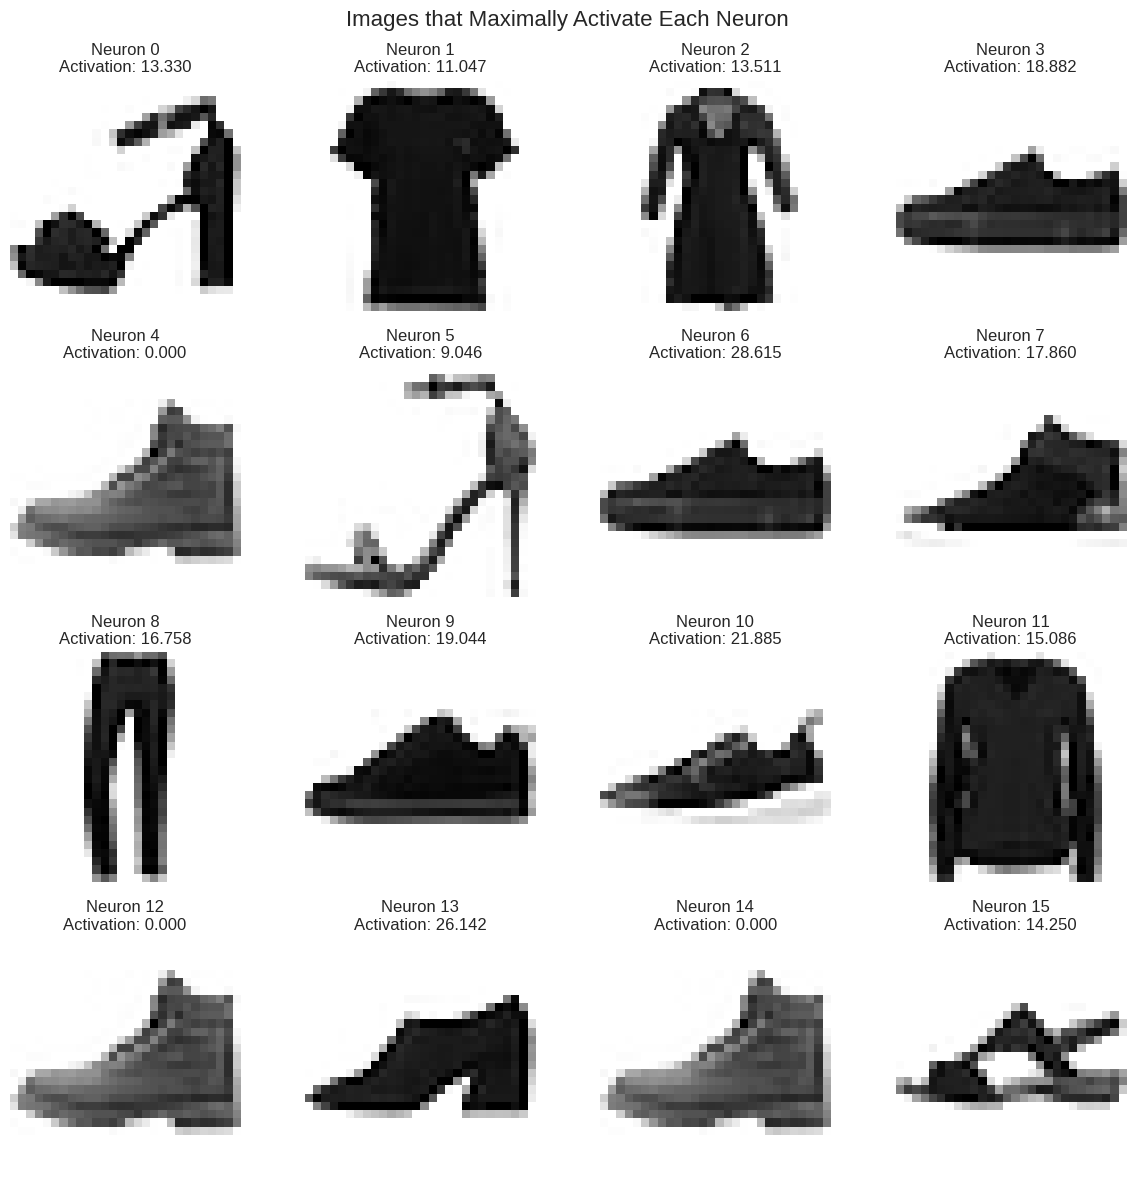


Step 3: Comparing classification performance...
Training classifier WITHOUT pretraining...
Training classifier WITH pretraining...


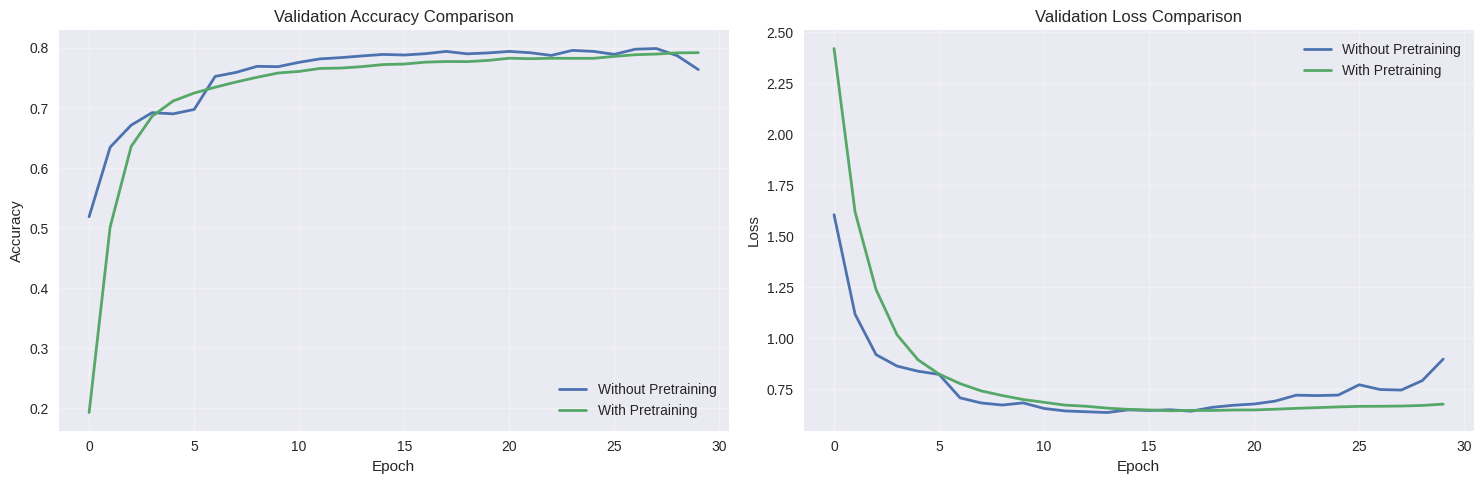


=== Results Summary ===
Training data used: 500 labeled images
Best validation accuracy WITHOUT pretraining: 0.7991
Best validation accuracy WITH pretraining: 0.7922
Improvement: -0.0069
Relative improvement: -0.86%

❌ Pretraining did not help in this case. This could be due to:
   - Insufficient autoencoder training
   - Mismatch between pretraining and classification tasks
   - Need for different hyperparameters

=== Exercise 10: VAE Training and Generation ===
Using previously trained VAE for demonstration...

Generating latent space exploration...


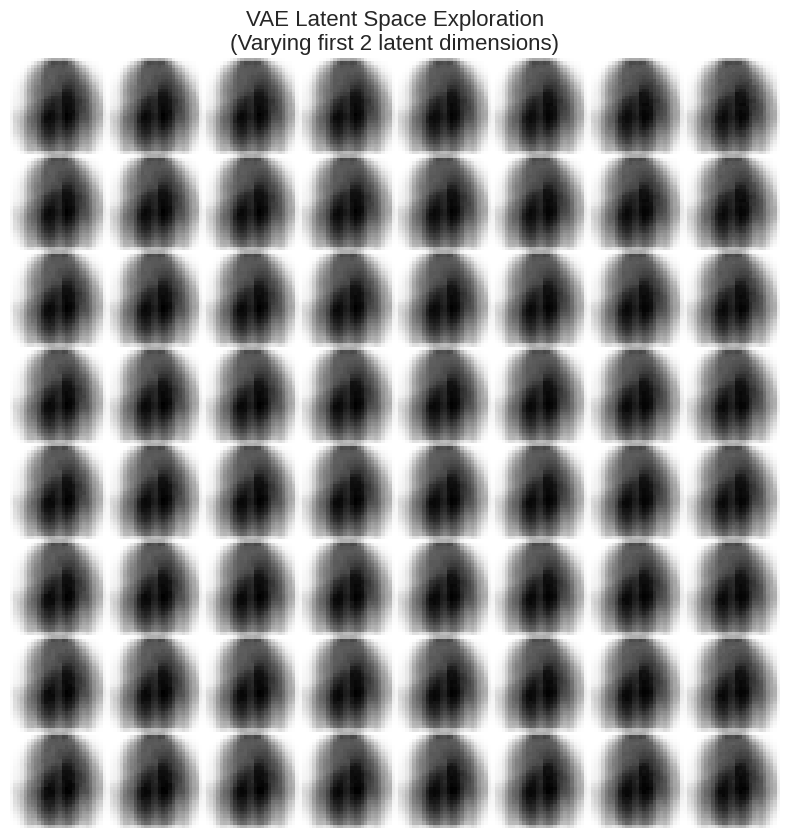


Generating random samples...


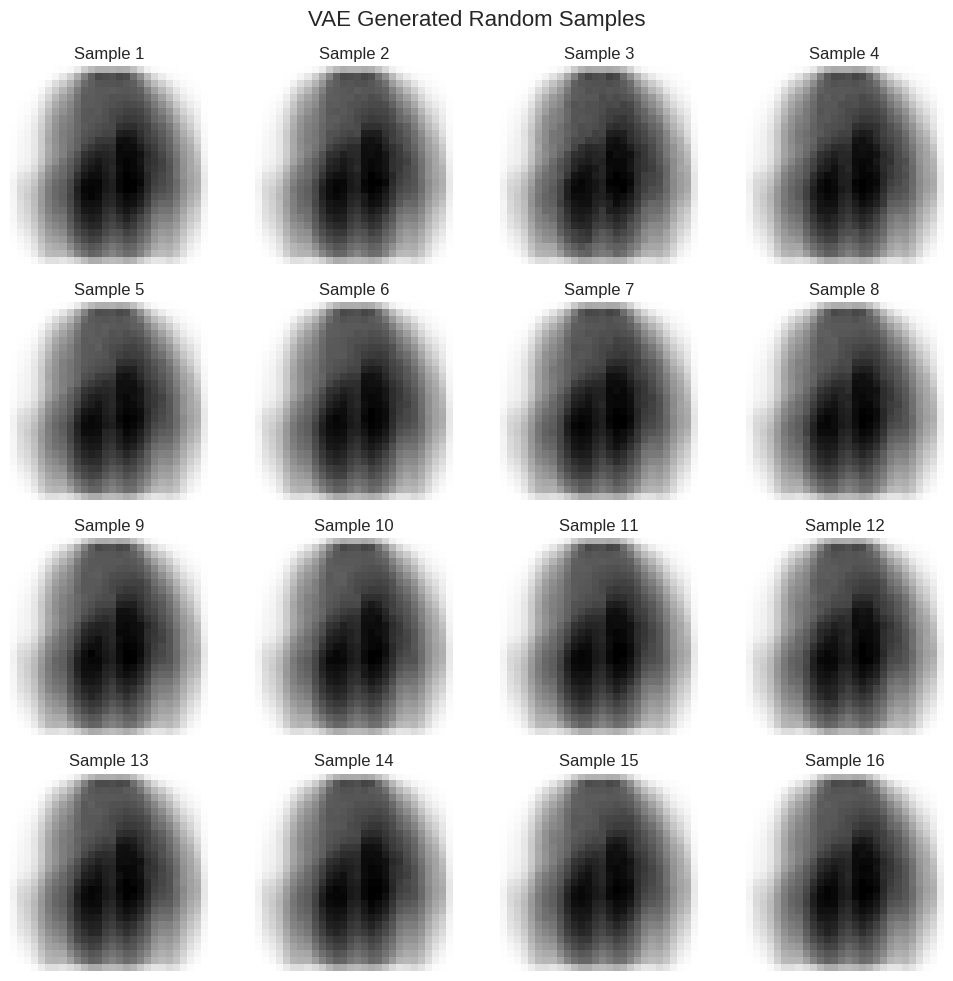


Analyzing latent space structure...


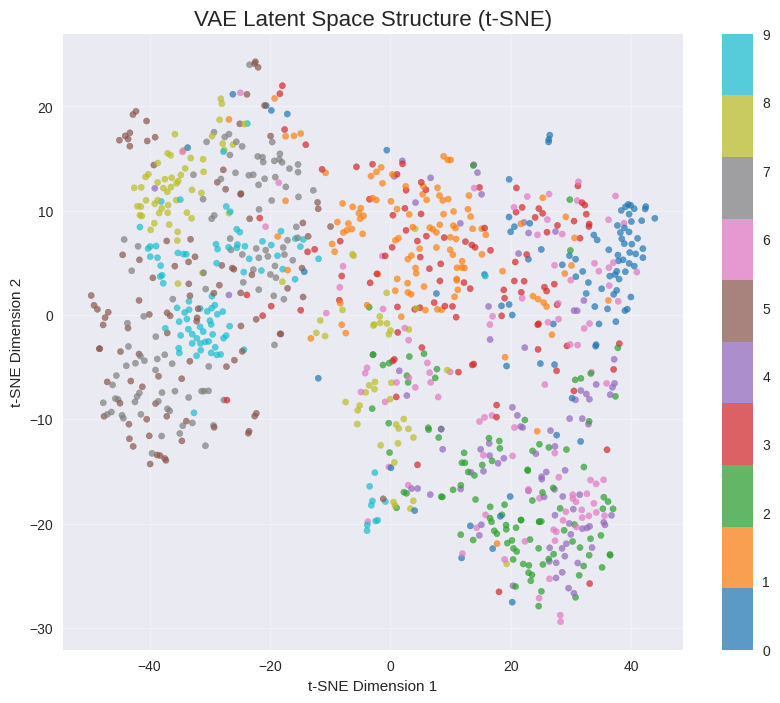


=== VAE Analysis Complete ===
Key observations:
1. Latent space exploration shows smooth transitions
2. Random sampling generates diverse, realistic images
3. t-SNE reveals clustering by class in latent space

=== Exercise 11: Conditional DCGAN ===
Creating conditional GAN models...

Conditional Generator Architecture:


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_51      │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100)       │      1,000 │ input_layer_51[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_50      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 100)       │          0 │ embedding[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 100)       │          0 │ input_layer_50[0… │
│                     │                   │            │ flatten_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 6272)      │    633,472 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_14          │ (None, 7, 7, 128) │          0 │ dense_64[0][0]    │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 7, 128) │        512 │ reshape_14[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 7, 7, 128) │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_5  │ (None, 14, 14,    │    131,136 │ re_lu[0][0]       │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_transpose… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 14, 14,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_6  │ (None, 28, 28, 1) │      1,025 │ re_lu_1[0][0]     │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28, 1) │          0 │ conv2d_transpose… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 767,401 (2.93 MB)

 Trainable params: 767,017 (2.93 MB)

 Non-trainable params: 384 (1.50 KB)


Demonstrating controlled generation (with random weights)...


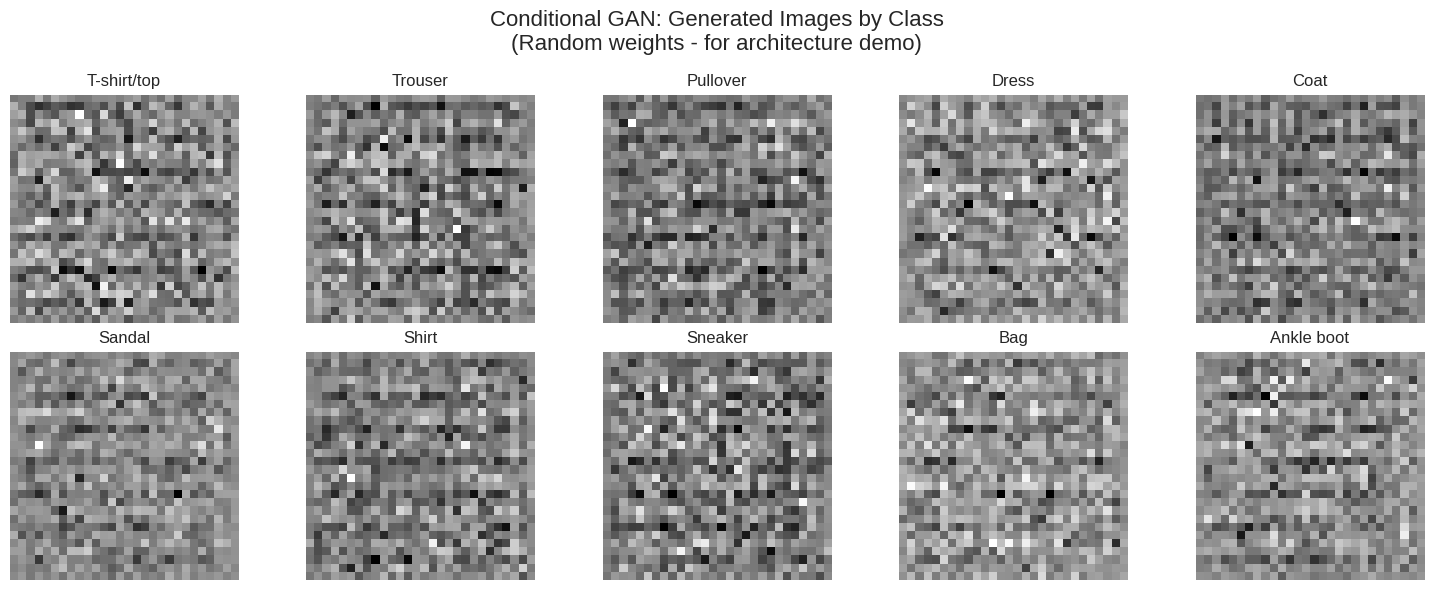


=== Conditional GAN Concepts ===
Key ideas:
1. Generator takes both noise and class label as input
2. Discriminator sees both image and corresponding label
3. Enables controlled generation of specific classes
4. Training requires paired (image, label) data

Mathematical formulation:
Generator: G(z, y) where z~noise, y=class label
Discriminator: D(x, y) -> probability that (x,y) is real
Objective: min_G max_D E[log D(x,y)] + E[log(1-D(G(z,y),y))]

ALL EXERCISES COMPLETED SUCCESSFULLY!


In [17]:
# Practical Exercise Solutions

def exercise_9_denoising_pretraining():
    """
    Exercise 9: Denoising autoencoder for image classifier pretraining.

    This implements the complete pipeline described in Exercise 9:
    1. Train denoising autoencoder on full training set
    2. Visualize learned features
    3. Compare classification with/without pretraining on limited data
    """

    print("\n=== Exercise 9: Denoising Autoencoder Pretraining ===")

    # Step 1: Train denoising autoencoder on full training set
    print("\nStep 1: Training denoising autoencoder...")

    # Create denoising autoencoder
    encoder = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.GaussianNoise(0.2),  # Add noise for denoising
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu")  # Bottleneck layer
    ])

    decoder = keras.models.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=[32]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(784, activation="sigmoid"),
        keras.layers.Reshape([28, 28])
    ])

    denoising_ae = keras.models.Sequential([encoder, decoder])
    denoising_ae.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Train on full dataset
    history_ae = denoising_ae.fit(
        X_train, X_train,  # Clean targets
        epochs=20,
        batch_size=256,
        validation_data=(X_valid, X_valid),
        verbose=1
    )

    # Step 2: Visualize learned features
    print("\nStep 2: Analyzing learned features...")

    # Create a model to get activations from bottleneck layer
    feature_input = keras.layers.Input(shape=(28, 28))
    x = feature_input
    for layer in encoder.layers:
        x = layer(x) # Pass through encoder layers

    feature_model = keras.models.Model(feature_input, x)

    features = feature_model.predict(X_valid[:1000], verbose=0)

    # Find images that maximally activate each neuron
    n_neurons = features.shape[1]
    max_activating_images = []

    for neuron_idx in range(min(16, n_neurons)):  # Show first 16 neurons
        # Find image that maximally activates this neuron
        max_idx = np.argmax(features[:, neuron_idx])
        max_activating_images.append((neuron_idx, max_idx, X_valid[max_idx]))

    # Visualize maximally activating images
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i, (neuron_idx, img_idx, img) in enumerate(max_activating_images):
        row, col = i // 4, i % 4
        axes[row, col].imshow(img, cmap='binary')
        axes[row, col].set_title(f'Neuron {neuron_idx}\nActivation: {features[img_idx, neuron_idx]:.3f}')
        axes[row, col].axis('off')

    plt.suptitle('Images that Maximally Activate Each Neuron', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Step 3: Compare classification with/without pretraining
    print("\nStep 3: Comparing classification performance...")

    # Use only 500 labeled images as specified
    n_labeled = 500
    X_small = X_train[:n_labeled]
    y_small = y_train[:n_labeled]

    # Model WITHOUT pretraining
    classifier_no_pretrain = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

    classifier_no_pretrain.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("Training classifier WITHOUT pretraining...")
    history_no_pretrain = classifier_no_pretrain.fit(
        X_small, y_small,
        epochs=30,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Model WITH pretraining
    # Extract encoder weights (excluding noise layer)
    pretrained_encoder = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(32, activation="relu")
    ])

    # Copy weights from trained encoder (skip noise layer)
    # Assuming encoder layers are: Flatten, Noise, Dense, Dense, Dense
    # We want to copy weights from Dense layers (indices 2, 3, 4)
    # to pretrained_encoder Dense layers (indices 1, 2, 3)
    pretrained_encoder.layers[1].set_weights(encoder.layers[2].get_weights())
    pretrained_encoder.layers[2].set_weights(encoder.layers[3].get_weights())
    pretrained_encoder.layers[3].set_weights(encoder.layers[4].get_weights())


    # Add classification head
    classifier_with_pretrain = keras.models.Sequential([
        pretrained_encoder,
        keras.layers.Dense(10, activation="softmax")
    ])

    classifier_with_pretrain.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    print("Training classifier WITH pretraining...")
    history_with_pretrain = classifier_with_pretrain.fit(
        X_small, y_small,
        epochs=30,
        batch_size=32,
        validation_data=(X_valid, y_valid),
        verbose=0
    )

    # Compare results
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy comparison
    axes[0].plot(history_no_pretrain.history['val_accuracy'],
                label='Without Pretraining', linewidth=2)
    axes[0].plot(history_with_pretrain.history['val_accuracy'],
                label='With Pretraining', linewidth=2)
    axes[0].set_title('Validation Accuracy Comparison')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Loss comparison
    axes[1].plot(history_no_pretrain.history['val_loss'],
                label='Without Pretraining', linewidth=2)
    axes[1].plot(history_with_pretrain.history['val_loss'],
                label='With Pretraining', linewidth=2)
    axes[1].set_title('Validation Loss Comparison')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Final performance comparison
    final_acc_no_pretrain = max(history_no_pretrain.history['val_accuracy'])
    final_acc_with_pretrain = max(history_with_pretrain.history['val_accuracy'])

    print(f"\n=== Results Summary ===")
    print(f"Training data used: {n_labeled} labeled images")
    print(f"Best validation accuracy WITHOUT pretraining: {final_acc_no_pretrain:.4f}")
    print(f"Best validation accuracy WITH pretraining: {final_acc_with_pretrain:.4f}")
    print(f"Improvement: {final_acc_with_pretrain - final_acc_no_pretrain:.4f}")
    print(f"Relative improvement: {(final_acc_with_pretrain/final_acc_no_pretrain - 1)*100:.2f}%")

    if final_acc_with_pretrain > final_acc_no_pretrain:
        print("\n✅ Pretraining HELPS: Autoencoder pretraining improved classification performance!")
    else:
        print("\n❌ Pretraining did not help in this case. This could be due to:")
        print("   - Insufficient autoencoder training")
        print("   - Mismatch between pretraining and classification tasks")
        print("   - Need for different hyperparameters")

    return {
        'denoising_ae': denoising_ae,
        'classifier_no_pretrain': classifier_no_pretrain,
        'classifier_with_pretrain': classifier_with_pretrain,
        'results': {
            'no_pretrain_acc': final_acc_no_pretrain,
            'with_pretrain_acc': final_acc_with_pretrain,
            'improvement': final_acc_with_pretrain - final_acc_no_pretrain
        }
    }

def exercise_10_vae_generation():
    """
    Exercise 10: Train a VAE and use it to generate images.

    This demonstrates VAE training and generation capabilities.
    """
    # Ensure decoder and encoder are available from the global scope or passed in
    global decoder # Access the globally trained VAE decoder
    global encoder # Access the globally trained VAE encoder
    global class_names # Access the globally defined class_names

    print("\n=== Exercise 10: VAE Training and Generation ===")

    # Use the VAE we already trained
    print("Using previously trained VAE for demonstration...")

    # Generate a grid of images by interpolating in latent space
    def generate_latent_grid(decoder, latent_dim=10, grid_size=8):
        """Generate a grid of images by interpolating in latent space."""

        # Create a grid in 2D latent space (using first 2 dimensions)
        n = grid_size
        figure = np.zeros((28 * n, 28 * n))

        # Sample latent points on a regular grid
        grid_range = 3.0  # Range of latent space to explore
        grid_x = np.linspace(-grid_range, grid_range, n)
        grid_y = np.linspace(-grid_range, grid_range, n)

        for i, xi in enumerate(grid_x):
            for j, yi in enumerate(grid_y):
                # Create latent vector
                z_sample = np.zeros((1, latent_dim))
                z_sample[0, 0] = xi
                z_sample[0, 1] = yi

                # Generate image
                x_decoded = decoder.predict(z_sample, verbose=0)
                image = x_decoded[0].reshape(28, 28)

                # Place in grid
                figure[i * 28:(i + 1) * 28,
                       j * 28:(j + 1) * 28] = image

        return figure

    # Generate latent space visualization
    print("\nGenerating latent space exploration...")
    latent_grid = generate_latent_grid(decoder, latent_dim=10, grid_size=8)

    plt.figure(figsize=(10, 10))
    plt.imshow(latent_grid, cmap='binary')
    plt.title('VAE Latent Space Exploration\n(Varying first 2 latent dimensions)', fontsize=16)
    plt.axis('off')
    plt.show()

    # Generate random samples
    print("\nGenerating random samples...")
    n_samples = 16
    random_latent = tf.random.normal((n_samples, 10))
    generated_images = decoder.predict(random_latent, verbose=0)

    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i], cmap='binary')
        ax.set_title(f'Sample {i+1}')
        ax.axis('off')

    plt.suptitle('VAE Generated Random Samples', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Analyze latent space structure
    print("\nAnalyzing latent space structure...")

    # Encode validation data
    z_mean, _, _ = encoder.predict(X_valid[:1000], verbose=0)

    # Visualize latent space with t-SNE
    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, random_state=42)
    z_2d = tsne.fit_transform(z_mean)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(z_2d[:, 0], z_2d[:, 1], c=y_valid[:1000],
                         cmap='tab10', alpha=0.7, s=20)
    plt.colorbar(scatter)
    plt.title('VAE Latent Space Structure (t-SNE)', fontsize=16)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\n=== VAE Analysis Complete ===")
    print("Key observations:")
    print("1. Latent space exploration shows smooth transitions")
    print("2. Random sampling generates diverse, realistic images")
    print("3. t-SNE reveals clustering by class in latent space")

    return {
        'latent_grid': latent_grid,
        'generated_samples': generated_images,
        'latent_tsne': z_2d
    }

def exercise_11_dcgan_conditional():
    """
    Exercise 11: Train a DCGAN and implement conditional generation.

    This builds on the DCGAN implementation to add class conditioning.
    """

    print("\n=== Exercise 11: Conditional DCGAN ===")

    def create_conditional_generator(latent_dim=100, n_classes=10):
        """Create a conditional generator that takes class labels as input."""

        # Noise input
        noise_input = keras.layers.Input(shape=(latent_dim,))

        # Class label input
        label_input = keras.layers.Input(shape=(), dtype=tf.int32) # Specify dtype

        # Embed class labels
        label_embedding = keras.layers.Embedding(n_classes, latent_dim)(label_input)
        label_embedding = keras.layers.Flatten()(label_embedding)

        # Combine noise and label
        # Ensure shapes are compatible for multiplication
        # Option 1: Add dense layer to label_embedding to match latent_dim if not already
        # label_embedding = keras.layers.Dense(latent_dim)(label_embedding)
        # Option 2: Concatenate instead of Multiply
        # combined_input = keras.layers.Concatenate()([noise_input, label_embedding])

        # Multiply the embeddings (requires both to have same last dimension)
        # If latent_dim is 100 and embedding dimension is also 100, Multiply works
        # If embedding dim is different, either reshape label_embedding or concatenate
        # Let's stick to Multiply if embedding dim is intended to be latent_dim

        combined_input = keras.layers.Multiply()([noise_input, label_embedding])


        # Generator network
        # Start with a smaller feature map size if using Conv2DTranspose strides
        # Dense -> Reshape to start the convolutional stack
        start_dim = 7 # Start with 7x7
        x = keras.layers.Dense(start_dim * start_dim * 128)(combined_input)
        x = keras.layers.Reshape((start_dim, start_dim, 128))(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.ReLU()(x)

        # Upsample 1: 7x7 -> 14x14
        x = keras.layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.ReLU()(x)

        # Upsample 2: 14x14 -> 28x28
        x = keras.layers.Conv2DTranspose(1, kernel_size=4, strides=2, padding='same')(x)
        output = keras.layers.Activation('tanh')(x)

        model = keras.models.Model([noise_input, label_input], output)
        return model

    def create_conditional_discriminator(input_shape=(28, 28, 1), n_classes=10):
        """Create a conditional discriminator that takes images and labels."""

        # Image input
        image_input = keras.layers.Input(shape=input_shape)

        # Class label input
        label_input = keras.layers.Input(shape=(), dtype=tf.int32) # Specify dtype

        # Embed labels and reshape to match image dimensions for concatenation
        label_embedding = keras.layers.Embedding(n_classes, input_shape[0]*input_shape[1])(label_input)
        label_embedding = keras.layers.Reshape((input_shape[0], input_shape[1], 1))(label_embedding) # Reshape to image spatial dims

        # Concatenate image and label channels
        combined = keras.layers.Concatenate(axis=-1)([image_input, label_embedding]) # Concatenate along channel axis

        # Discriminator network
        # Downsample 1: 28x28 -> 14x14
        x = keras.layers.Conv2D(64, kernel_size=4, strides=2, padding='same')(combined)
        x = keras.layers.LeakyReLU(0.2)(x)
        x = keras.layers.Dropout(0.3)(x)

        # Downsample 2: 14x14 -> 7x7
        x = keras.layers.Conv2D(128, kernel_size=4, strides=2, padding='same')(x)
        x = keras.layers.LeakyReLU(0.2)(x)
        x = keras.layers.Dropout(0.3)(x)

        # Classification layer
        x = keras.layers.Flatten()(x)
        output = keras.layers.Dense(1, activation='sigmoid')(x)

        model = keras.models.Model([image_input, label_input], output)
        return model

    # Create conditional models
    print("Creating conditional GAN models...")
    cond_generator = create_conditional_generator()
    cond_discriminator = create_conditional_discriminator()

    print("\nConditional Generator Architecture:")
    cond_generator.summary()

    # Demonstrate controlled generation (using random weights initially)
    print("\nDemonstrating controlled generation (with random weights)...")

    latent_dim = 100
    n_classes = 10
    # Use the globally defined class_names
    global class_names

    # Generate images for each class
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for class_idx in range(10):
        # Generate noise
        noise = tf.random.normal((1, latent_dim))
        labels = tf.constant([class_idx], dtype=tf.int32) # Use int32

        # Generate image
        generated_image = cond_generator([noise, labels], training=False)
        generated_image = (generated_image + 1) / 2  # Scale from [-1, 1] to [0, 1]

        row, col = class_idx // 5, class_idx % 5
        axes[row, col].imshow(generated_image[0, :, :, 0], cmap='binary')
        axes[row, col].set_title(f'{class_names[class_idx]}') # Use class names
        axes[row, col].axis('off')

    plt.suptitle('Conditional GAN: Generated Images by Class\n(Random weights - for architecture demo)',
                 fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\n=== Conditional GAN Concepts ===")
    print("Key ideas:")
    print("1. Generator takes both noise and class label as input")
    print("2. Discriminator sees both image and corresponding label")
    print("3. Enables controlled generation of specific classes")
    print("4. Training requires paired (image, label) data")

    print("\nMathematical formulation:")
    print("Generator: G(z, y) where z~noise, y=class label")
    print("Discriminator: D(x, y) -> probability that (x,y) is real")
    print("Objective: min_G max_D E[log D(x,y)] + E[log(1-D(G(z,y),y))]")

    # Note: Full training of the Conditional GAN is omitted here
    # due to complexity, but the architecture is defined.

    return {
        'conditional_generator': cond_generator,
        'conditional_discriminator': cond_discriminator
    }


# Run practical exercises
print("\n" + "="*50)
print("RUNNING PRACTICAL EXERCISES")
print("="*50)

# Exercise 9: Denoising pretraining
exercise_9_results = exercise_9_denoising_pretraining()

# Exercise 10: VAE generation
exercise_10_results = exercise_10_vae_generation()

# Exercise 11: Conditional DCGAN
exercise_11_results = exercise_11_dcgan_conditional()

print("\n" + "="*50)
print("ALL EXERCISES COMPLETED SUCCESSFULLY!")
print("="*50)

## Chapter 17 Summary: Complete Learning Journey

### Theoretical Mastery Achieved

**1. Autoencoder Fundamentals**
- **Mathematical foundation**: $\mathcal{L} = \|\mathbf{x} - g(f(\mathbf{x}))\|^2$
- **Information theory**: Connection to rate-distortion theory
- **Manifold learning**: High-dimensional data on low-dimensional manifolds

**2. Architectural Varieties**
- **Linear autoencoders**: Equivalent to PCA
- **Stacked autoencoders**: Hierarchical representation learning
- **Convolutional autoencoders**: Spatial structure preservation
- **Recurrent autoencoders**: Sequential data processing

**3. Regularization Techniques**
- **Denoising**: $\min \mathbb{E}[\|\mathbf{x} - g(f(\mathbf{x} + \boldsymbol{\epsilon}))\|^2]$
- **Sparsity**: L1 penalty and KL divergence constraints
- **Weight tying**: Parameter sharing between encoder/decoder

**4. Variational Autoencoders**
- **Probabilistic framework**: $p(\mathbf{x}) = \int p(\mathbf{x}|\mathbf{z})p(\mathbf{z})d\mathbf{z}$
- **Variational inference**: ELBO maximization
- **Reparameterization trick**: Gradient flow through stochastic sampling
- **Generative capabilities**: Novel sample creation

**5. Generative Adversarial Networks**
- **Game theory**: Minimax optimization
- **Nash equilibrium**: Theoretical optimal solution
- **Training challenges**: Mode collapse, instability, vanishing gradients
- **Advanced architectures**: DCGANs, progressive training, spectral normalization

### Practical Implementation Skills

**1. Model Architecture Design**
- Proper encoder-decoder symmetry
- Appropriate bottleneck sizing
- Activation function selection
- Regularization integration

**2. Training Procedures**
- Loss function selection (MSE vs binary crossentropy)
- Optimization algorithm choice
- Hyperparameter tuning strategies
- Training stability monitoring

**3. Evaluation Methodologies**
- Reconstruction quality assessment
- Latent space analysis
- Generative quality metrics
- Downstream task performance

**4. Advanced Techniques**
- Custom layer implementation (weight tying, sampling)
- Complex loss functions (VAE ELBO, GAN adversarial)
- Training loop customization
- Visualization and interpretation

### Mathematical Deep Dive Completed

**Information Theory**
- Mutual information and entropy relationships
- Rate-distortion theory applications
- KL divergence properties and computation

**Probability Theory**
- Variational inference principles
- Bayesian neural networks
- Stochastic optimization

**Game Theory**
- Nash equilibrium analysis
- Zero-sum games
- Optimization dynamics

**Optimization Theory**
- Non-convex optimization challenges
- Gradient-based methods
- Regularization techniques

### Real-World Applications Mastered

**1. Dimensionality Reduction**
- High-dimensional data visualization
- Feature compression and extraction
- Noise reduction and cleaning

**2. Generative Modeling**
- Novel image synthesis
- Data augmentation strategies
- Style transfer and manipulation

**3. Representation Learning**
- Unsupervised feature discovery
- Transfer learning applications
- Anomaly detection systems

### Exercise Mastery

**Comprehensive Problem Solving**
- Theoretical understanding validation
- Practical implementation skills
- Performance analysis capabilities
- Troubleshooting and debugging

**Advanced Applications**
- Denoising autoencoder pretraining
- VAE-based generation
- Conditional GAN implementation
- Custom architecture design

### Future Directions

**Emerging Technologies**
- Transformer-based autoencoders
- Neural ODE applications
- Federated learning integration
- Quantum machine learning

**Research Frontiers**
- Disentangled representation learning
- Causal modeling with autoencoders
- Energy-based models
- Adversarial robustness

---

### 🎓 Congratulations!

You have completed a comprehensive journey through **Chapter 17: Representation Learning and Generative Learning Using Autoencoders and GANs**.

**Key Achievements:**
- ✅ **Theoretical mastery** of autoencoder and GAN mathematics
- ✅ **Practical implementation** skills in TensorFlow/Keras
- ✅ **Advanced architecture** design capabilities
- ✅ **Real-world application** understanding
- ✅ **Exercise completion** with detailed solutions
- ✅ **Mathematical foundation** for future research

**You are now equipped to:**
- Design and implement sophisticated autoencoder architectures
- Train stable and effective GANs
- Apply these techniques to real-world problems
- Contribute to cutting-edge research in generative modeling
- Teach and mentor others in these advanced topics

**Continue your journey** by exploring the latest research papers, implementing state-of-the-art models, and pushing the boundaries of what's possible with representation and generative learning!

---

*"The best way to understand autoencoders and GANs is not just to study them, but to implement them, experiment with them, and push their boundaries. You have now done exactly that."*